In [20]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OrdinalEncoder,QuantileTransformer
import warnings
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
import scipy
from sklearn import preprocessing
from sklearn.impute import KNNImputer

In [21]:
tr_df=pd.read_csv('transactions.csv')
ss=pd.read_csv('sample_submit.csv')
crm_goose=pd.read_csv('crm_goose.csv')
crm_data=pd.read_csv('crm_data.csv')

In [22]:
crm_data=crm_data.merge(crm_goose, left_on='clnt_id', right_on='clnt_id')

In [23]:
crm_data

clnt_id  clnt_gender  clnt_age clnt_device       clnt_device_get  \
0        2001          1.0        32  sO@*%lun08  vgIXi0LgoZHQ71Mmekm1   
1        2006          1.0        20  )!%OA9qpZP  lmE6l7DelsqZNYgxcsAZ   
2        2012          0.0        24  IgSHlRCsd#  yhUtC1GSVpWWNPCI9EYo   
3        2013          0.0        42  SSbZb5Hpun  TM4ptl78Lwzhng7PAY4G   
4        2014          0.0        25  N)Eb*EJXD4  lmE6l7DelsqZNYgxcsAZ   
...       ...          ...       ...         ...                   ...   
2894     4984          1.0        24  !Zusbz4GJ@  DUPFnmZiv2kqwJJgYK0p   
2895     4986          0.0        22  YBjx-RAB9!  4CdUr2g9UqwFuqdVaWdO   
2896     4987          0.0        24  nR4%tYIRXv  qhf9RhOTHsX15m3UzA94   
2897     4991          0.0        24  ^+3(I8C%&b                   NaN   
2898     4994          0.0        24  4(*Kax8&YS  Xlh4OkBJvFkCElKYmKNQ   

      has_car  has_estate  clnt_children  clnt_income  clnt_pick  \
0         0.0         0.0              1       180000          2   
1         1.0         0.0              0       250000          5   
2         NaN         0.0              0       310000          4   
3         1.0         0.0              1       110000          8   
4         1.0         0.0              1       300000          8   
...       ...         ...            ...          ...        ...   
2894      0.0         0.0              1       370000          5   
2895      0.0         1.0              0            0          2   
2896      1.0         0.0              0     21000000          4   
2897      1.0         0.0              3       380000          5   
2898      0.0         0.0              0        60000          4   

      clnt_fortune  clnt_status  clnt_system  spend_last  spend_level  \
0                6            3            1        1428          320   
1               11            4            1        1428         1000   
2                8            4            1        1428         1750   
3                9            6            1        1428         1180   
4               10            4            1        1428         1000   
...            ...          ...          ...         ...          ...   
2894            28            0            1        1427          100   
2895            30            6            1        1428         1000   
2896            31           27            1        1428         1000   
2897            26           25            1        1428          510   
2898            29            6            3        1428          100   

      spend_points  manager_contact  is_premium  grey_goose_F0  grey_goose_F1  \
0               76           7227.0         1.0              0              0   
1               66           7227.0         1.0              0              0   
2               18           7233.0         1.0              0              0   
3               30           7227.0         1.0              0              1   
4               24           7227.0         1.0              0              0   
...            ...              ...         ...            ...            ...   
2894             0              NaN         NaN              1              1   
2895             0              NaN         NaN              0              0   
2896             0              NaN         NaN              0              0   
2897             0              NaN         NaN              1              0   
2898             0              NaN         NaN              0              1   

      grey_goose_F2  grey_goose_F3  grey_goose_F4  goose_agg_0  goose_agg_1  \
0                 1              1              0         53.0    -107911.0   
1                 0              1              0        195.0    -458245.0   
2                 0              0              1         58.0    -135577.0   
3                 1              1              1         88.0    -406341.0   
4                 1              0              1      

In [24]:
crm_data=crm_data.sort_values(by=['clnt_id'])
is_premium=crm_data['is_premium']

In [26]:
col=crm_data.iloc[:,1:].columns
high_nans_list=[]
noncat_list=[]
for c in col:
    if crm_data[c].isna().sum()/ crm_data[c].shape>=0.2:
        high_nans_list.append(c)
    if len(crm_data[c].unique())>300:
        noncat_list.append(c)
noncat_list=list(set(noncat_list)-set(high_nans_list))        
crm_data.drop(high_nans_list,axis=1,inplace=True)
col=crm_data.iloc[:,1:].columns
nans_list=[]
for c in col:
    if crm_data[c].isna().sum()>0:
        print(c,crm_data[c].isna().sum(),'!!!!!!!!',len(crm_data[c].unique()))
        nans_list.append(c)

def condition(value):
    if 1000 <= value:
        return 2020-value
    else:
        return value
    
crm_data['clnt_age'] = crm_data['clnt_age'].apply(condition)

clnt_gender 113 !!!!!!!! 3
clnt_device 98 !!!!!!!! 61
clnt_device_get 98 !!!!!!!! 61
has_car 207 !!!!!!!! 3
has_estate 188 !!!!!!!! 3
goose_agg_0 372 !!!!!!!! 385
goose_agg_1 373 !!!!!!!! 2512
goose_agg_2 372 !!!!!!!! 2528
goose_agg_3 359 !!!!!!!! 431
goose_agg_4 370 !!!!!!!! 2530
goose_agg_5 366 !!!!!!!! 2530
goose_agg_6 418 !!!!!!!! 479
goose_agg_7 362 !!!!!!!! 2531
goose_agg_8 418 !!!!!!!! 2440
goose_agg_9 445 !!!!!!!! 2451
goose_agg_10 401 !!!!!!!! 113
goose_agg_11 372 !!!!!!!! 2528
goose_agg_12 366 !!!!!!!! 2533
goose_agg_13 362 !!!!!!!! 415
goose_agg_14 362 !!!!!!!! 33
goose_agg_15 373 !!!!!!!! 2527
goose_agg_16 366 !!!!!!!! 160
goose_agg_17 362 !!!!!!!! 415
goose_agg_18 359 !!!!!!!! 431
goose_agg_19 372 !!!!!!!! 149
goose_agg_20 405 !!!!!!!! 2443
goose_agg_21 405 !!!!!!!! 106
goose_agg_22 359 !!!!!!!! 33
goose_agg_23 362 !!!!!!!! 644
goose_agg_24 401 !!!!!!!! 2471
goose_agg_25 359 !!!!!!!! 653
goose_agg_26 366 !!!!!!!! 404
goose_agg_27 372 !!!!!!!! 33
goose_agg_28 362 !!!!!!!! 1

In [27]:
trace1 = go.Bar(
    y=[len(crm_data[c].unique()) for c in crm_data.iloc[:,1:].columns],
    x=crm_data.iloc[:,1:].columns,
    name='Unique',
    marker=dict(
        color='blue'
    )
)
fig = go.Figure(data=trace1)
py.iplot(fig, filename='barchart')

In [29]:
for col_number in [385,262,168,160,149,113,106,77,61,60,47,33,32,30,26,10,5,3,2]:
    col=crm_data.iloc[:,1:].columns
    for column in noncat_list:
        low_categorical_list=[]
        for c in col:
            if len(crm_data.iloc[:,1:][c].unique())<=col_number:
                if not crm_data.iloc[:,1:][c].isna().sum()>0:
                    low_categorical_list.append(c)
        if column in low_categorical_list:
            low_categorical_list.remove(column)
        print('LL',len(low_categorical_list))
        print(low_categorical_list)    
        crm_data[column]=crm_data[column].fillna(crm_data.groupby(low_categorical_list)[column].transform('mean'))
        print('NA',column,'***',crm_data[column].isna().sum())
        print('\n\n')

LL 14
['clnt_age', 'clnt_children', 'clnt_income', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'spend_points', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_4 *** 370



LL 14
['clnt_age', 'clnt_children', 'clnt_income', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'spend_points', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_13 *** 362



LL 14
['clnt_age', 'clnt_children', 'clnt_income', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'spend_points', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_29 *** 372



LL 14
['clnt_age', 'clnt_children', 'clnt_income', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'spend_points', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_15 *** 

LL 14
['clnt_age', 'clnt_children', 'clnt_income', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'spend_points', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_12 *** 366



LL 14
['clnt_age', 'clnt_children', 'clnt_income', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'spend_points', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_0 *** 372



LL 14
['clnt_age', 'clnt_children', 'clnt_income', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'spend_points', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_24 *** 401



LL 14
['clnt_age', 'clnt_children', 'clnt_income', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'spend_points', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_17 *** 

LL 13
['clnt_age', 'clnt_children', 'clnt_income', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_11 *** 372



LL 13
['clnt_age', 'clnt_children', 'clnt_income', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_26 *** 366



LL 13
['clnt_age', 'clnt_children', 'clnt_income', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA spend_level *** 0



LL 13
['clnt_age', 'clnt_children', 'clnt_income', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_9 *** 445



LL 13
['clnt_age', 'clnt_children', 'clnt_income', 'clnt_pic

LL 13
['clnt_age', 'clnt_children', 'clnt_income', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_5 *** 366



LL 13
['clnt_age', 'clnt_children', 'clnt_income', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_6 *** 418



LL 13
['clnt_age', 'clnt_children', 'clnt_income', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_1 *** 373



LL 13
['clnt_age', 'clnt_children', 'clnt_income', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_12 *** 366



LL 13
['clnt_age', 'clnt_children', 'clnt_income', 'clnt_pi

NA goose_agg_25 *** 359



LL 13
['clnt_age', 'clnt_children', 'clnt_income', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_3 *** 359



LL 13
['clnt_age', 'clnt_children', 'clnt_income', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_2 *** 372



LL 13
['clnt_age', 'clnt_children', 'clnt_income', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA wild_goose_A_2 *** 209



LL 13
['clnt_age', 'clnt_children', 'clnt_income', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_11 *** 372



LL 13
['clnt_age', 'clnt_chil

LL 13
['clnt_age', 'clnt_children', 'clnt_income', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_18 *** 359



LL 13
['clnt_age', 'clnt_children', 'clnt_income', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_7 *** 362



LL 13
['clnt_age', 'clnt_children', 'clnt_income', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_5 *** 366



LL 13
['clnt_age', 'clnt_children', 'clnt_income', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_6 *** 418



LL 13
['clnt_age', 'clnt_children', 'clnt_income', 'clnt_pi

NA goose_agg_3 *** 350



LL 11
['clnt_children', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_2 *** 363



LL 11
['clnt_children', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA wild_goose_A_2 *** 205



LL 11
['clnt_children', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_11 *** 364



LL 11
['clnt_children', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_26 *** 357



LL 11
['clnt_children', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'grey_goose_F0', 'grey_goose_F1', 'grey_

LL 11
['clnt_children', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_1 *** 365



LL 11
['clnt_children', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_12 *** 357



LL 11
['clnt_children', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_0 *** 364



LL 11
['clnt_children', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_24 *** 391



LL 11
['clnt_children', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', '

LL 10
['clnt_children', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_29 *** 364



LL 10
['clnt_children', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_15 *** 365



LL 10
['clnt_children', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_18 *** 350



LL 10
['clnt_children', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_7 *** 353



LL 10
['clnt_children', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_5 *** 357



LL 10
['clnt_children', 'cl

LL 8
['clnt_children', 'clnt_pick', 'clnt_system', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_4 *** 65



LL 8
['clnt_children', 'clnt_pick', 'clnt_system', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_13 *** 63



LL 8
['clnt_children', 'clnt_pick', 'clnt_system', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_29 *** 64



LL 8
['clnt_children', 'clnt_pick', 'clnt_system', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_15 *** 64



LL 8
['clnt_children', 'clnt_pick', 'clnt_system', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_18 *** 61



LL 8
['clnt_children', 'clnt_pick', 'clnt_system', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_7 *** 63



LL 8
['clnt_children', 'clnt_p

LL 7
['clnt_children', 'clnt_system', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_5 *** 9



LL 7
['clnt_children', 'clnt_system', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_6 *** 9



LL 7
['clnt_children', 'clnt_system', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_1 *** 9



LL 7
['clnt_children', 'clnt_system', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_12 *** 9



LL 7
['clnt_children', 'clnt_system', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_0 *** 9



LL 7
['clnt_children', 'clnt_system', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_24 *** 9



LL 7
['clnt_children', 'clnt_system', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goos

LL 5
['grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA spend_level *** 0



LL 5
['grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_9 *** 0



LL 5
['grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_20 *** 0





In [30]:
for col_number in [385,262,168,160,149,113,106,77,61,60,47,33,32,30,26,10,5,3,2]:
    print("CN",col_number)
    col=crm_data.iloc[:,1:].columns
    for column in nans_list:
        low_categorical_list=[]
        for c in col:
            if len(crm_data.iloc[:,1:][c].unique())<=col_number:
                if not crm_data.iloc[:,1:][c].isna().sum()>0:
                    low_categorical_list.append(c)
        if column in low_categorical_list:
            low_categorical_list.remove(column)
            print('remove',column)
        print('LL',len(low_categorical_list))
        print(low_categorical_list)
        crm_data[column]=crm_data[column].fillna(crm_data.groupby(low_categorical_list)[column].transform('first'))
        print('NA',column,'***',crm_data[column].isna().sum())
        print('\n\n')
        

CN 385
LL 14
['clnt_age', 'clnt_children', 'clnt_income', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'spend_points', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA clnt_gender *** 113



LL 14
['clnt_age', 'clnt_children', 'clnt_income', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'spend_points', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA clnt_device *** 98



LL 14
['clnt_age', 'clnt_children', 'clnt_income', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'spend_points', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA clnt_device_get *** 98



LL 14
['clnt_age', 'clnt_children', 'clnt_income', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'spend_points', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA has_car **

LL 14
['clnt_age', 'clnt_children', 'clnt_income', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'spend_points', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_28 *** 362



LL 14
['clnt_age', 'clnt_children', 'clnt_income', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'spend_points', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_29 *** 0



LL 14
['clnt_age', 'clnt_children', 'clnt_income', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'spend_points', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA wild_goose_A_1 *** 0



LL 14
['clnt_age', 'clnt_children', 'clnt_income', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'spend_points', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA wild_goose_A_2 ***

LL 14
['clnt_age', 'clnt_children', 'clnt_income', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'spend_points', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_25 *** 0



LL 14
['clnt_age', 'clnt_children', 'clnt_income', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'spend_points', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_26 *** 0



LL 14
['clnt_age', 'clnt_children', 'clnt_income', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'spend_points', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_27 *** 372



LL 14
['clnt_age', 'clnt_children', 'clnt_income', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'spend_points', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_28 *** 362

LL 13
['clnt_age', 'clnt_children', 'clnt_income', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_22 *** 359



LL 13
['clnt_age', 'clnt_children', 'clnt_income', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_23 *** 0



LL 13
['clnt_age', 'clnt_children', 'clnt_income', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_24 *** 0



LL 13
['clnt_age', 'clnt_children', 'clnt_income', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_25 *** 0



LL 13
['clnt_age', 'clnt_children', 'clnt_income', 'clnt_pick'

LL 13
['clnt_age', 'clnt_children', 'clnt_income', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_20 *** 0



LL 13
['clnt_age', 'clnt_children', 'clnt_income', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_21 *** 405



LL 13
['clnt_age', 'clnt_children', 'clnt_income', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_22 *** 359



LL 13
['clnt_age', 'clnt_children', 'clnt_income', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_23 *** 0



LL 13
['clnt_age', 'clnt_children', 'clnt_income', 'clnt_pic

LL 13
['clnt_age', 'clnt_children', 'clnt_income', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_17 *** 0



LL 13
['clnt_age', 'clnt_children', 'clnt_income', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_18 *** 0



LL 13
['clnt_age', 'clnt_children', 'clnt_income', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_19 *** 372



LL 13
['clnt_age', 'clnt_children', 'clnt_income', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_20 *** 0



LL 13
['clnt_age', 'clnt_children', 'clnt_income', 'clnt_pick'

LL 13
['clnt_age', 'clnt_children', 'clnt_income', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_16 *** 366



LL 13
['clnt_age', 'clnt_children', 'clnt_income', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_17 *** 0



LL 13
['clnt_age', 'clnt_children', 'clnt_income', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_18 *** 0



LL 13
['clnt_age', 'clnt_children', 'clnt_income', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_19 *** 372



LL 13
['clnt_age', 'clnt_children', 'clnt_income', 'clnt_pic

LL 13
['clnt_age', 'clnt_children', 'clnt_income', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_14 *** 362



LL 13
['clnt_age', 'clnt_children', 'clnt_income', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_15 *** 0



LL 13
['clnt_age', 'clnt_children', 'clnt_income', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_16 *** 366



LL 13
['clnt_age', 'clnt_children', 'clnt_income', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_17 *** 0



LL 13
['clnt_age', 'clnt_children', 'clnt_income', 'clnt_pic

LL 13
['clnt_age', 'clnt_children', 'clnt_income', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_11 *** 0



LL 13
['clnt_age', 'clnt_children', 'clnt_income', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_12 *** 0



LL 13
['clnt_age', 'clnt_children', 'clnt_income', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_13 *** 0



LL 13
['clnt_age', 'clnt_children', 'clnt_income', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_14 *** 362



LL 13
['clnt_age', 'clnt_children', 'clnt_income', 'clnt_pick'

LL 11
['clnt_children', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_12 *** 0



LL 11
['clnt_children', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_13 *** 0



LL 11
['clnt_children', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_14 *** 353



LL 11
['clnt_children', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_15 *** 0



LL 11
['clnt_children', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey

LL 11
['clnt_children', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_14 *** 353



LL 11
['clnt_children', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_15 *** 0



LL 11
['clnt_children', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_16 *** 357



LL 11
['clnt_children', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_17 *** 0



LL 11
['clnt_children', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'gr

LL 11
['clnt_children', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_16 *** 357



LL 11
['clnt_children', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_17 *** 0



LL 11
['clnt_children', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_18 *** 0



LL 11
['clnt_children', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_19 *** 364



LL 11
['clnt_children', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'gr

NA goose_agg_22 *** 350



LL 10
['clnt_children', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_23 *** 0



LL 10
['clnt_children', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_24 *** 0



LL 10
['clnt_children', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_25 *** 0



LL 10
['clnt_children', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_26 *** 0



LL 10
['clnt_children', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_27 *** 364



LL 10


LL 10
['clnt_children', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA wild_goose_A_2 *** 0



LL 10
['clnt_children', 'clnt_pick', 'clnt_fortune', 'clnt_status', 'clnt_system', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA wild_goose_A_9 *** 13



CN 30
LL 9
['clnt_children', 'clnt_pick', 'clnt_fortune', 'clnt_system', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA clnt_gender *** 98



LL 9
['clnt_children', 'clnt_pick', 'clnt_fortune', 'clnt_system', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA clnt_device *** 88



LL 9
['clnt_children', 'clnt_pick', 'clnt_fortune', 'clnt_system', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA clnt_device_get *** 85



LL 9
['clnt_children', 'clnt_pick', 'clnt_fortune', 'clnt_system', '

LL 8
['clnt_children', 'clnt_pick', 'clnt_system', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_5 *** 0



LL 8
['clnt_children', 'clnt_pick', 'clnt_system', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_6 *** 0



LL 8
['clnt_children', 'clnt_pick', 'clnt_system', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_7 *** 0



LL 8
['clnt_children', 'clnt_pick', 'clnt_system', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_8 *** 0



LL 8
['clnt_children', 'clnt_pick', 'clnt_system', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_9 *** 0



LL 8
['clnt_children', 'clnt_pick', 'clnt_system', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_10 *** 69



LL 8
['clnt_children', 'clnt_pick', 'c

LL 8
['clnt_children', 'clnt_pick', 'clnt_system', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_22 *** 61



LL 8
['clnt_children', 'clnt_pick', 'clnt_system', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_23 *** 0



LL 8
['clnt_children', 'clnt_pick', 'clnt_system', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_24 *** 0



LL 8
['clnt_children', 'clnt_pick', 'clnt_system', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_25 *** 0



LL 8
['clnt_children', 'clnt_pick', 'clnt_system', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_26 *** 0



LL 8
['clnt_children', 'clnt_pick', 'clnt_system', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_27 *** 64



LL 8
['clnt_children', 'clnt_pic

LL 8
['clnt_gender', 'has_car', 'clnt_system', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_4 *** 0



LL 8
['clnt_gender', 'has_car', 'clnt_system', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_5 *** 0



LL 8
['clnt_gender', 'has_car', 'clnt_system', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_6 *** 0



LL 8
['clnt_gender', 'has_car', 'clnt_system', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_7 *** 0



LL 8
['clnt_gender', 'has_car', 'clnt_system', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_8 *** 0



LL 8
['clnt_gender', 'has_car', 'clnt_system', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_9 *** 0



LL 8
['clnt_gender', 'has_car', 'clnt_system', 'grey_goose_F0', 

LL 8
['clnt_gender', 'has_car', 'has_estate', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_21 *** 0



LL 8
['clnt_gender', 'has_car', 'has_estate', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_22 *** 0



LL 8
['clnt_gender', 'has_car', 'has_estate', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_23 *** 0



LL 8
['clnt_gender', 'has_car', 'has_estate', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_24 *** 0



LL 8
['clnt_gender', 'has_car', 'has_estate', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_25 *** 0



LL 8
['clnt_gender', 'has_car', 'has_estate', 'grey_goose_F0', 'grey_goose_F1', 'grey_goose_F2', 'grey_goose_F3', 'grey_goose_F4']
NA goose_agg_26 *** 0



LL 8
['clnt_gender', 'has_car', 'has_estate', 'grey_goose_F0', '

In [57]:
crm_data

clnt_id  clnt_gender  clnt_age clnt_device       clnt_device_get  \
1538     2000          0.0        24  WUn^8@yRRZ  DB4FszVdkc5Qli9kSmrp   
0        2001          1.0        32  sO@*%lun08  vgIXi0LgoZHQ71Mmekm1   
722      2002          0.0        38  )!%OA9qpZP  hpPCHpM0tO0AhtuGoypP   
723      2003          0.0        24  vB5-)b$ZR+  JZxqPj2lkI5WfrXtLR8h   
1539     2004          0.0        24  )!%OA9qpZP  noI8N7cvgfYPRswJVqSt   
...       ...          ...       ...         ...                   ...   
1536     4995          0.0        29  WUn^8@yRRZ  Wlb9y8b5EujLakHZQZ0D   
1537     4996          0.0        25  R6B&KN5OOi  YEKQrtjpUQRrhKaT6YRU   
719      4997          1.0        25  &UiIgr6b05  liZPCZF6tFgGEt1bTPHs   
720      4998          1.0        23  IgSHlRCsd#  yhUtC1GSVpWWNPCI9EYo   
721      4999          0.0        22  UaSer)d$CZ  nrQMSSqhv27ILkeKQI8X   

      has_car  has_estate  clnt_children  clnt_income  clnt_pick  \
1538      0.0         0.0              0       210000          1   
0         0.0         0.0              1       180000          2   
722       0.0         0.0              0        70000          6   
723       0.0         0.0              0       200000          8   
1539      0.0         0.0              0       150000          9   
...       ...         ...            ...          ...        ...   
1536      0.0         0.0              0       150000          2   
1537      0.0         0.0              1       190000          2   
719       1.0         0.0              1       140000          7   
720       1.0         0.0              0        90000          1   
721       1.0         0.0              0       320000          2   

      clnt_fortune  clnt_status  clnt_system  spend_last  spend_level  \
1538             5            0            1        1428          300   
0                6            3            1        1428          320   
722              7            0            2        1428         1700   
723              8            3            2        1428          400   
1539             9            6            1        1428          800   
...            ...          ...          ...         ...          ...   
1536            30           15            1        1428           92   
1537            31            5            2        1428          740   
719             32            5            2        1428         1000   
720             33           15            1        1428         2000   
721             34            1            3        1428         6137   

      spend_points  grey_goose_F0  grey_goose_F1  grey_goose_F2  \
1538             0              1              0              1   
0               76              0              0              1   
722              0              0              1              1   
723              0              0              1              0   
1539             0              1              1              0   
...            ...            ...            ...            ...   
1536             0              1              0              0   
1537             0              0              1              1   
719             79              1              1              0   
720              5              0              0              1   
721              0              1              1              0   

      grey_goose_F3  grey_goose_F4  goose_agg_0  goose_agg_1   goose_agg_2  \
1538              0              0        332.0    -437045.0   5708.854786   
0                 1              0         53.0    -107911.0   4079.080955   
722               0              0        110.0    -323545.0  16929.346717   
723               0              1         42.0    -261895.0   7566.012415   
1539              1              0         59.0     -72996.0   3094.114061   
...             ...            ...          ...          ...           ...   
1536              1              0         17.0     -21512.0   3360.3969

In [52]:
le = preprocessing.LabelEncoder()
crm_data['clnt_device_get'] = le.fit_transform(crm_data['clnt_device_get'])
crm_data['clnt_device'] = le.fit_transform(crm_data['clnt_device'])
crm_data['is_premium'] = is_premium

In [ ]:
'''
mms=MinMaxScaler()
crm_data[['clnt_age','clnt_device','clnt_device_get','clnt_fortune','clnt_income','spend_level','spend_last','spend_points']] = mms.fit_transform(crm_data[['clnt_age','clnt_device','clnt_device_get','clnt_fortune','clnt_income','spend_level','spend_last','spend_points']])
stscaler = StandardScaler()
crm_data[['goose_agg_0',
       'goose_agg_1', 'goose_agg_2', 'goose_agg_3', 'goose_agg_4',
       'goose_agg_5', 'goose_agg_6', 'goose_agg_7', 'goose_agg_8',
       'goose_agg_10', 'goose_agg_11', 'goose_agg_12', 'goose_agg_13',
       'goose_agg_14', 'goose_agg_15', 'goose_agg_16', 'goose_agg_17',
       'goose_agg_18', 'goose_agg_19', 'goose_agg_20', 'goose_agg_21',
       'goose_agg_22', 'goose_agg_23', 'goose_agg_24', 'goose_agg_25',
       'goose_agg_26', 'goose_agg_27', 'goose_agg_28', 'goose_agg_29',
       'wild_goose_A_1', 'wild_goose_A_2', 'wild_goose_A_9']]=stscaler.fit_transform(crm_data[['goose_agg_0',
       'goose_agg_1', 'goose_agg_2', 'goose_agg_3', 'goose_agg_4',
       'goose_agg_5', 'goose_agg_6', 'goose_agg_7', 'goose_agg_8',
       'goose_agg_10', 'goose_agg_11', 'goose_agg_12', 'goose_agg_13',
       'goose_agg_14', 'goose_agg_15', 'goose_agg_16', 'goose_agg_17',
       'goose_agg_18', 'goose_agg_19', 'goose_agg_20', 'goose_agg_21',
       'goose_agg_22', 'goose_agg_23', 'goose_agg_24', 'goose_agg_25',
       'goose_agg_26', 'goose_agg_27', 'goose_agg_28', 'goose_agg_29',
       'wild_goose_A_1', 'wild_goose_A_2', 'wild_goose_A_9']])

crm_data['is_premium'] = is_premium
'''

<ipython-input-59-a5c3d660a345>:2: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



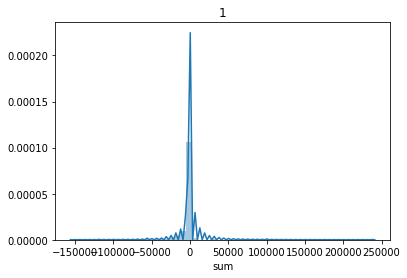

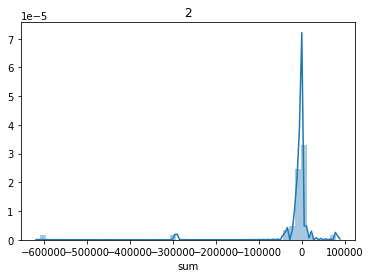

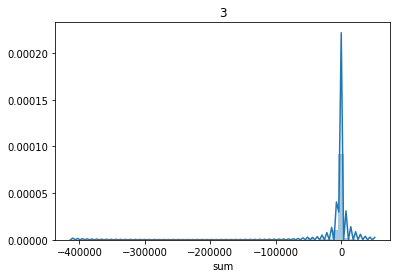

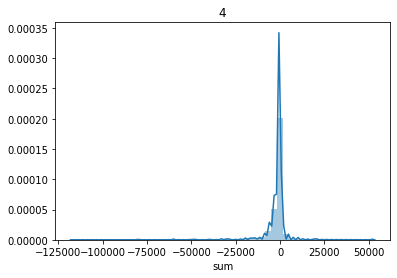

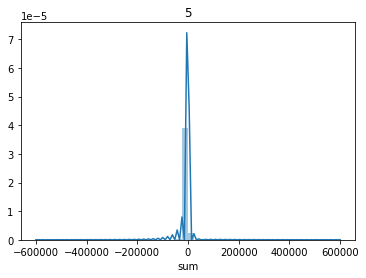

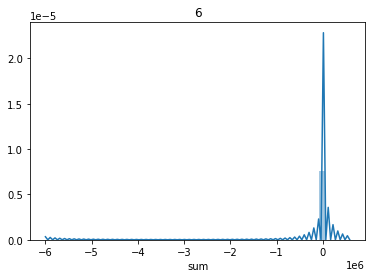

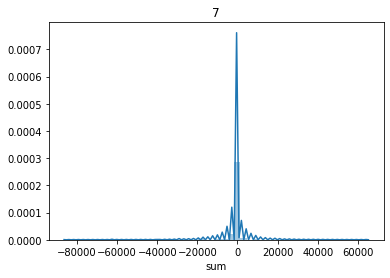

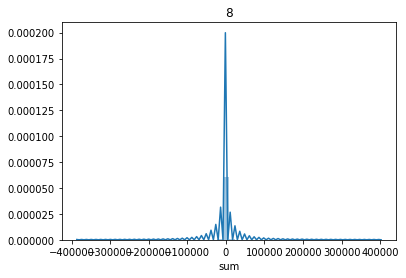

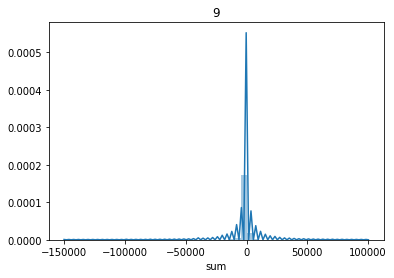

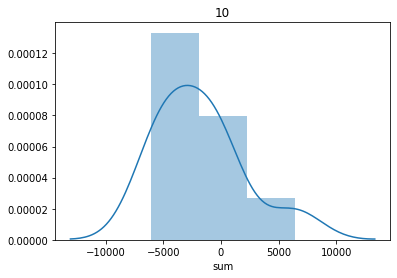

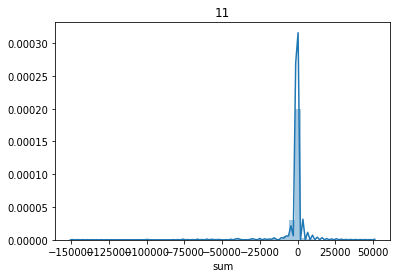

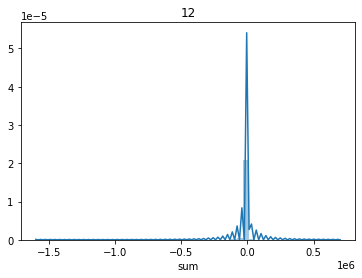

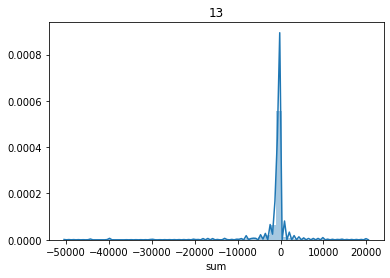

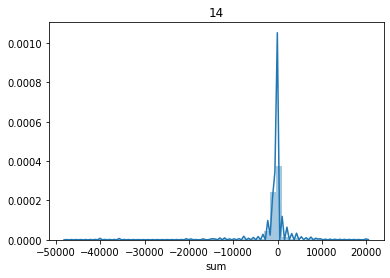

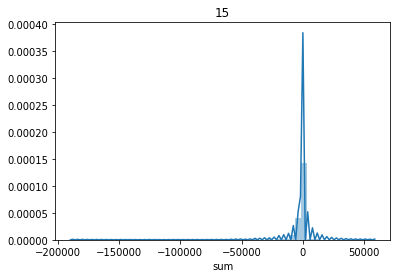

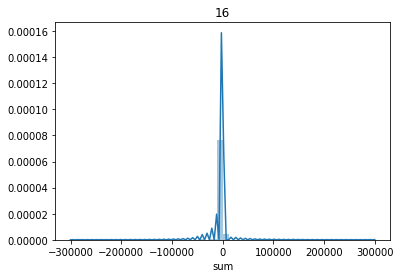

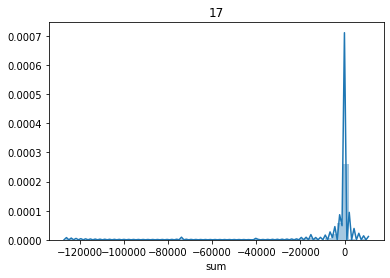

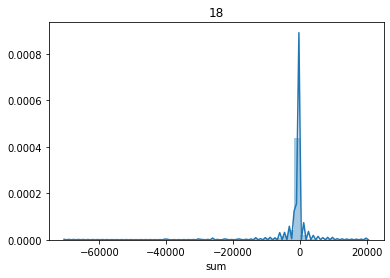

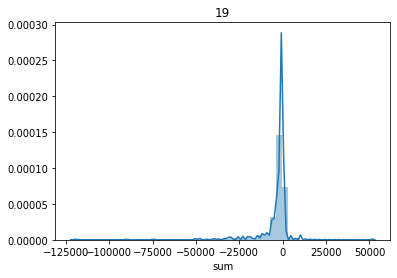

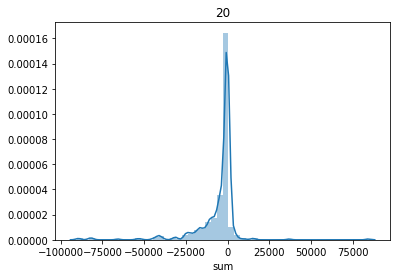

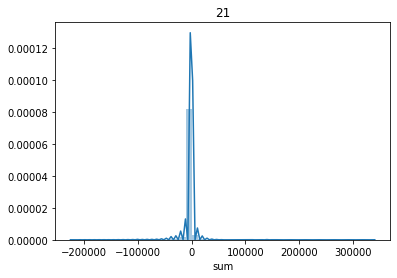

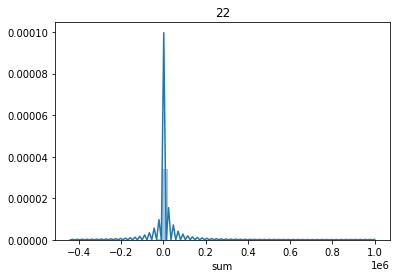

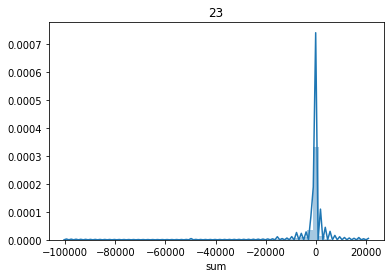

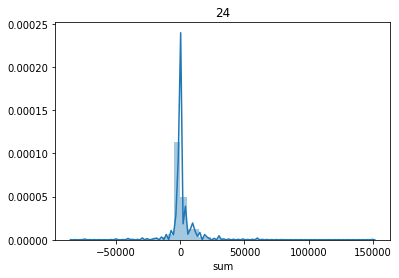

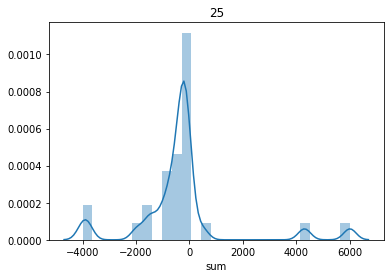

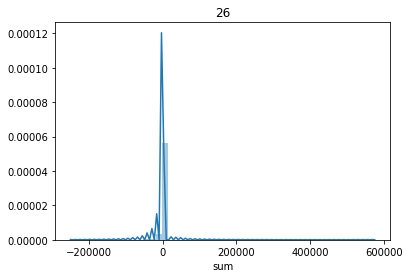

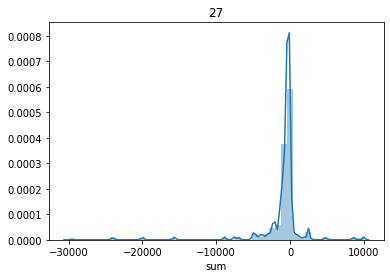

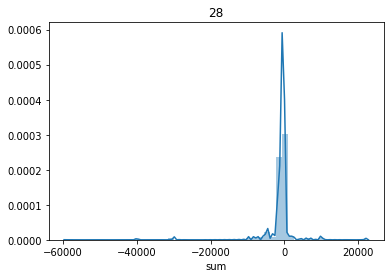

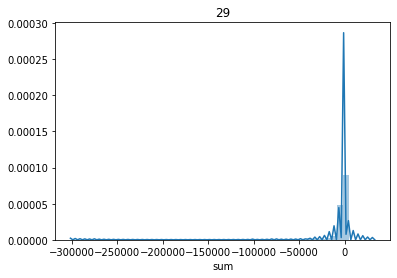

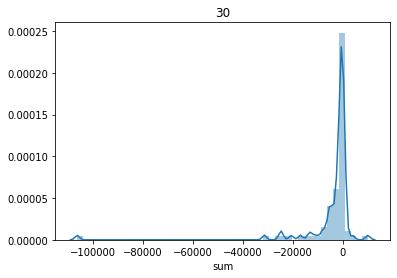

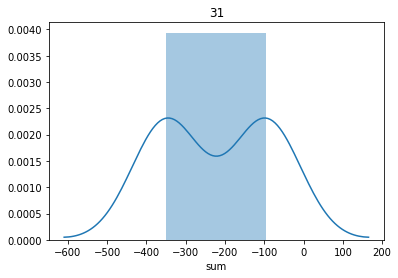

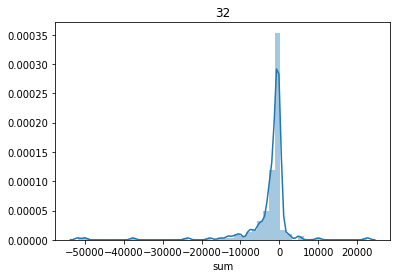

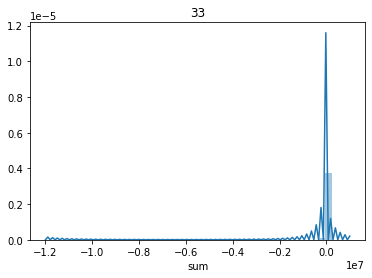

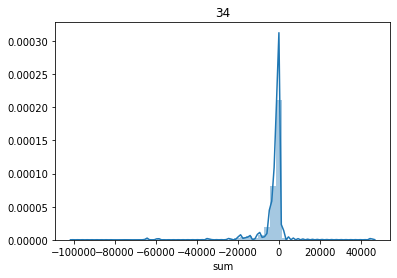

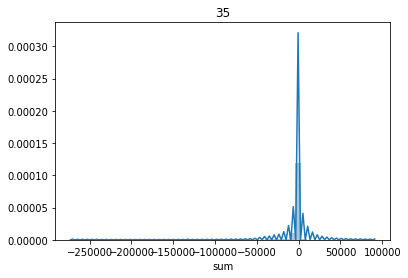

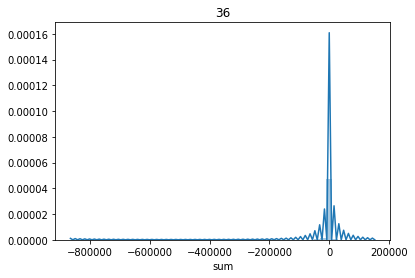

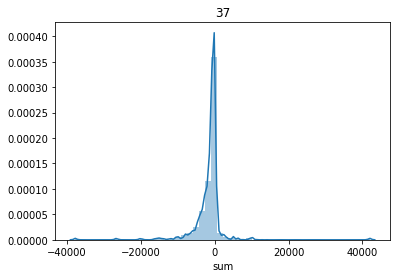

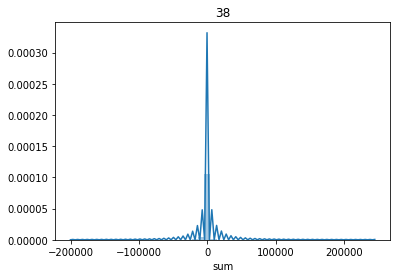

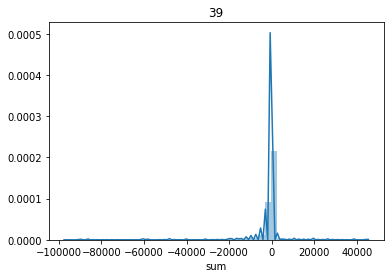

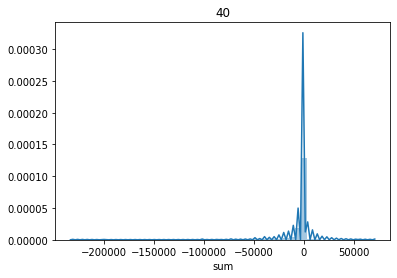

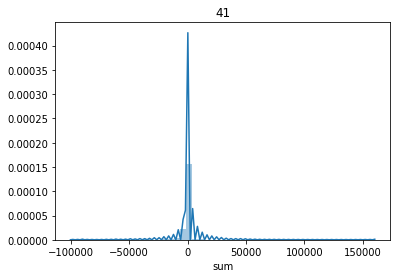

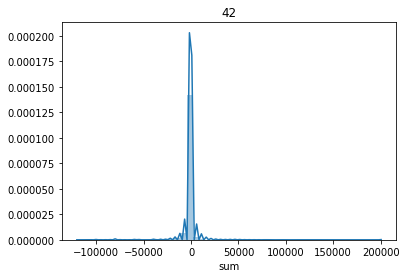

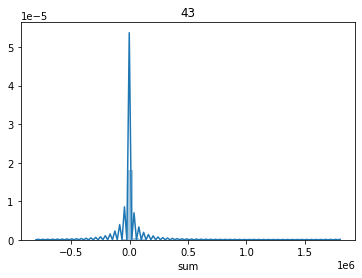

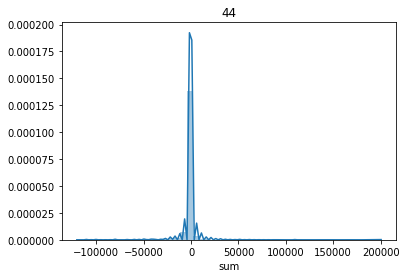

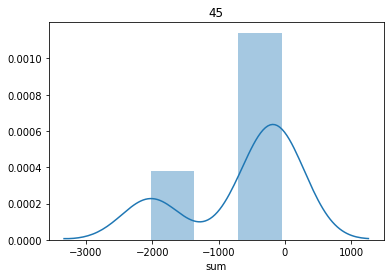

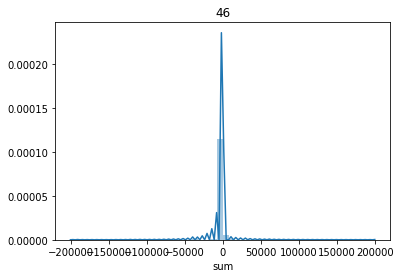

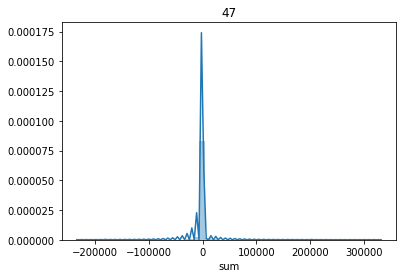

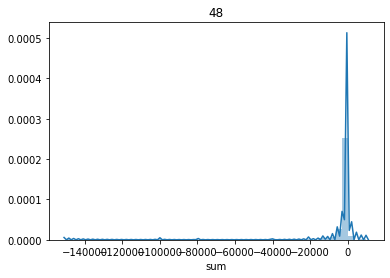

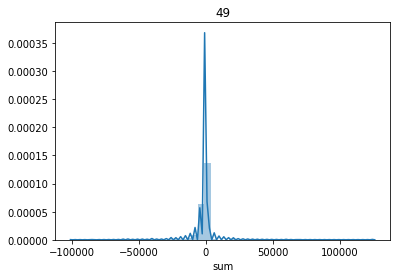

In [59]:
for i in [l for l in range(1,50)]:
    fig, ax = plt.subplots()
    sns.distplot(tr_df[tr_df['mcc_id']==i]['sum'],ax=ax)
    ax.set_title(i)

In [ ]:
trace1 = go.Bar(
    y=[tr_pivot[c].value_counts(normalize=True).iloc[0] for c in tr_pivot.iloc[:,1:-1].columns],
    x=tr_pivot.iloc[:,1:-1].columns,
    name='Unique',
    marker=dict(
        color='blue'
    )
)
fig = go.Figure(data=trace1)
py.iplot(fig, filename='barchart')

In [28]:
crm_data

clnt_id  clnt_gender  clnt_age  clnt_device  clnt_device_get  has_car  \
1538     2000          0.0  0.049505     0.508475         0.203390      0.0   
0        2001          1.0  0.128713     0.847458         0.881356      0.0   
722      2002          0.0  0.188119     0.084746         0.661017      0.0   
723      2003          0.0  0.049505     0.915254         0.288136      0.0   
1539     2004          0.0  0.049505     0.084746         0.762712      0.0   
...       ...          ...       ...          ...              ...      ...   
1536     4995          0.0  0.099010     0.508475         0.491525      0.0   
1537     4996          0.0  0.059406     0.423729         0.542373      0.0   
719      4997          1.0  0.059406     0.033898         0.711864      1.0   
720      4998          1.0  0.039604     0.322034         0.966102      1.0   
721      4999          0.0  0.029703     0.474576         0.779661      1.0   

      has_estate  clnt_children  clnt_income  clnt_pick  clnt_fortune  \
1538         0.0              0     0.005385          1      0.000000   
0            0.0              1     0.004615          2      0.034483   
722          0.0              0     0.001795          6      0.068966   
723          0.0              0     0.005128          8      0.103448   
1539         0.0              0     0.003846          9      0.137931   
...          ...            ...          ...        ...           ...   
1536         0.0              0     0.003846          2      0.862069   
1537         0.0              1     0.004872          2      0.896552   
719          0.0              1     0.003590          7      0.931034   
720          0.0              0     0.002308          1      0.965517   
721          0.0              0     0.008205          2      1.000000   

      clnt_status  clnt_system  spend_last  spend_level  spend_points  \
1538            0            1         1.0     0.002500      0.000000   
0               3            1         1.0     0.002667      0.127946   
722             0            2         1.0     0.014167      0.000000   
723             3            2         1.0     0.003333      0.000000   
1539            6            1         1.0     0.006667      0.000000   
...           ...          ...         ...          ...           ...   
1536           15            1         1.0     0.000767      0.000000   
1537            5            2         1.0     0.006167      0.000000   
719             5            2         1.0     0.008333      0.132997   
720            15            1         1.0     0.016667      0.008418   
721             1            3         1.0     0.051142      0.000000   

      grey_goose_F0  grey_goose_F1  grey_goose_F2  grey_goose_F3  \
1538              1              0              1              0   
0                 0              0              1              1   
722               0              1              1              0   
723               0              1              0              0   
1539              1              1              0              1   
...             ...            ...            ...            ...   
1536              1              0              0              1   
1537              0              1              1              1   
719               1              1              0              0   
720               0              0              1              1   
721               1              1              0              1   

      grey_goose_F4  goose_agg_0  goose_agg_1  goose_agg_2  goose_agg_3  \
1538              0     2.356572    -0.285110    -0.124781     2.367629   
0                 0    -0.636364     0.287028    -0.193809    -0.638753   
722               0    -0.024903    -0.087812     0.350461     0.069757   
723               1    -0.754365     0.019356    -0.046121    -0.753647   
1539              0    -0.571999     0.347722    -0.235527    -0.610030   
...             ...          ...    

In [34]:
stscaler = StandardScaler()
tr_mccid=tr_df.groupby(['clnt_id','mcc_id'])['sum'].agg([('negative' , lambda x : x[x < 0].sum()) , ('positive' , lambda x : x[x > 0].sum())]).reset_index()

In [104]:
tr_mccid

clnt_id  mcc_id  negative  positive
0         2000       5  -19669.0   10177.0
1         2000       6    -400.0       0.0
2         2000      12  -45376.0       0.0
3         2000      16    -569.0       0.0
4         2000      21    -200.0       0.0
...        ...     ...       ...       ...
30331     4999      44   -4056.0       0.0
30332     4999      46   -4945.0       0.0
30333     4999      47   -4263.0       0.0
30334     4999      49   -1628.0       0.0
30335     4999      50   -5790.0     365.0

[30336 rows x 4 columns]

In [103]:
tr_mccid1=tr_mccid.groupby(['clnt_id'])['negative','positive'].sum().reset_index()
print(tr_mccid1)

      clnt_id   negative   positive
0        2000  -138910.0    18668.0
1        2001  -175871.0   130887.0
2        2002  -466356.0   233525.0
3        2003  -334103.0     5748.0
4        2004   -36580.0    80000.0
...       ...        ...        ...
2894     4995   -30866.0    10000.0
2895     4996  -320669.0    78823.0
2896     4997  -639856.0   586158.0
2897     4998  -623855.0   300868.0
2898     4999 -1241829.0  1090716.0

[2899 rows x 3 columns]


In [296]:
tr_pivot=tr_mccid.pivot(index=tr_mccid.index, columns='mcc_id')[['negative','positive']].reset_index()
tr_pivot.columns = ['_'.join(str(s).strip() for s in col if s) for col in tr_pivot.columns]
tr_pivot.reset_index()
tr_pivot=tr_pivot.fillna(0)
tr_pivot=tr_pivot.rename(columns={"index": "clnt_id"})
tr_mccid1=tr_mccid.groupby(['clnt_id'])['negative','positive'].sum().reset_index()
tr_pivot=tr_pivot.merge(tr_mccid1, left_on='clnt_id', right_on='clnt_id')
tr_pivot=tr_pivot.merge(crm_data, left_on='clnt_id', right_on='clnt_id')
bad_columns=[]
neg_columns=[f'negative_{i}' for i in range(1,51)]
pos_columns=[f'positive_{i}' for i in range(1,51)]


from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer()
tr_pivot[neg_columns]=scaler.fit_transform(tr_pivot[neg_columns])
tr_pivot[pos_columns]=scaler.fit_transform(tr_pivot[pos_columns])
tr_pivot.drop(['negative_31','negative_45','positive_2','positive_7','positive_10','positive_15','positive_18','positive_19','positive_23','positive_25',\
               'positive_28','positive_30','positive_31','positive_32','positive_34','positive_39','positive_45','positive_48','spend_points'],axis=1,inplace=True)  
stscaler = StandardScaler()
tr_pivot[['clnt_age','clnt_device','clnt_device_get','clnt_fortune','clnt_status','spend_level']] \
= scaler.fit_transform(tr_pivot[['clnt_age','clnt_device','clnt_device_get','clnt_fortune','clnt_status','spend_level']])
tr_pivot[['negative','positive','goose_agg_0',
       'goose_agg_1', 'goose_agg_2', 'goose_agg_3', 'goose_agg_4',
       'goose_agg_5', 'goose_agg_6', 'goose_agg_7', 'goose_agg_8',
       'goose_agg_10', 'goose_agg_11', 'goose_agg_12', 'goose_agg_13',
       'goose_agg_14', 'goose_agg_15', 'goose_agg_16', 'goose_agg_17',
       'goose_agg_18', 'goose_agg_19', 'goose_agg_20', 'goose_agg_21',
       'goose_agg_22', 'goose_agg_23', 'goose_agg_24', 'goose_agg_25',
       'goose_agg_26', 'goose_agg_27', 'goose_agg_28', 'goose_agg_29',
       'wild_goose_A_1', 'wild_goose_A_2', 'wild_goose_A_9','spend_last','clnt_income']]=scaler.fit_transform(tr_pivot[['negative','positive','goose_agg_0',
       'goose_agg_1', 'goose_agg_2', 'goose_agg_3', 'goose_agg_4',
       'goose_agg_5', 'goose_agg_6', 'goose_agg_7', 'goose_agg_8',
       'goose_agg_10', 'goose_agg_11', 'goose_agg_12', 'goose_agg_13',
       'goose_agg_14', 'goose_agg_15', 'goose_agg_16', 'goose_agg_17',
       'goose_agg_18', 'goose_agg_19', 'goose_agg_20', 'goose_agg_21',
       'goose_agg_22', 'goose_agg_23', 'goose_agg_24', 'goose_agg_25',
       'goose_agg_26', 'goose_agg_27', 'goose_agg_28', 'goose_agg_29',
       'wild_goose_A_1', 'wild_goose_A_2', 'wild_goose_A_9','spend_last','clnt_income']])

corr_matrix = tr_pivot.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]
tr_pivot.drop(to_drop,axis=1,inplace=True)


for col in tr_pivot.iloc[:,1:-1].columns:
    if tr_pivot[col].value_counts(normalize=True).iloc[0]>0.95:
        bad_columns.append(col)
        
tr_pivot.drop(bad_columns,axis=1,inplace=True)  



In [297]:
train_df =tr_pivot[tr_pivot['is_premium'].notna()]
test_df = tr_pivot[tr_pivot['is_premium'].isna()]

In [298]:
train_df

clnt_id  negative_1  negative_2  negative_3  negative_4  negative_5  \
1        2001         1.0         1.0         1.0         1.0    0.048215   
2        2002         1.0         1.0         1.0         1.0    1.000000   
3        2003         1.0         1.0         1.0         1.0    1.000000   
5        2005         1.0         1.0         1.0         1.0    1.000000   
6        2006         1.0         1.0         1.0         1.0    1.000000   
...       ...         ...         ...         ...         ...         ...   
2894     4995         1.0         1.0         1.0         1.0    1.000000   
2895     4996         1.0         1.0         1.0         1.0    1.000000   
2896     4997         1.0         1.0         1.0         1.0    1.000000   
2897     4998         1.0         1.0         1.0         1.0    1.000000   
2898     4999         1.0         1.0         1.0         1.0    1.000000   

      negative_6  negative_7  negative_8  negative_9  negative_10  \
1       1.000000         1.0    1.000000         1.0          1.0   
2       0.010295         1.0    1.000000         1.0          1.0   
3       1.000000         1.0    0.012012         1.0          1.0   
5       1.000000         1.0    1.000000         1.0          1.0   
6       1.000000         1.0    1.000000         1.0          1.0   
...          ...         ...         ...         ...          ...   
2894    1.000000         1.0    1.000000         1.0          1.0   
2895    1.000000         1.0    1.000000         1.0          1.0   
2896    1.000000         1.0    1.000000         1.0          1.0   
2897    1.000000         1.0    1.000000         1.0          1.0   
2898    1.000000         1.0    1.000000         1.0          1.0   

      negative_11  negative_12  negative_13  negative_14  negative_15  \
1             1.0     1.000000          1.0          1.0          1.0   
2             1.0     1.000000          1.0          1.0          1.0   
3             1.0     1.000000          1.0          1.0          1.0   
5             1.0     0.030051          1.0          1.0          1.0   
6             1.0     1.000000          1.0          1.0          1.0   
...           ...          ...          ...          ...          ...   
2894          1.0     1.000000          1.0          1.0          1.0   
2895          1.0     1.000000          1.0          1.0          1.0   
2896          1.0     1.000000          1.0          1.0          1.0   
2897          1.0     1.000000          1.0          1.0          1.0   
2898          1.0     1.000000          1.0          1.0          1.0   

      negative_16  negative_17  negative_18  negative_19  negative_20  \
1        1.000000          1.0          1.0          1.0          1.0   
2        1.000000          1.0          1.0          1.0          1.0   
3        1.000000          1.0          1.0          1.0          1.0   
5        1.000000          1.0          1.0          1.0          1.0   
6        0.041067          1.0          1.0          1.0          1.0   
...           ...          ...          ...          ...          ...   
2894     1.000000          1.0          1.0          1.0          1.0   
2895     1.000000          1.0          1.0          1.0          1.0   
2896     1.000000          1.0          1.0          1.0          1.0   
2897     1.000000          1.0          1.0          1.0          1.0   
2898     1.000000          1.0          1.0          1.0          1.0   

      negative_21  negative_22  negative_23  negative_24  negative_25  \
1             1.0          1.0          1.0          1.0          1.0   
2             1.0          1.0          1.0          1.0          1.0   
3             1.0          1.0          1.0          1.0          1.0   
5             1.0          1.0          1.0          1.0          1.0   
6             1.0          1.0          1.0          1.0          1.0   
...           ...          ...          ...          ...    

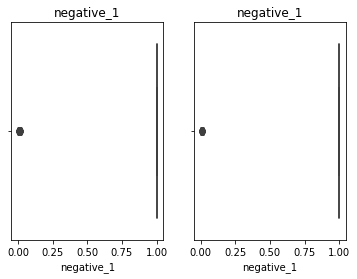

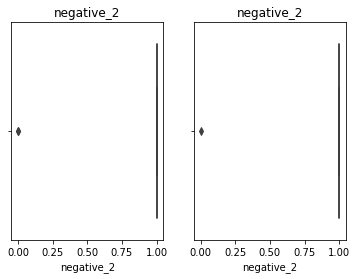

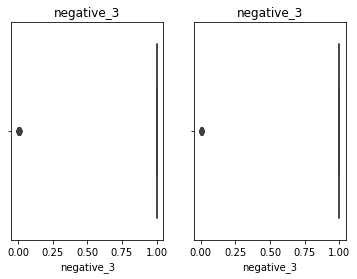

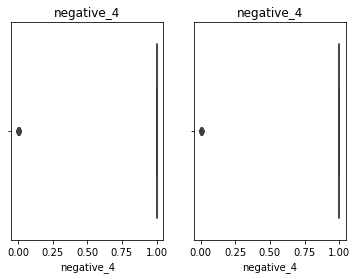

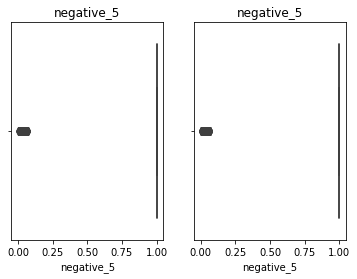

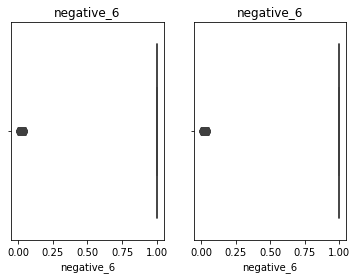

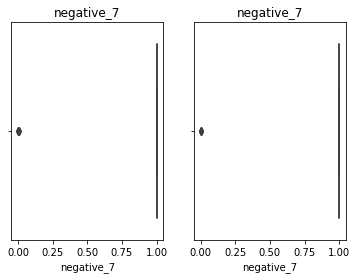

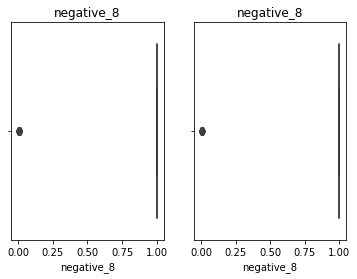

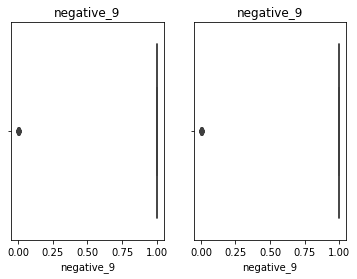

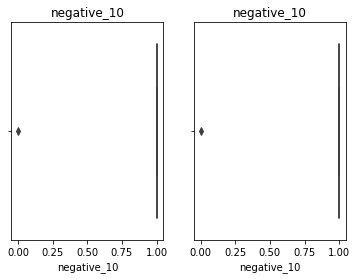

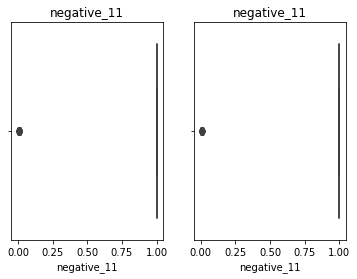

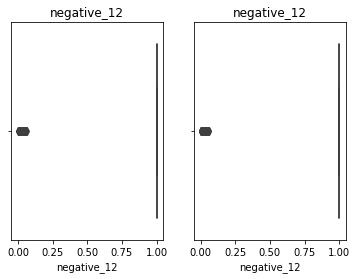

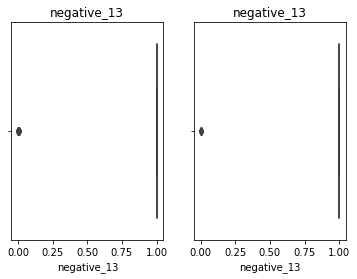

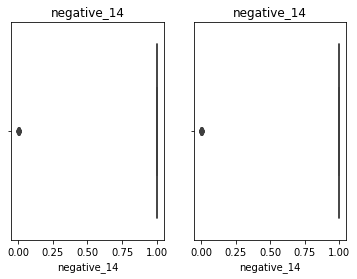

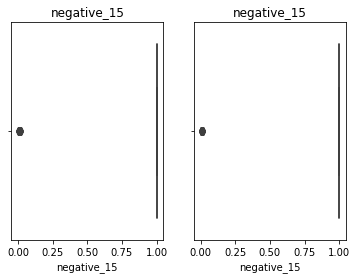

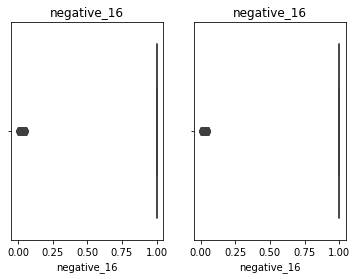

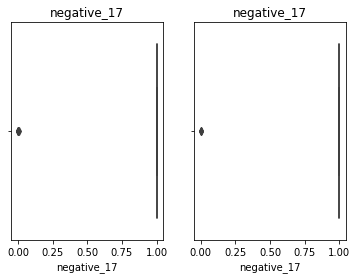

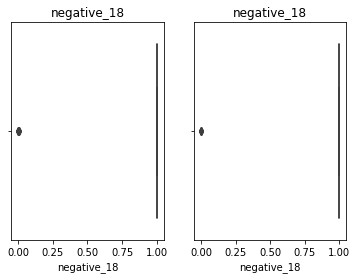

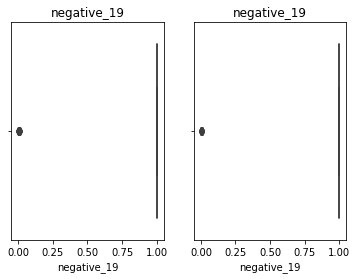

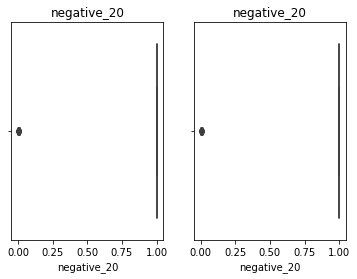

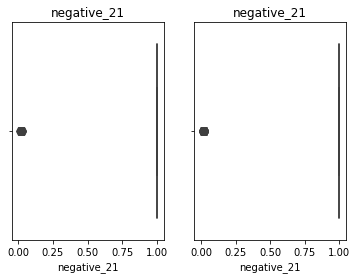

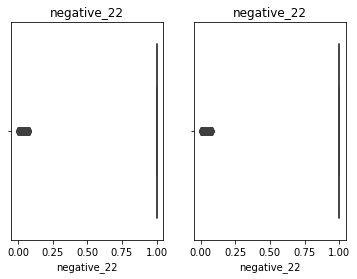

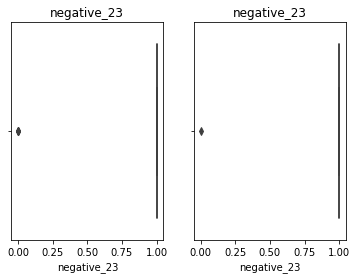

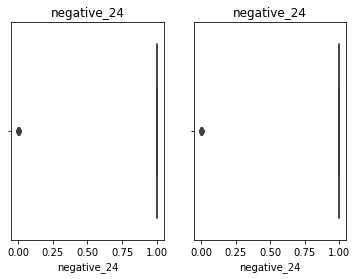

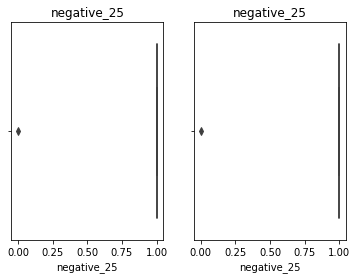

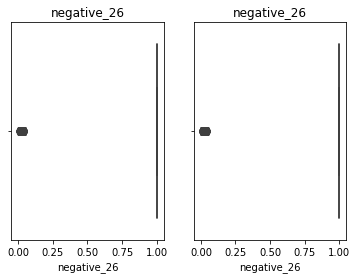

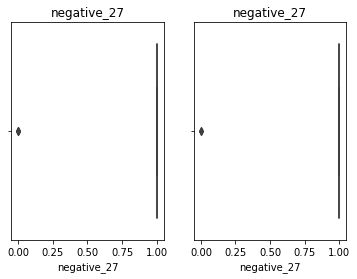

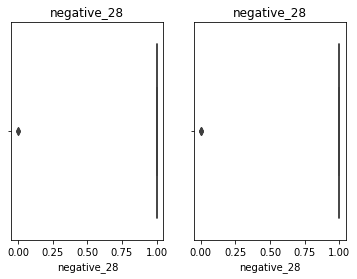

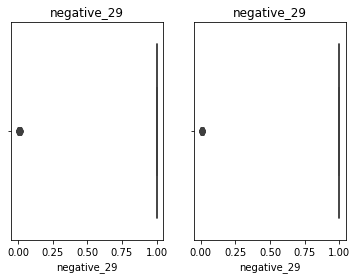

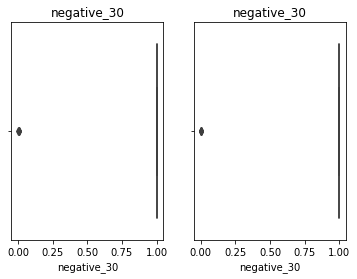

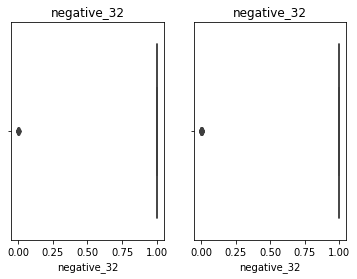

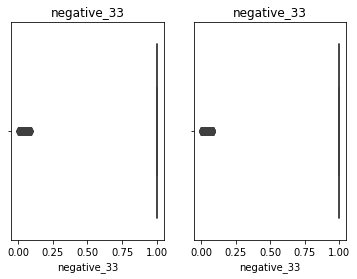

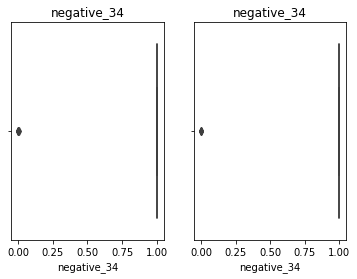

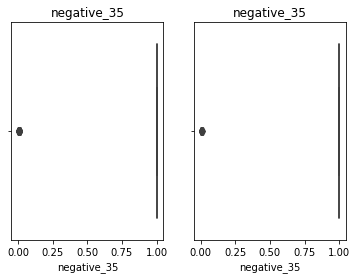

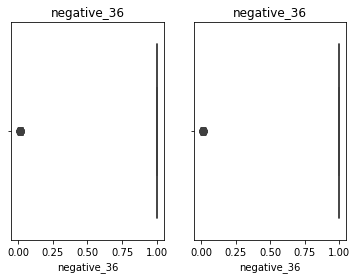

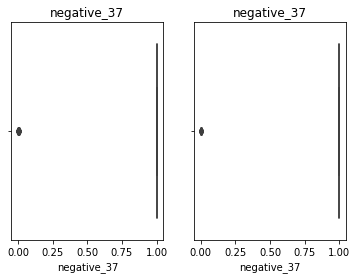

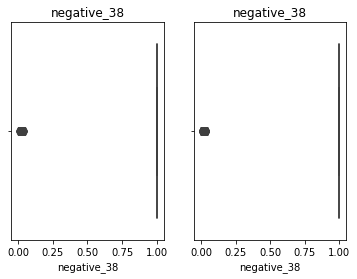

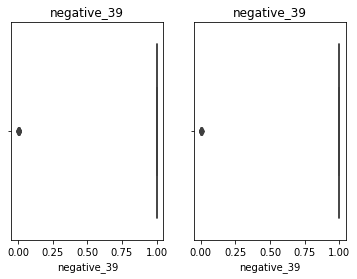

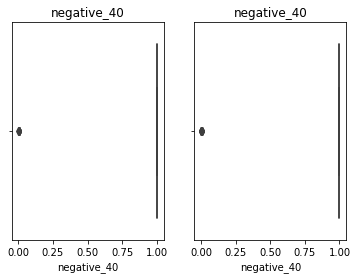

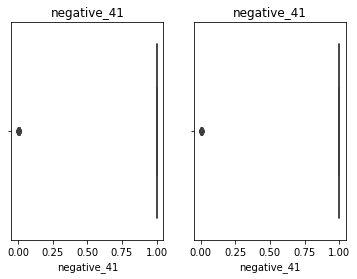

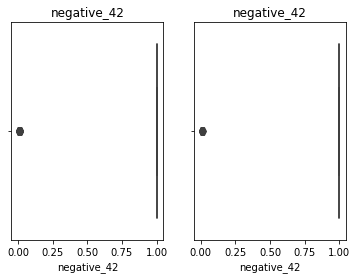

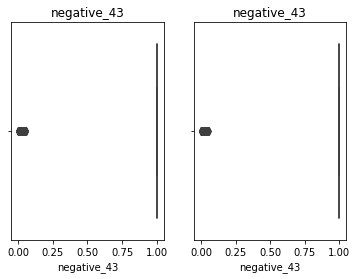

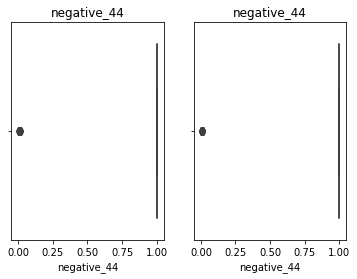

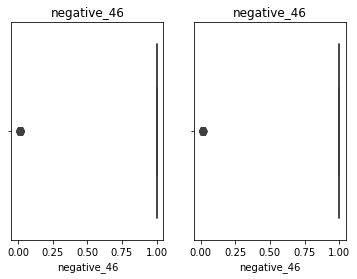

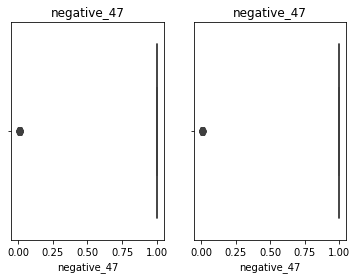

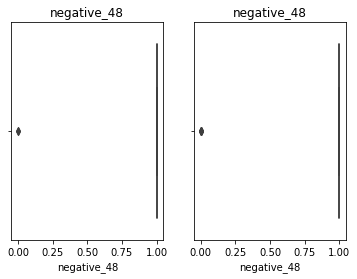

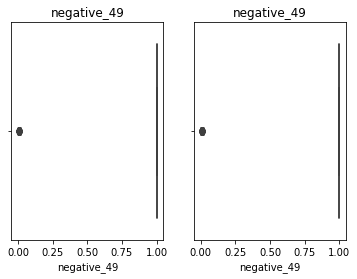

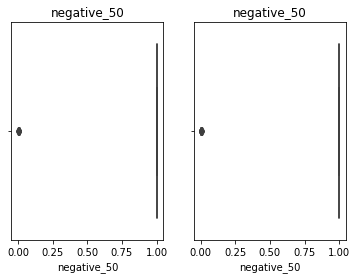

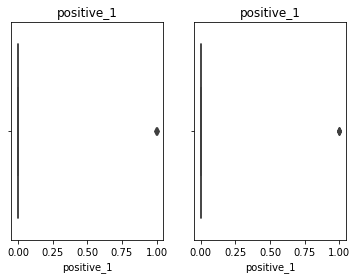

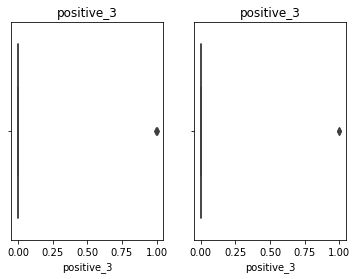

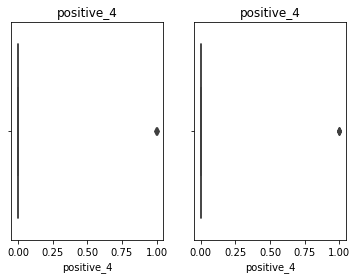

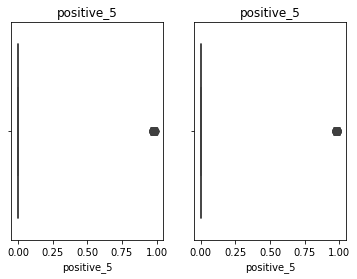

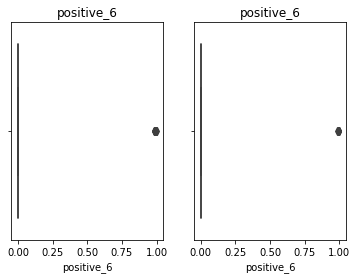

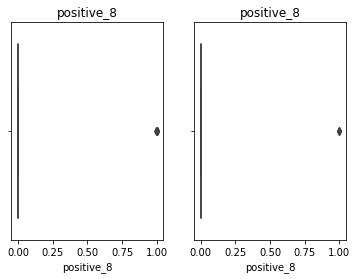

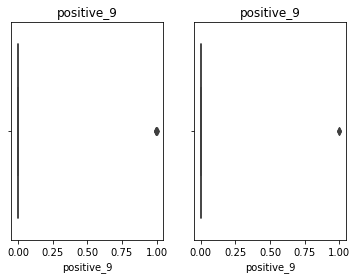

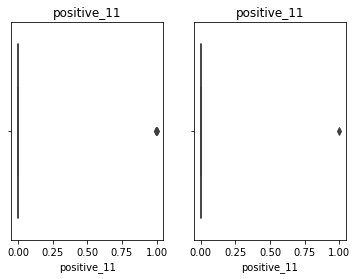

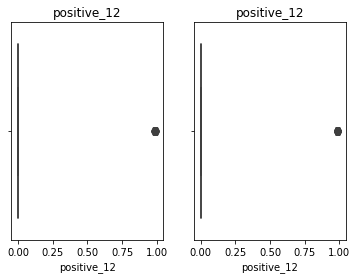

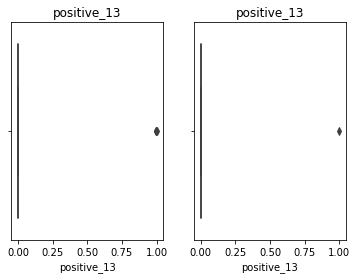

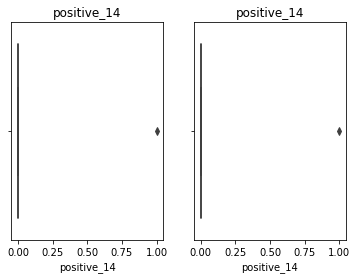

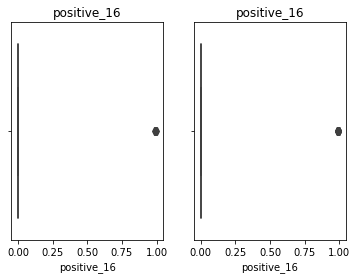

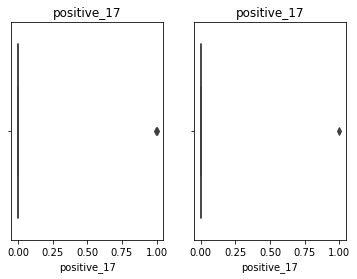

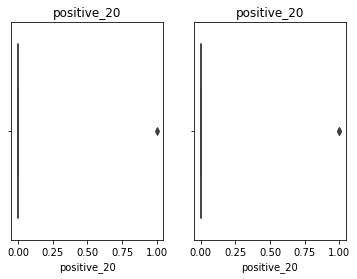

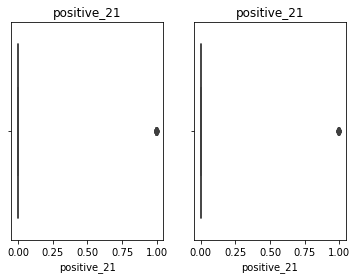

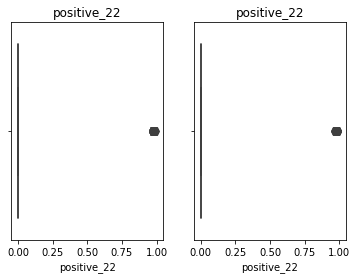

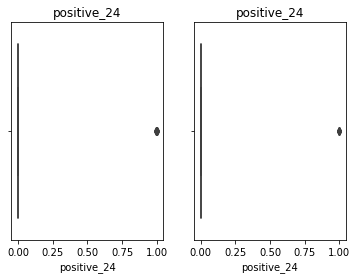

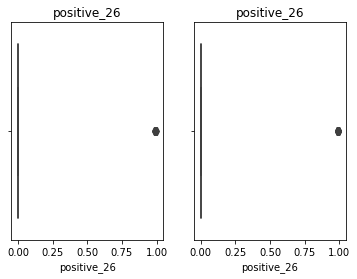

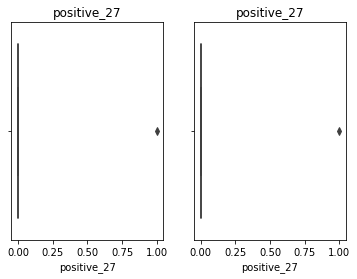

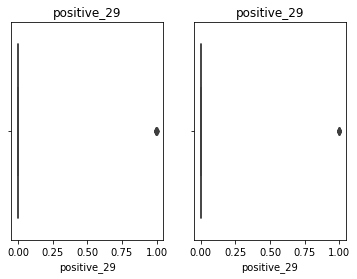

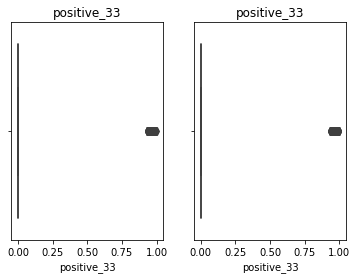

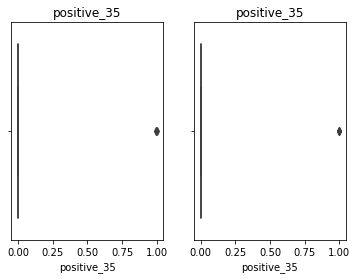

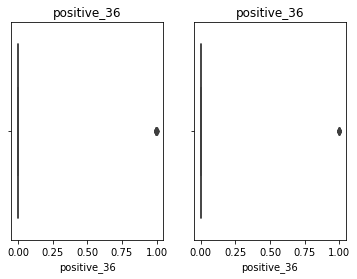

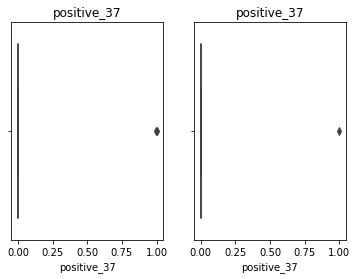

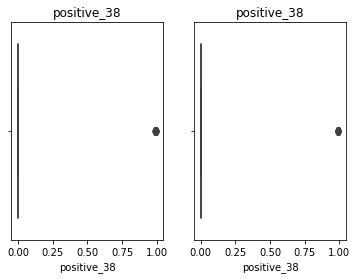

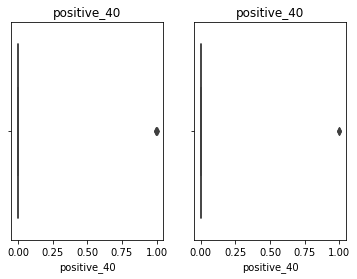

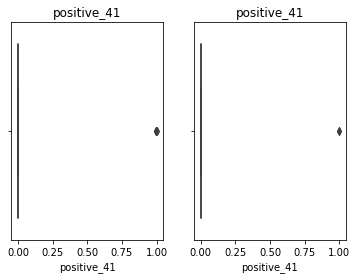

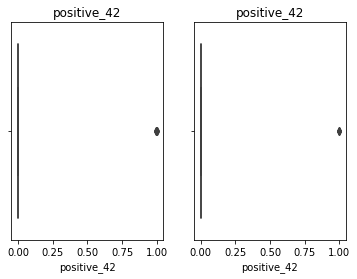

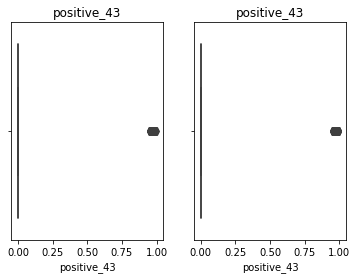

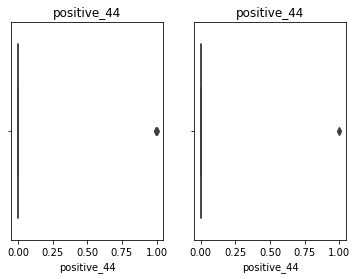

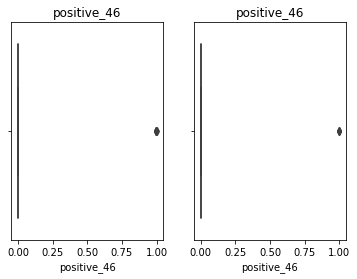

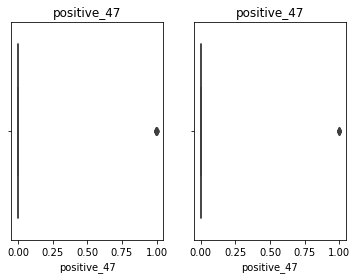

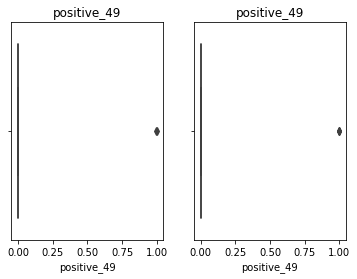

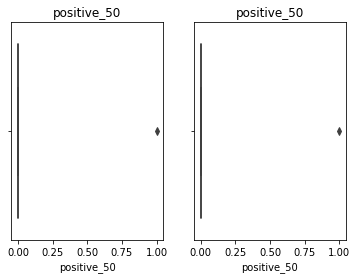

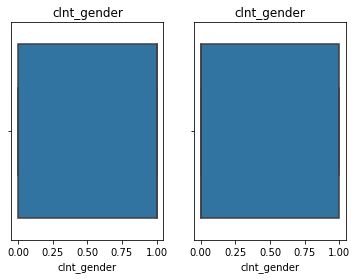

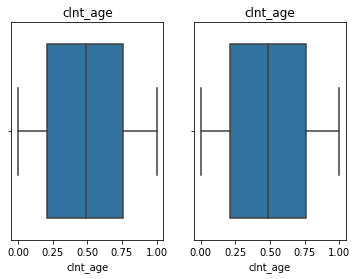

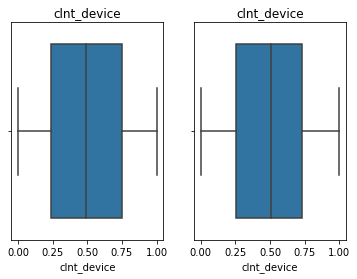

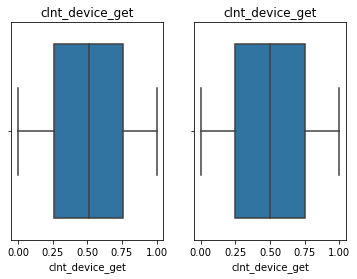

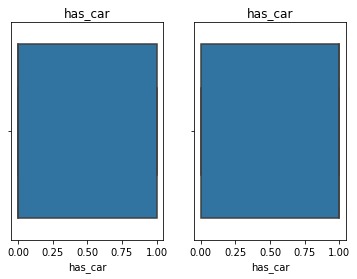

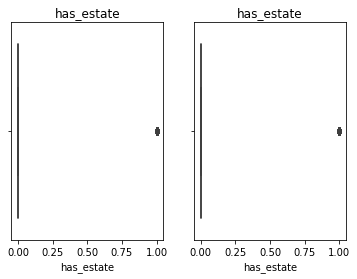

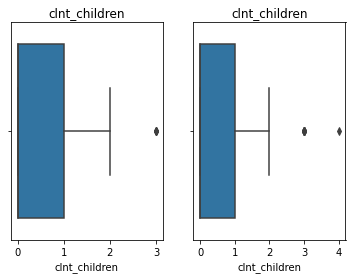

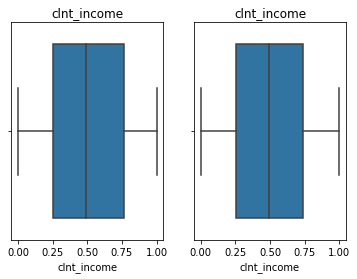

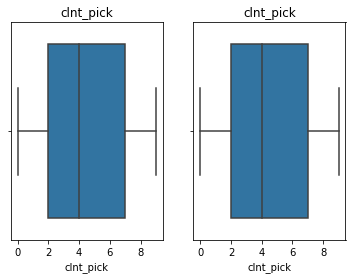

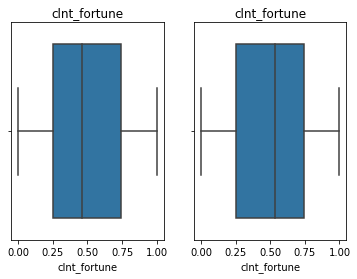

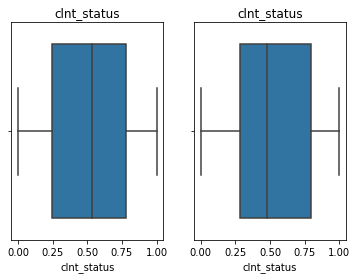

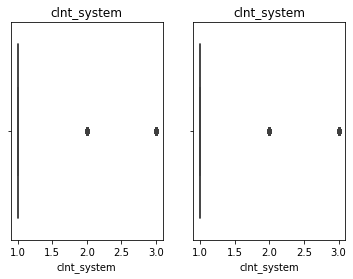

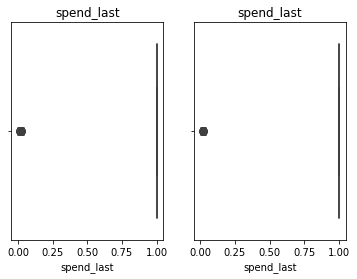

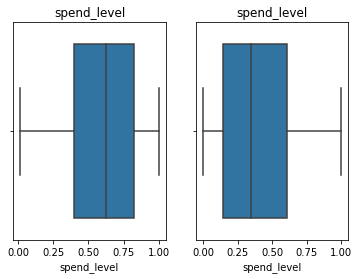

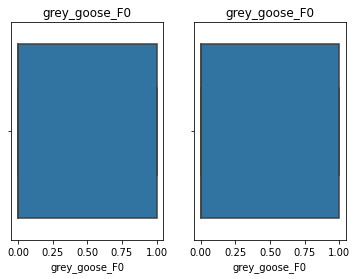

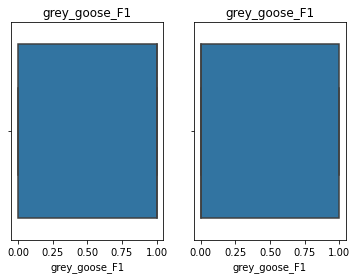

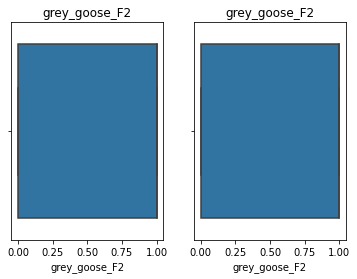

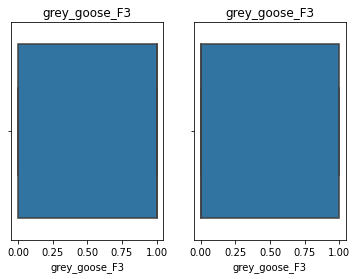

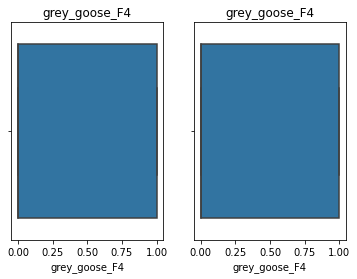

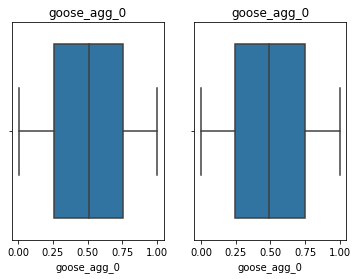

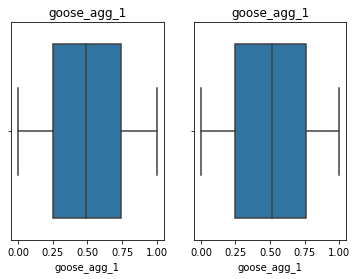

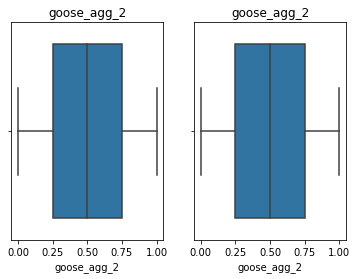

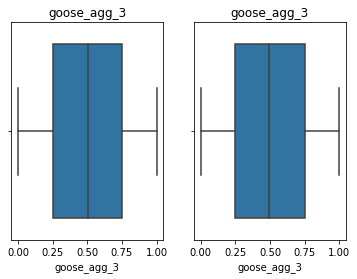

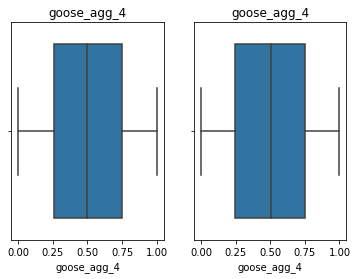

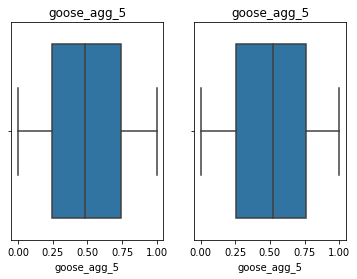

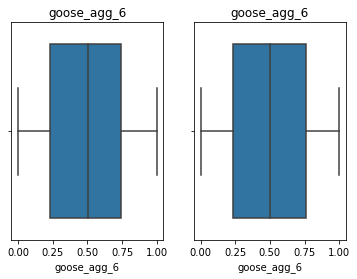

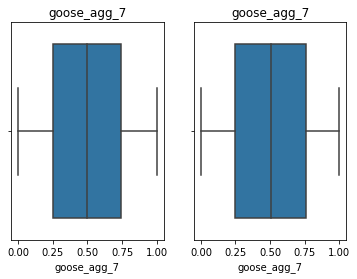

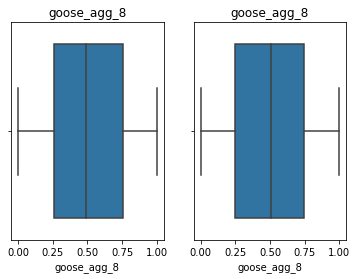

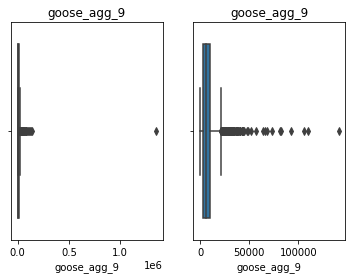

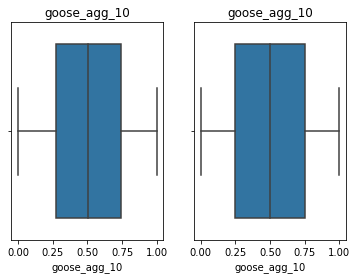

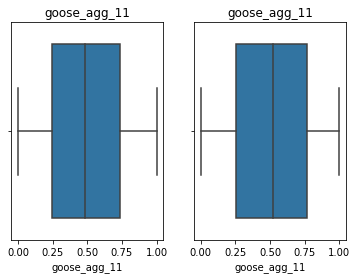

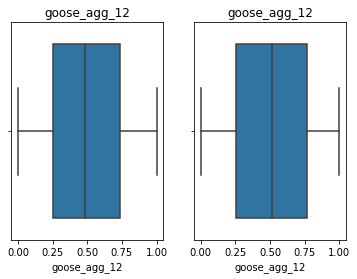

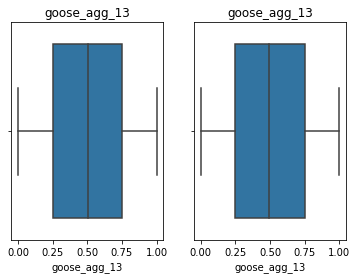

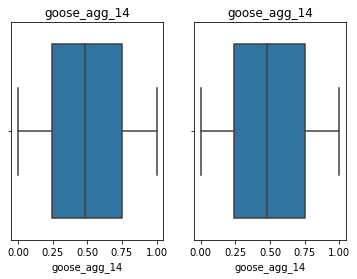

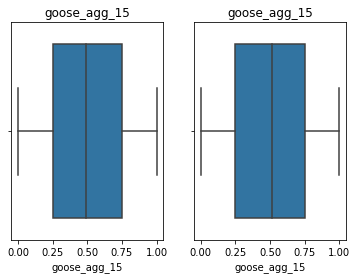

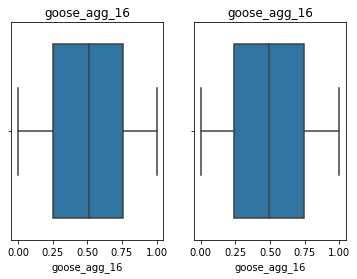

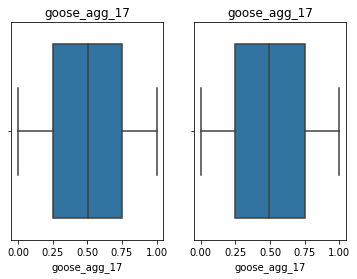

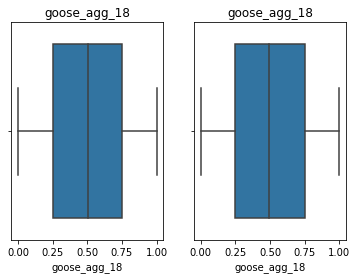

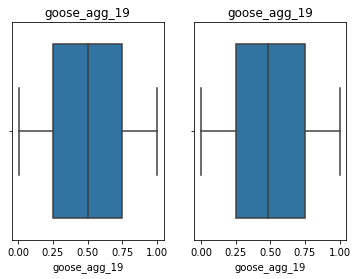

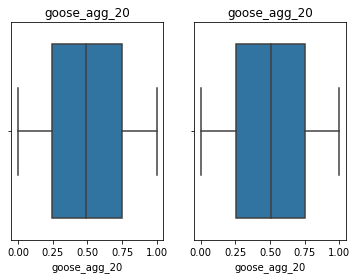

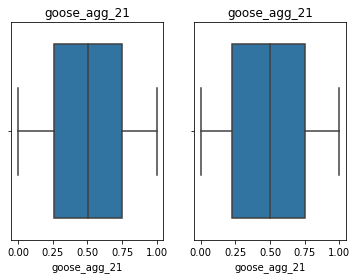

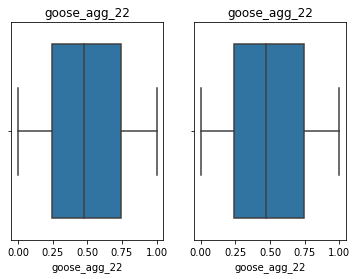

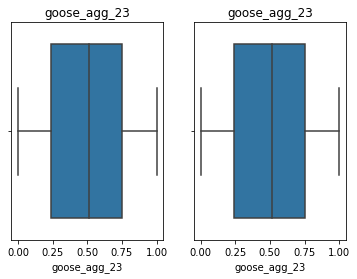

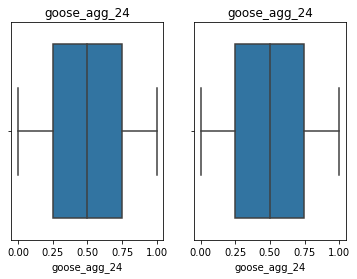

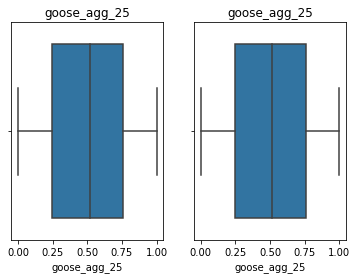

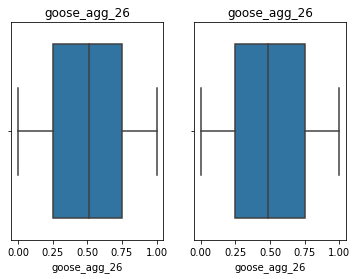

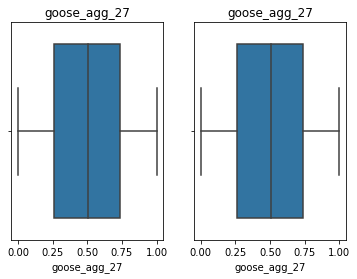

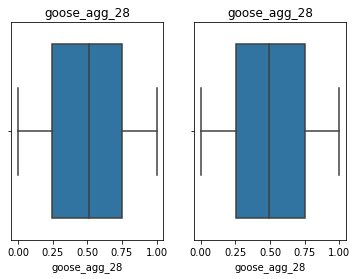

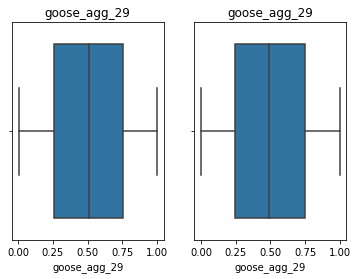

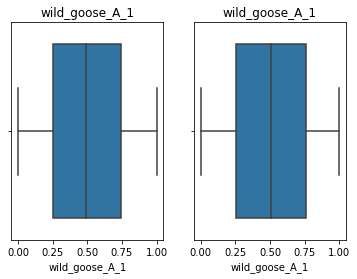

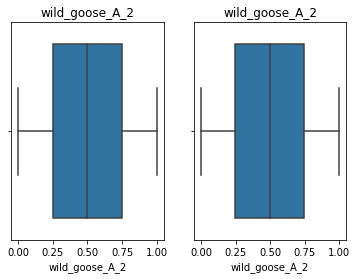

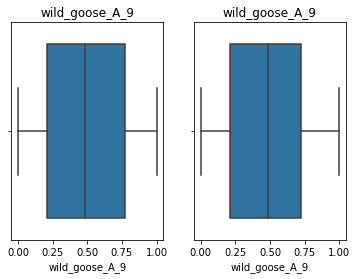

In [97]:
for col in train_df.columns[1:-1]:
    fig, axs = plt.subplots(ncols=2)
    sns.boxplot(x=train_df[col],ax=axs[0])
    sns.boxplot(x=test_df[col],ax=axs[1])
    axs[0].set_title(col)
    axs[1].set_title(col)

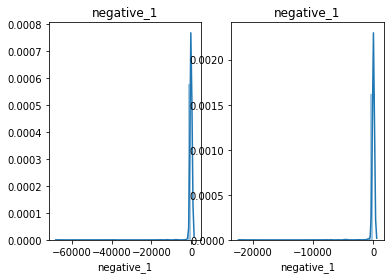

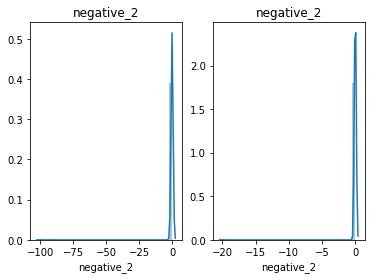

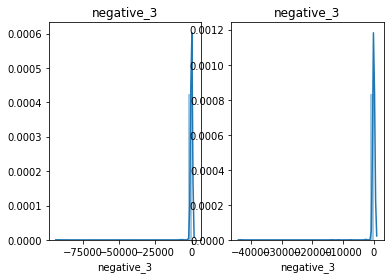

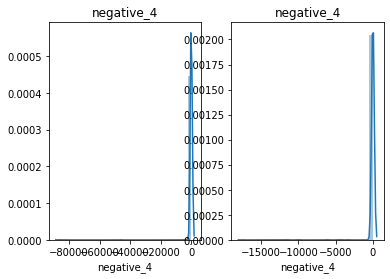

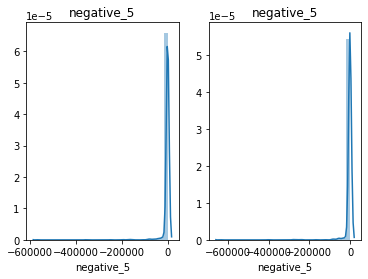

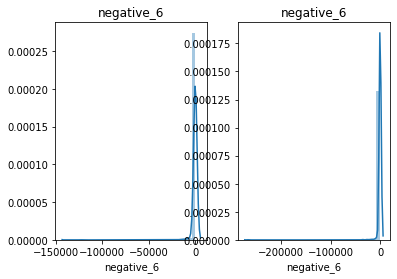

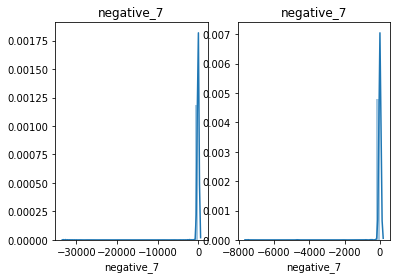

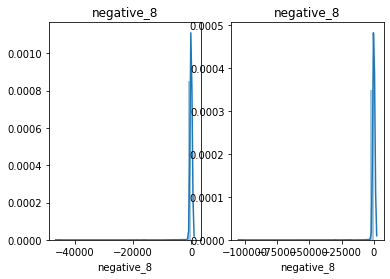

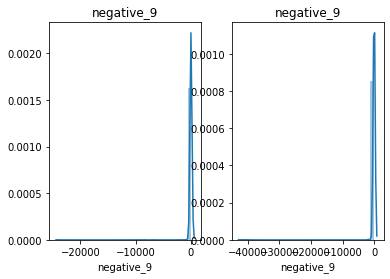

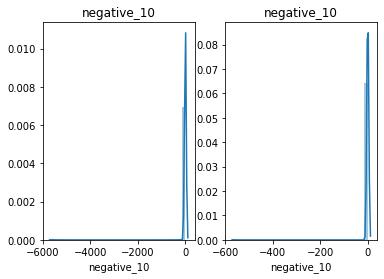

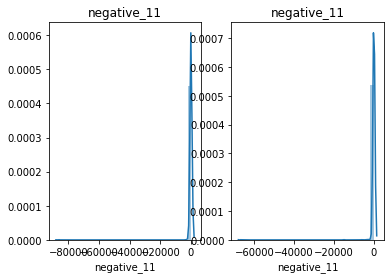

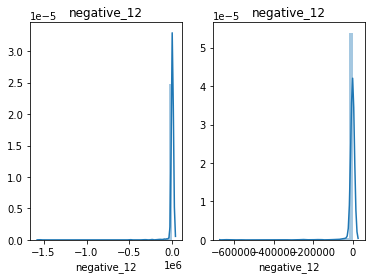

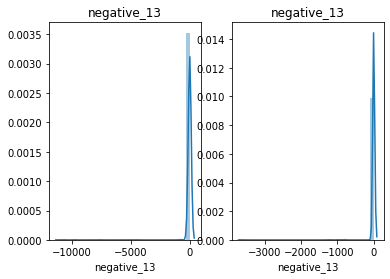

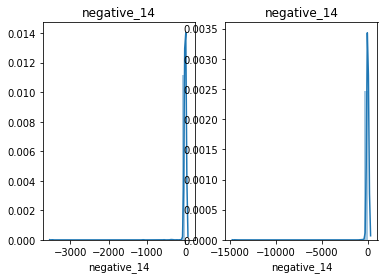

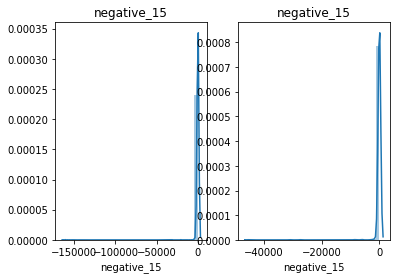

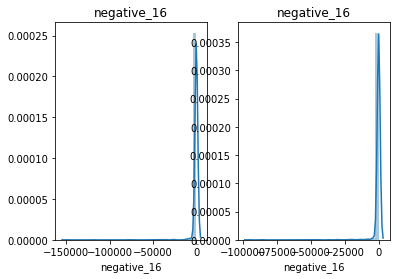

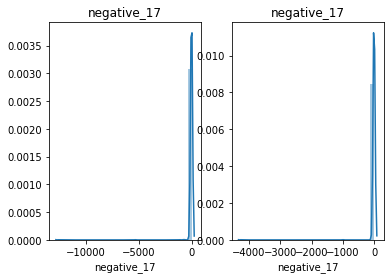

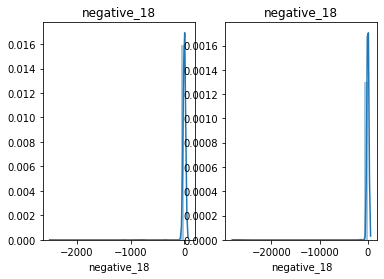

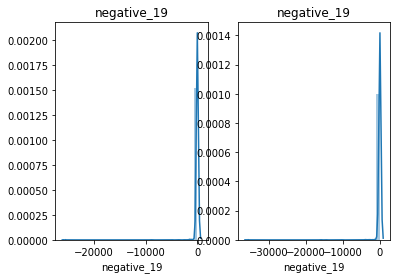

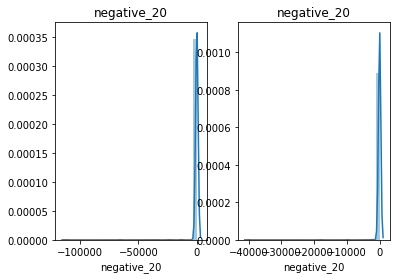

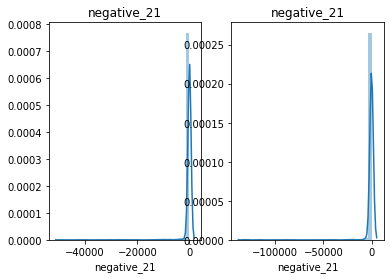

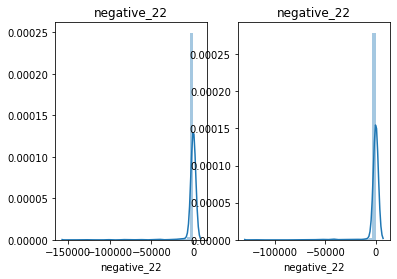

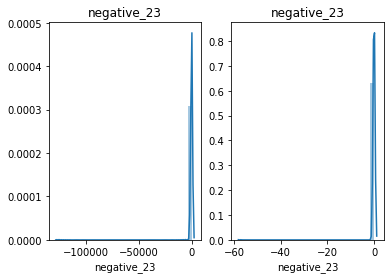

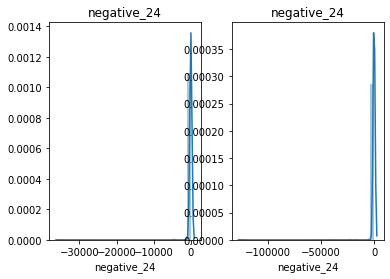

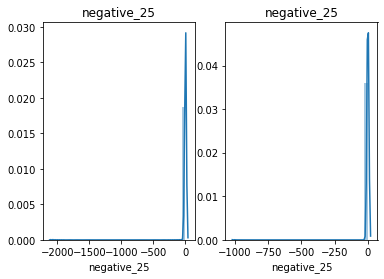

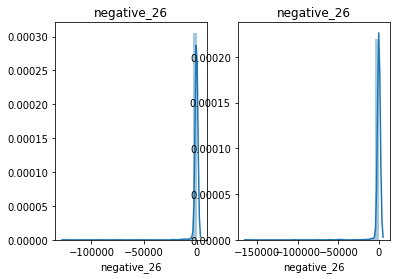

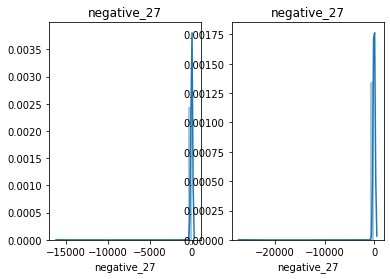

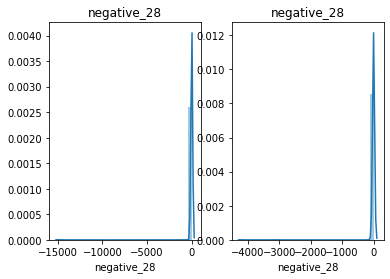

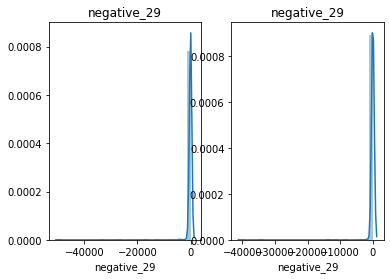

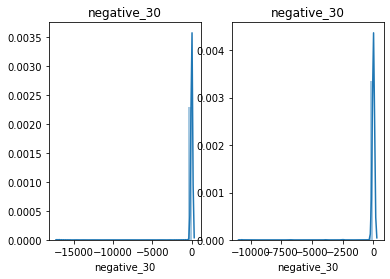

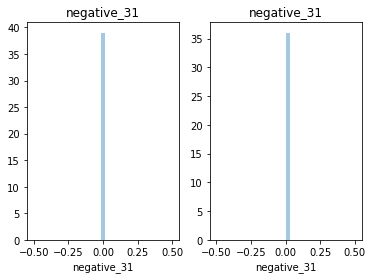

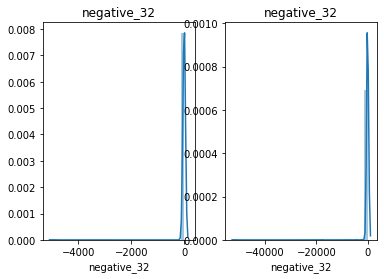

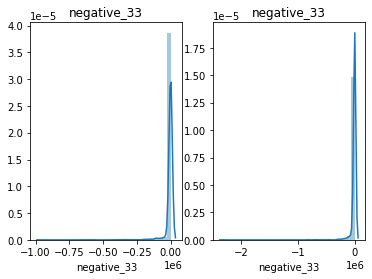

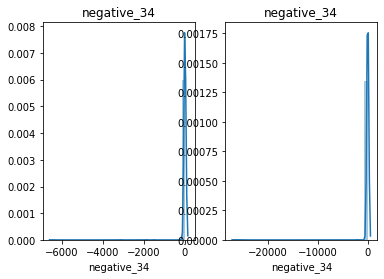

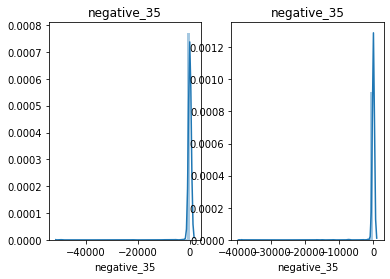

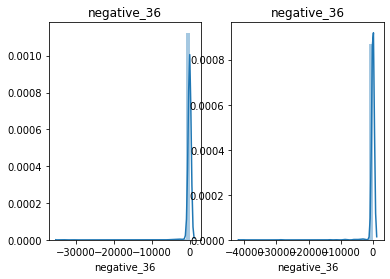

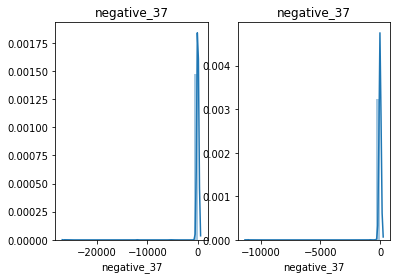

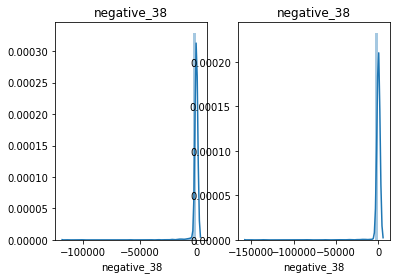

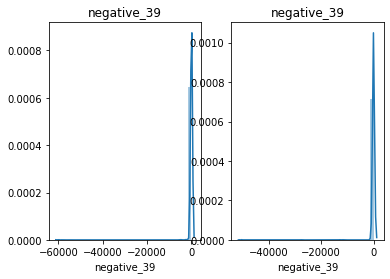

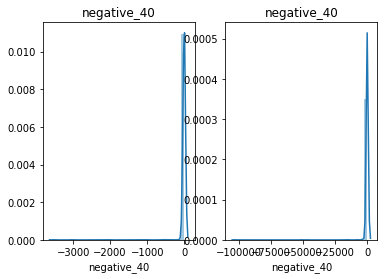

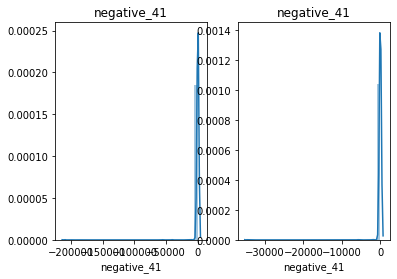

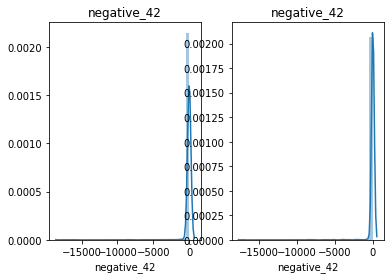

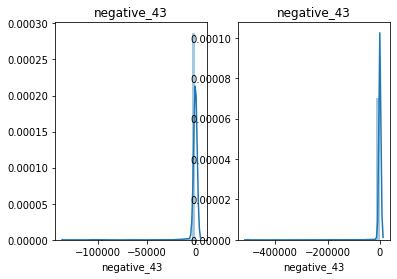

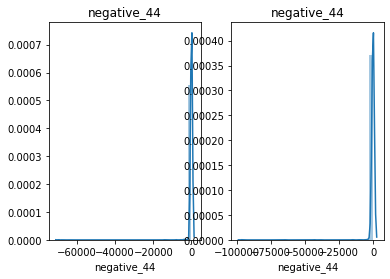

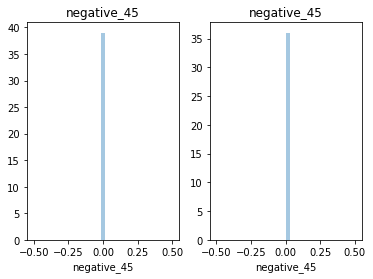

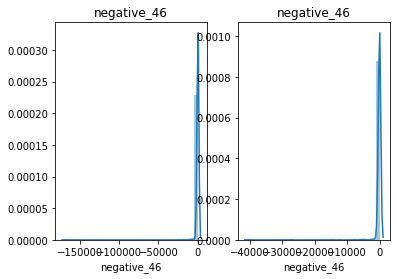

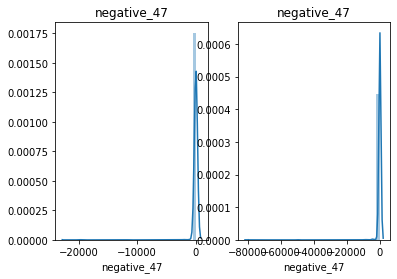

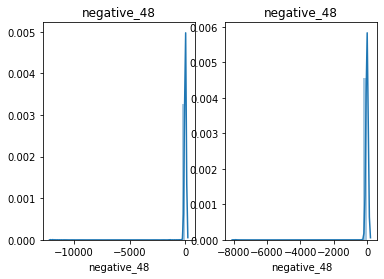

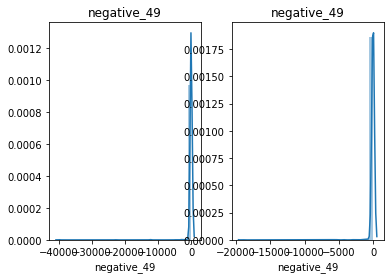

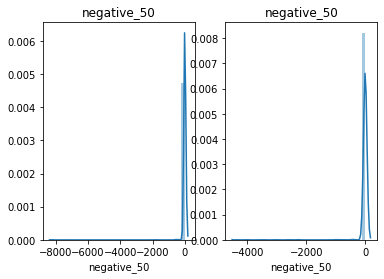

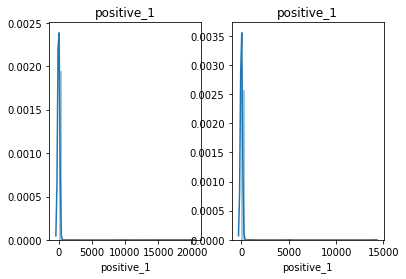

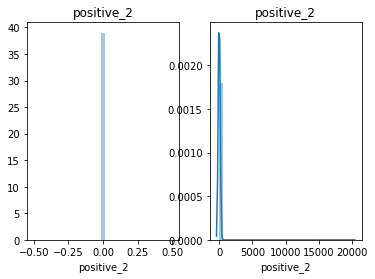

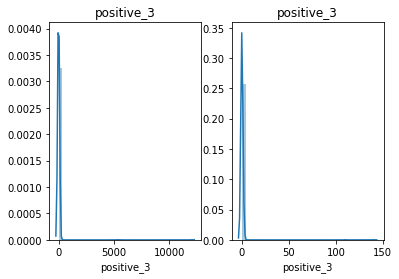

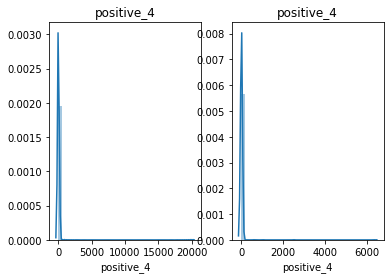

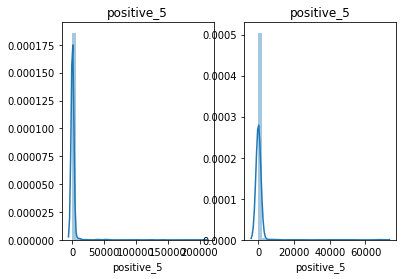

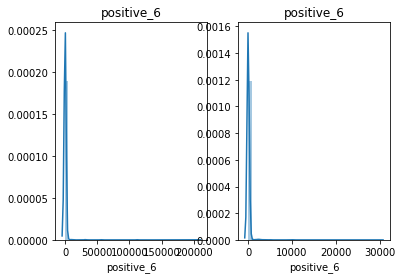

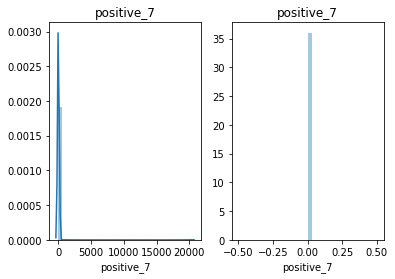

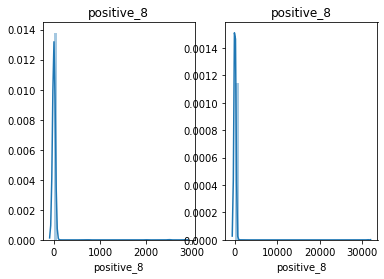

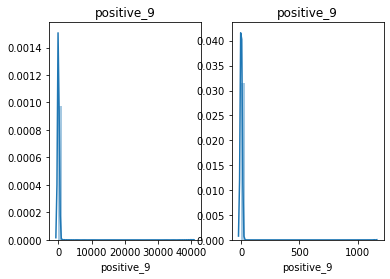

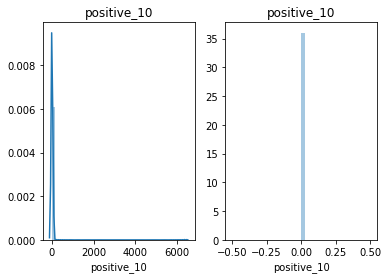

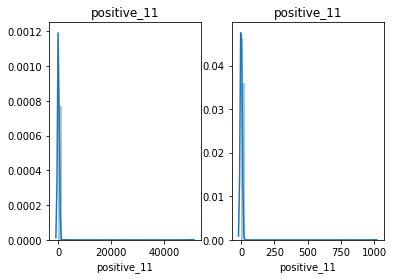

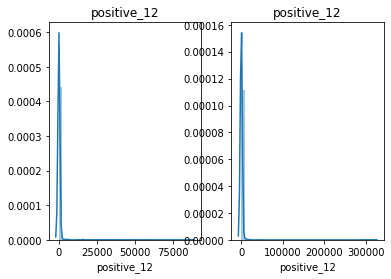

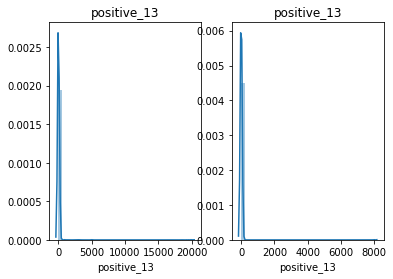

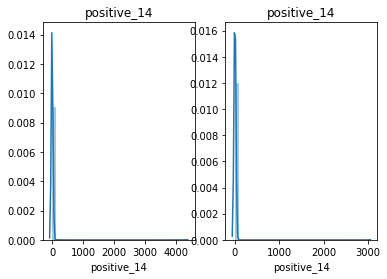

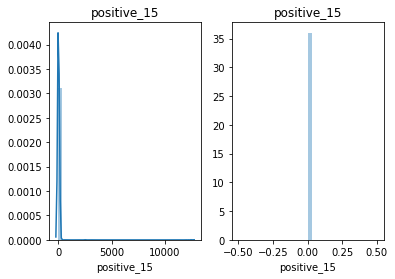

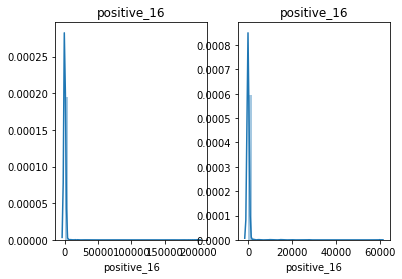

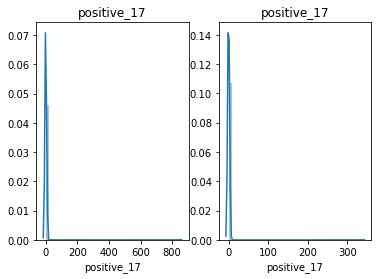

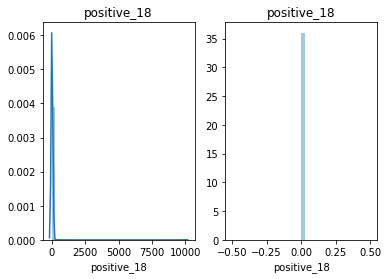

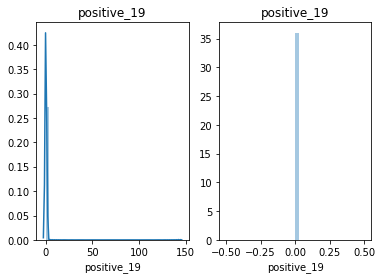

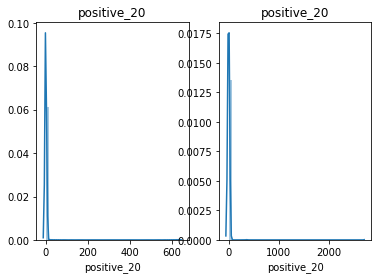

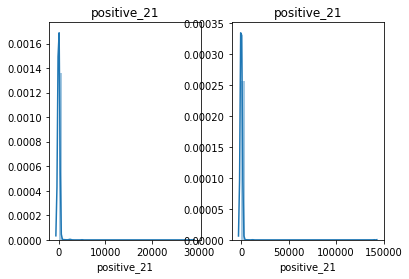

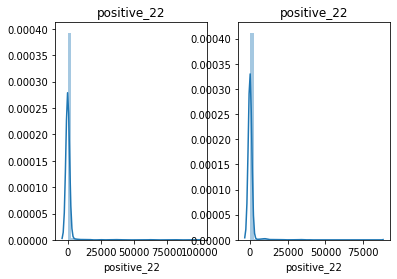

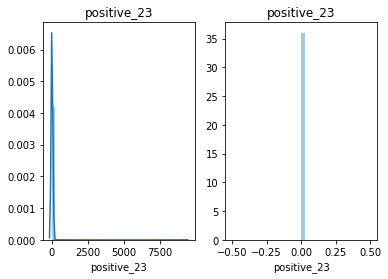

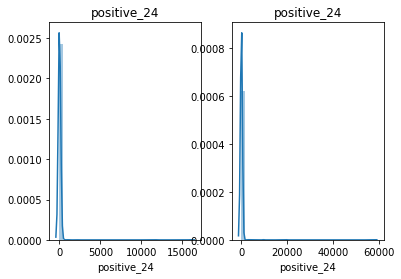

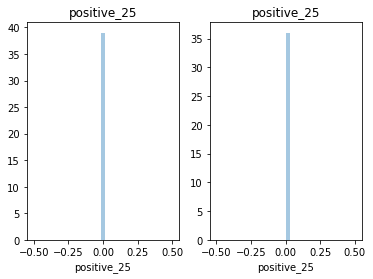

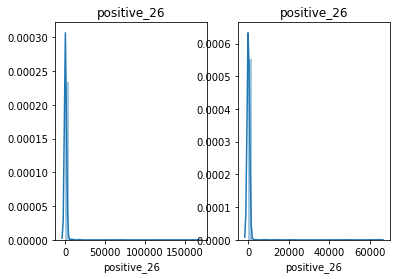

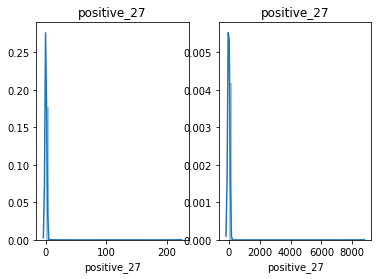

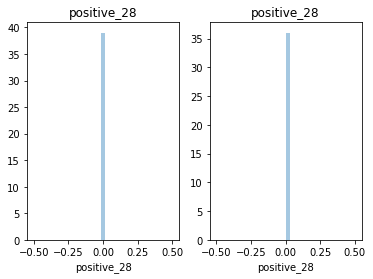

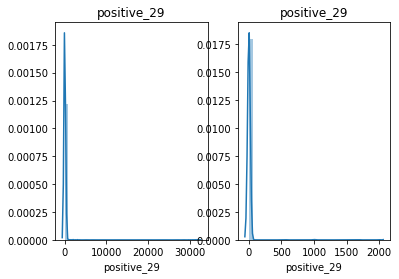

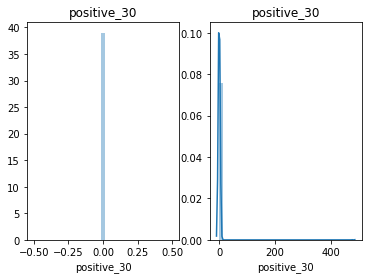

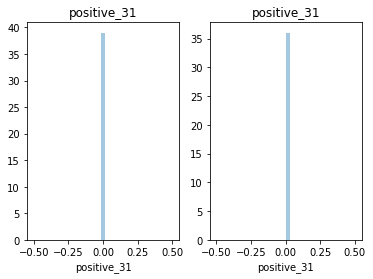

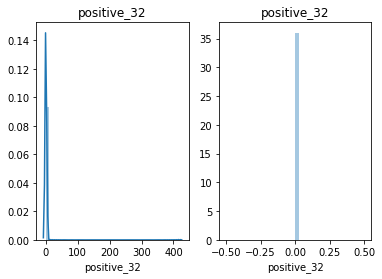

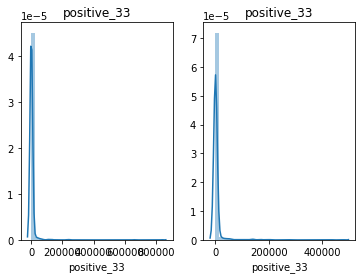

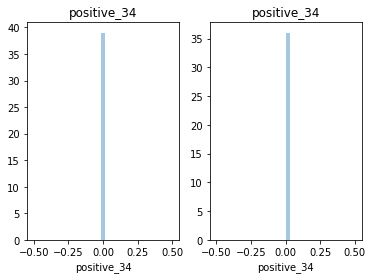

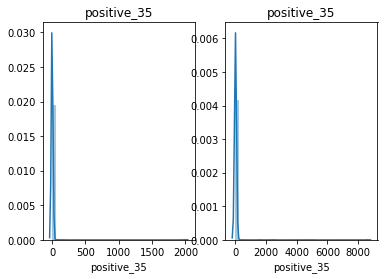

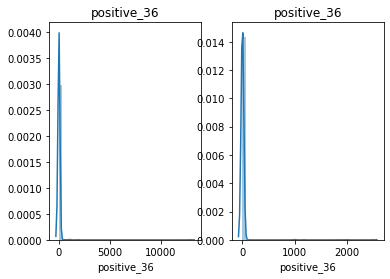

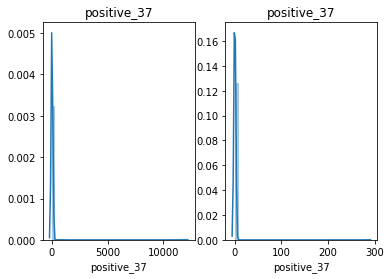

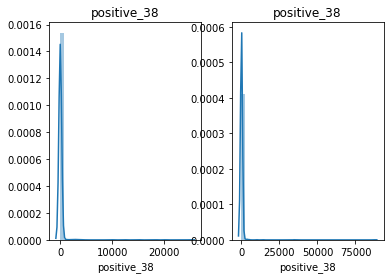

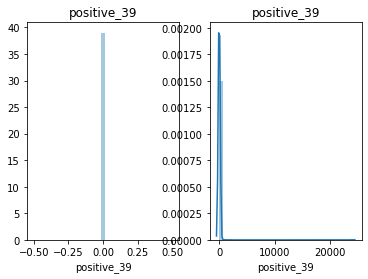

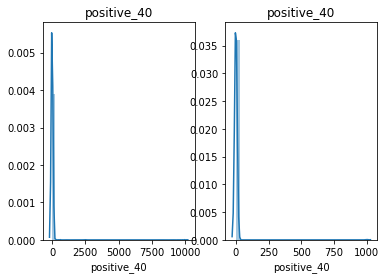

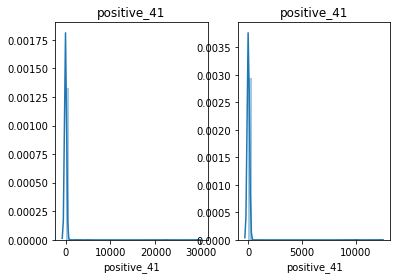

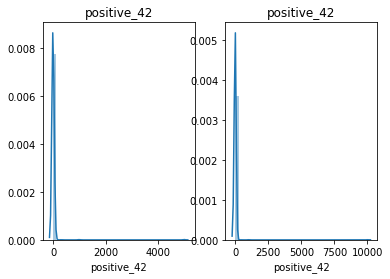

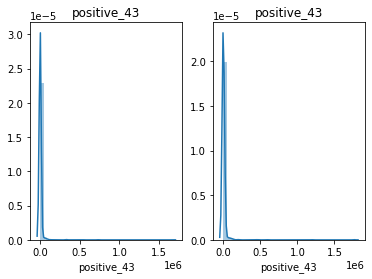

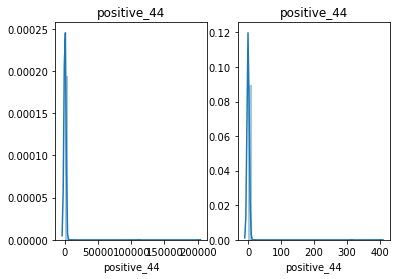

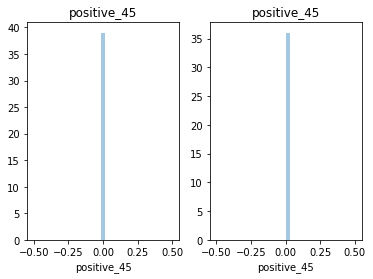

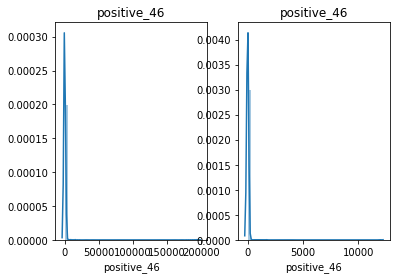

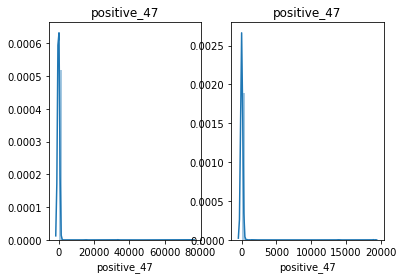

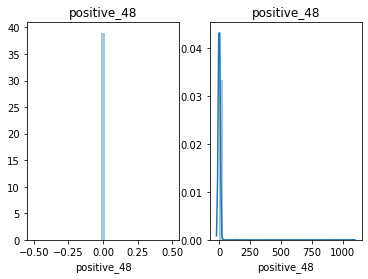

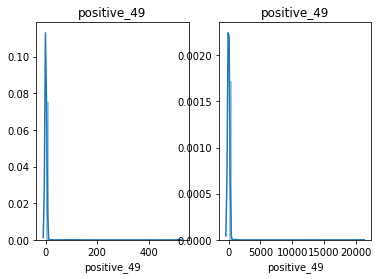

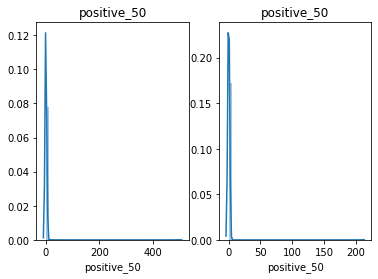

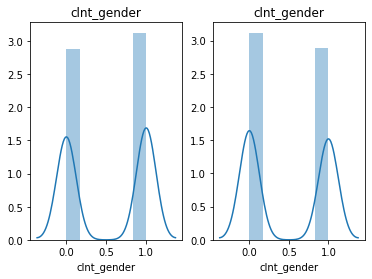

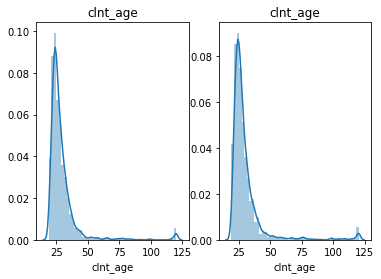

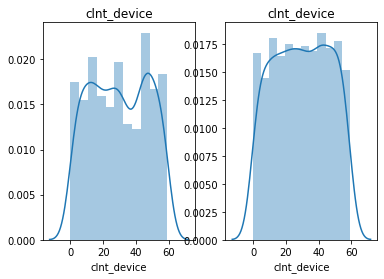

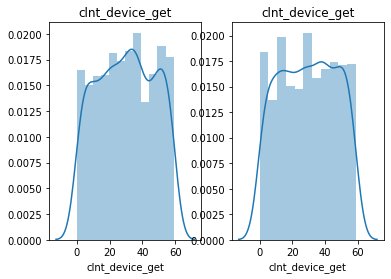

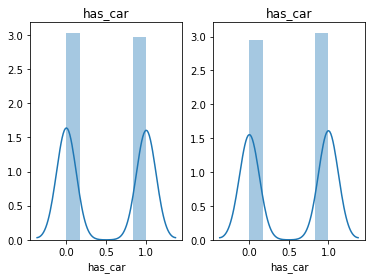

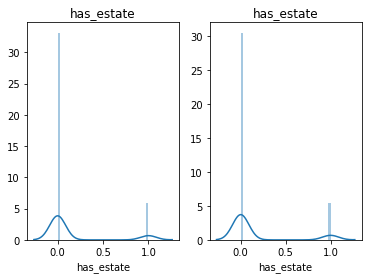

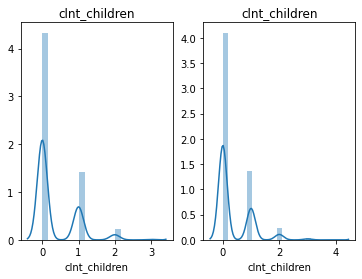

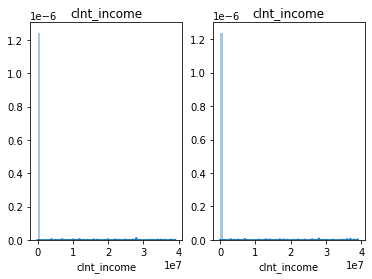

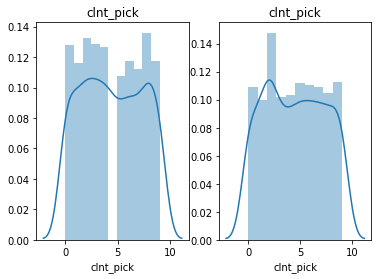

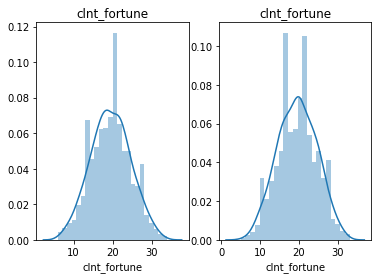

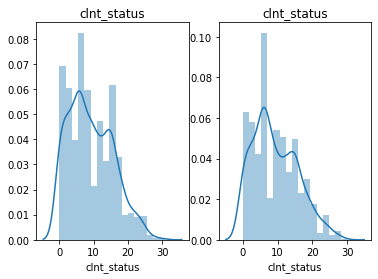

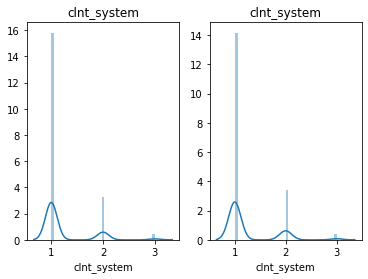

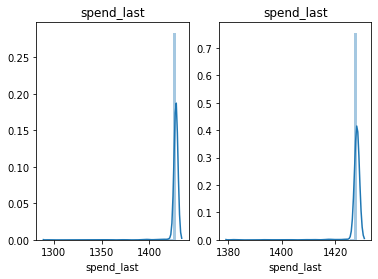

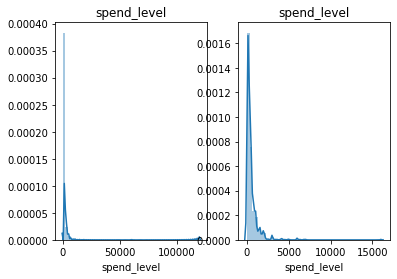

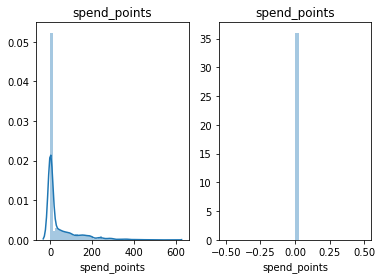

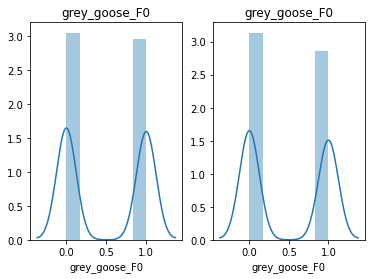

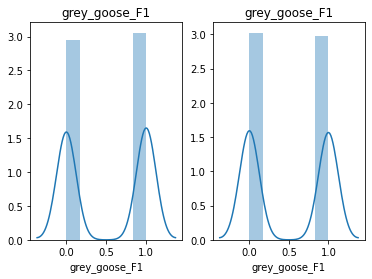

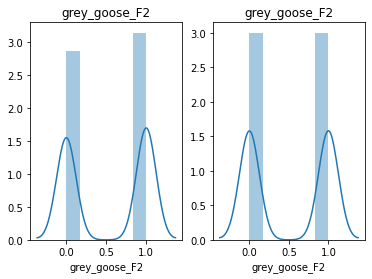

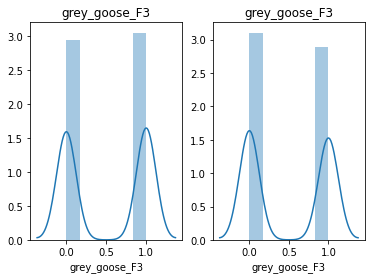

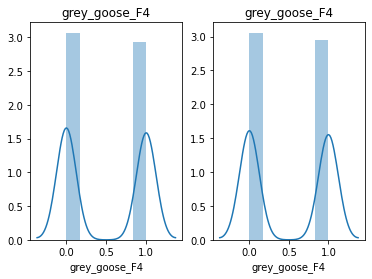

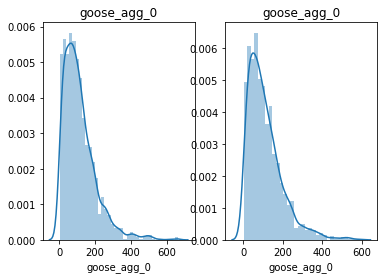

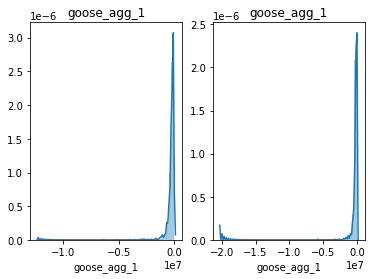

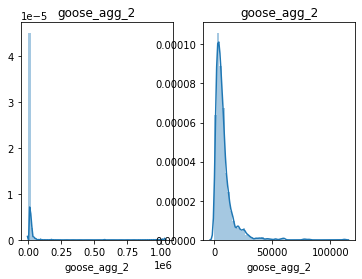

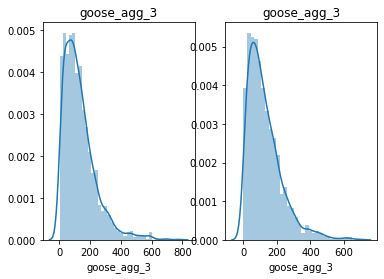

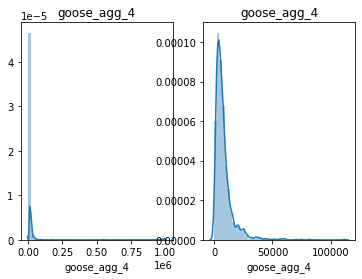

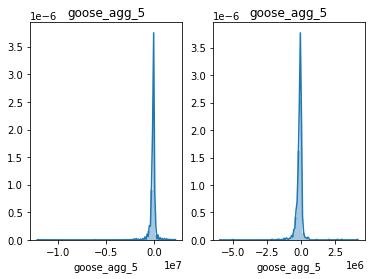

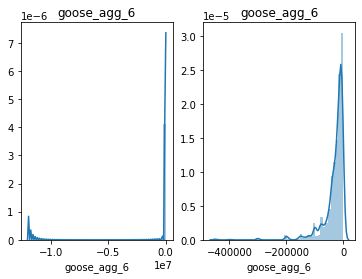

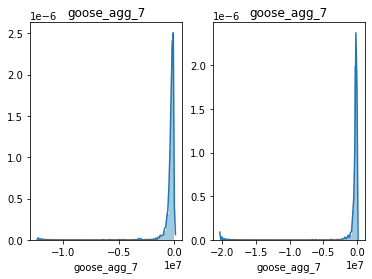

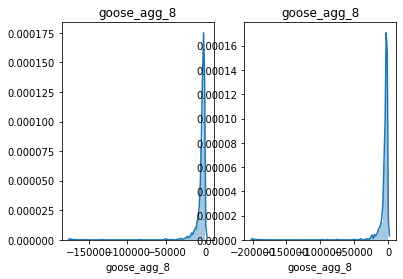

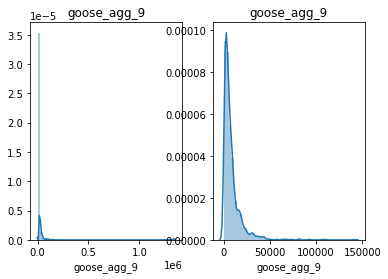

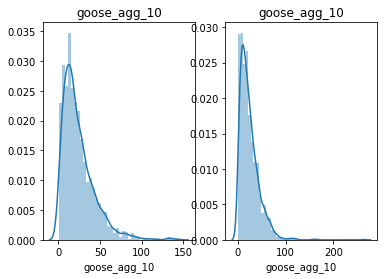

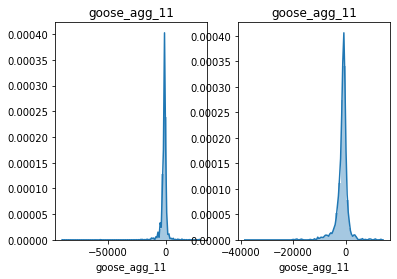

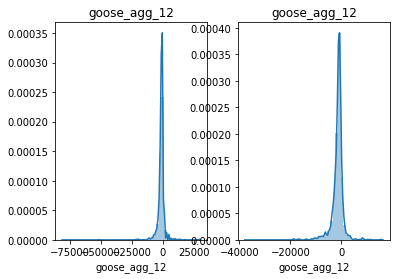

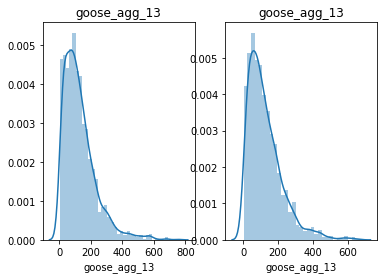

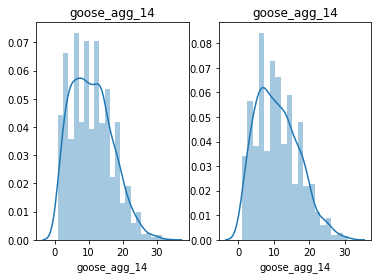

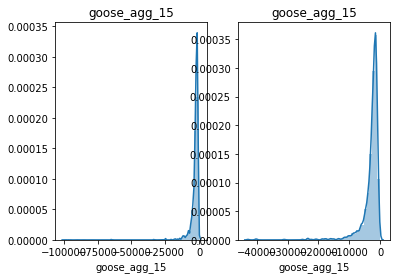

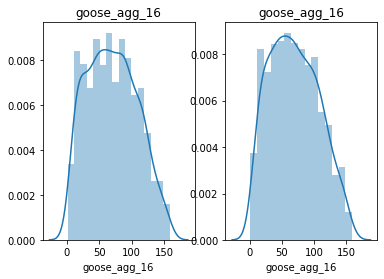

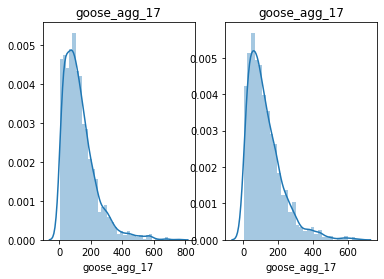

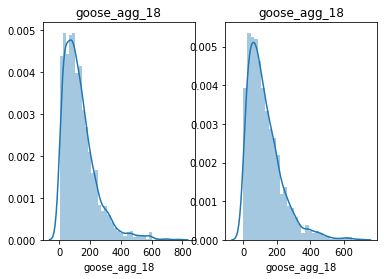

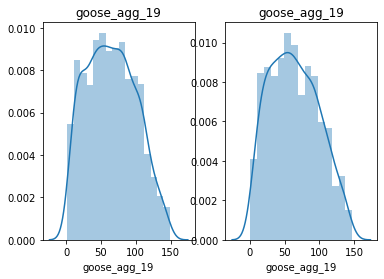

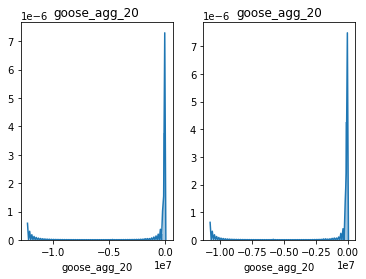

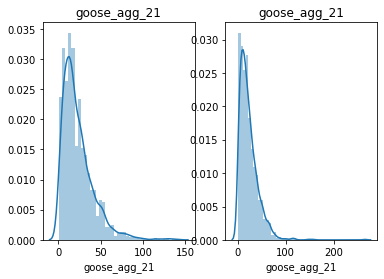

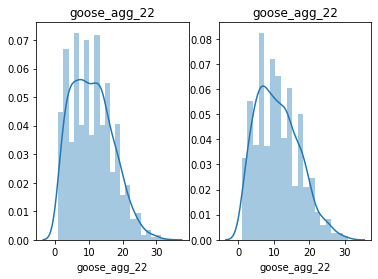

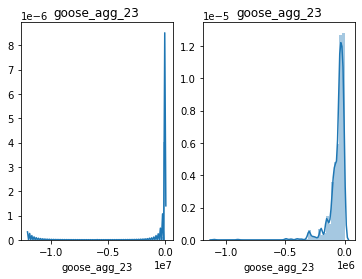

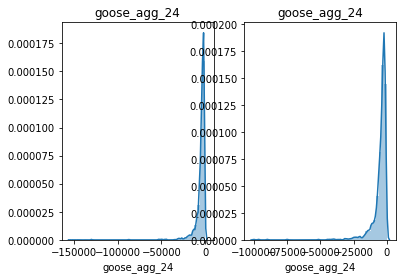

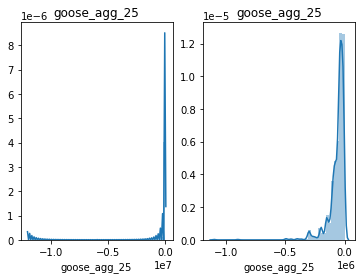

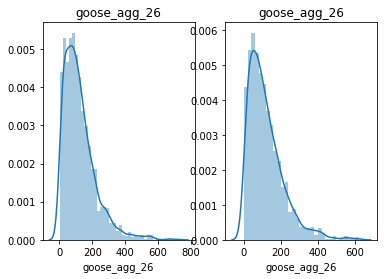

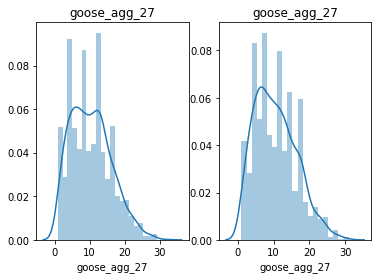

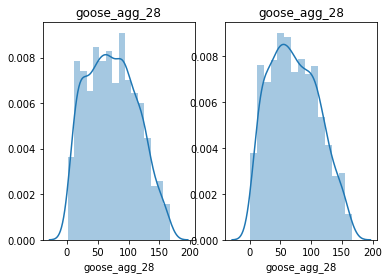

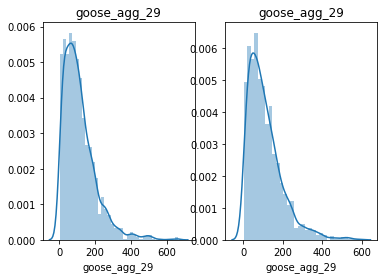

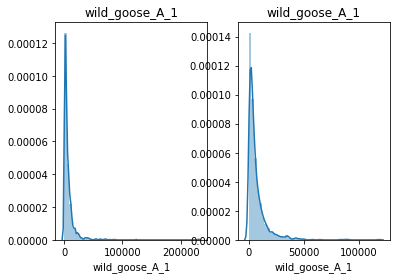

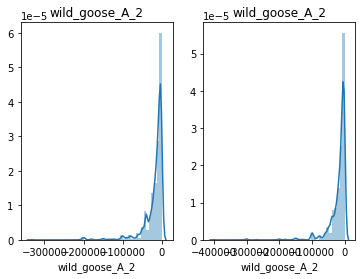

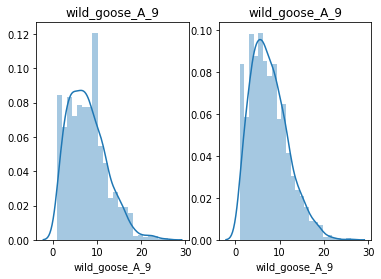

In [62]:
import warnings
warnings.filterwarnings("ignore")
for col in train_df.columns[1:-1]:
    fig, axs = plt.subplots(ncols=2)
    sns.distplot(train_df[col],ax=axs[0])
    sns.distplot(test_df[col],ax=axs[1])
    axs[0].set_title(col)
    axs[1].set_title(col)

In [150]:
train_df['is_premium'].value_counts()

0.0    816
1.0    722
Name: is_premium, dtype: int64

In [299]:
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor


In [331]:
Y_train=train_df['is_premium']
X_train=train_df[las_columns]
X_test=test_df[las_columns]
Y_test=test_df['is_premium']
x_train, x_valid, y_train, y_valid = train_test_split(X_train, Y_train, test_size=0.00001, random_state=0)
print(x_train.shape,x_valid.shape)

(1537, 29) (1, 29)


In [326]:
x_train

negative  positive  goose_agg_15  goose_agg_0  clnt_system  goose_agg_8  \
95    0.329757  0.428674      0.139039     0.238999            2     0.231231   
569   0.148758  0.843636      0.519371     0.867367            1     0.449741   
2510  0.060218  0.900560      0.011390     0.188689            2     0.063784   
1616  0.210533  0.547740      0.149994     0.374875            1     0.392438   
1574  0.358352  0.713124      0.136222     0.188689            1     0.184153   
...        ...       ...           ...          ...          ...          ...   
1429  0.704309  0.571362      0.980816     0.423423            1     0.962199   
1563  0.228475  0.833349      0.307466     0.490490            1     0.589808   
2277  0.295547  0.540690      0.520724     0.662663            1     0.557475   
1065  0.230126  0.172172      0.008836     0.068068            1     0.040037   
1282  0.865830  0.626757      0.984079     0.245746            1     0.954031   

      goose_agg_1  goose_agg_5  clnt_device  wild_goose_A_2  clnt_fortune  \
95       0.542781     0.447331     0.711712        0.746747      0.008008   
569      0.230225     0.316422     1.000000        0.081081      0.462462   
2510     0.121737     0.347398     0.676176        0.013547      0.982983   
1616     0.280565     0.172329     0.436937        0.127628      0.852853   
1574     0.628899     0.712362     0.104104        0.358375      0.319319   
...           ...          ...          ...             ...           ...   
1429     0.902512     0.870942     0.825325        0.746747      0.537037   
1563     0.439019     0.475274     0.239239        0.287788      0.193694   
2277     0.352350     0.183663     0.455956        0.635135      0.679179   
1065     0.320185     0.144394     0.087588        0.215583      0.103604   
1282     0.958123     0.935939     0.730731        0.778278      0.143644   

      wild_goose_A_1  spend_level  goose_agg_11  goose_agg_10  clnt_income  \
95          0.212216     0.555556      0.110956      0.360360     0.000000   
569         0.917862     0.555556      0.605855      0.764765     0.766767   
2510        0.993925     0.870370      0.022040      0.029029     0.469469   
1616        0.724566     0.555556      0.104551      0.901401     0.792292   
1574        0.606614     0.448949      0.701590      0.503504     0.990490   
...              ...          ...           ...           ...          ...   
1429        0.190149     0.253253      0.864543      0.503504     0.491491   
1563        0.649646     0.737738      0.609601      0.603604     0.860861   
2277        0.261272     0.698198      0.274501      0.827828     0.792292   
1065        0.760266     0.448949      0.003557      0.447948     0.689690   
1282        0.280280     0.253253      0.953694      0.182683     0.037037   

      goose_agg_14  clnt_gender  wild_goose_A_9   goose_agg_9  clnt_status  \
95        0.126627          1.0        0.724224   7134.797961     0.363363   
569       0.792292          1.0        0.392392   8403.455940     0.363363   
2510      0.536036          0.0        0.301802  18634.385005     0.534034   
1616      0.185185          0.0        0.484985   6171.992054     0.099099   
1574      0.242743          0.0        0.301802   8116.352917     0.617618   
...            ...          ...             ...           ...          ...   
1429      0.423423          0.0        0.724224    992.031669     0.137638   
1563      0.643143          1.0        0.788288   5413.408779     0.363363   
2277      0.701201          0.0        0.882883   6420.284809     0.099099   
1065      0.000000          1.0        0.000000  12251.324368     0.661662   
1282      0.185185          1.0        0.058559   1024.861245     0.000000   

      negative_33  goose_agg_6  clnt_children  clnt_device_get  goose_agg_2  \
95            1.0     0.378378              0         0.891892     0.578579   
569           1.0     0.162162              1         0.106607     0.555639 

In [328]:
# Some useful parameters which will come in handy later on
ntrain = x_train.shape[0]
ntest = X_test.shape[0]
SEED = 0 # for reproducibility
NFOLDS = 10 # set folds for out-of-fold prediction
kfold = StratifiedKFold(n_splits=5)

# Class to extend the Sklearn classifier
class SklearnHelper(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_state'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def predict_proba(self, x):
        return self.clf.predict_proba(x)[:,1] 
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        print(self.clf.fit(x,y).feature_importances_)
    
# Class to extend XGboost classifer

In [329]:
def get_oof(clf, x_train, y_train, x_test):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))

    for i, (train_index, test_index) in enumerate(list(kfold.split(x_train,y_train))):
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]

        clf.train(x_tr, y_tr)

        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i, :] = (clf.predict_proba(x_test)>= 0.35).astype(bool)

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

In [330]:
print(best_params_rf)
print(best_params_cb)
print(best_params_lgbm)
print(best_params_xgb)

{'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 500, 'random_state': 42}
{'iterations': 1000, 'loss_function': 'CrossEntropy', 'random_state': 42}
{'boosting_type': 'gbdt', 'colsample_bytree': 0.64, 'learning_rate': 0.01, 'max_bin': 255, 'n_estimators': 50, 'num_leaves': 12, 'objective': 'binary', 'random_state': 42, 'reg_alpha': 1.2, 'reg_lambda': 1.5, 'subsample': 0.7}
{'colsample_bytree': 1.0, 'gamma': 5, 'learning_rate': 0.01, 'max_depth': 8, 'min_child_weight': 1, 'n_estimators': 500, 'random_state': 42, 'subsample': 1.0}


In [284]:
rf = SklearnHelper(clf=RandomForestClassifier, seed=SEED, params=best_params_rf)
catboost = SklearnHelper(clf=CatBoostClassifier, seed=SEED, params=best_params_cb)
lgbm = SklearnHelper(clf=LGBMClassifier, seed=SEED, params=best_params_lgbm)
xgboost= SklearnHelper(clf=xgb.XGBClassifier, seed=SEED, params=best_params_xgb)

In [285]:
rf_oof_train, rf_oof_test = get_oof(rf, x_train, y_train, X_test) # 
cb_oof_train, cb_oof_test = get_oof(catboost,x_train, y_train, X_test) # 
lgbm_oof_train, lgbm_oof_test = get_oof(lgbm, x_train, y_train, X_test) # 
xgb_oof_train, xgb_oof_test = get_oof(xgboost, x_train, y_train, X_test)

0:	learn: 0.6889542	total: 3.79ms	remaining: 3.79s
1:	learn: 0.6857719	total: 5.21ms	remaining: 2.6s
2:	learn: 0.6807459	total: 8.26ms	remaining: 2.75s
3:	learn: 0.6762819	total: 11.5ms	remaining: 2.86s
4:	learn: 0.6729168	total: 14.5ms	remaining: 2.89s
5:	learn: 0.6688783	total: 17.5ms	remaining: 2.91s
6:	learn: 0.6647356	total: 20.7ms	remaining: 2.93s
7:	learn: 0.6619653	total: 23.7ms	remaining: 2.94s
8:	learn: 0.6585883	total: 26.8ms	remaining: 2.95s
9:	learn: 0.6551849	total: 29.9ms	remaining: 2.96s
10:	learn: 0.6523869	total: 33.6ms	remaining: 3.02s
11:	learn: 0.6499301	total: 36.1ms	remaining: 2.98s
12:	learn: 0.6466689	total: 38.8ms	remaining: 2.94s
13:	learn: 0.6443758	total: 41.4ms	remaining: 2.91s
14:	learn: 0.6415246	total: 43.9ms	remaining: 2.88s
15:	learn: 0.6381524	total: 45.9ms	remaining: 2.82s
16:	learn: 0.6361026	total: 47.9ms	remaining: 2.77s
17:	learn: 0.6328616	total: 49.8ms	remaining: 2.72s
18:	learn: 0.6304066	total: 51.9ms	remaining: 2.68s
19:	learn: 0.6279332	to

217:	learn: 0.4078713	total: 584ms	remaining: 2.09s
218:	learn: 0.4069484	total: 587ms	remaining: 2.09s
219:	learn: 0.4064038	total: 589ms	remaining: 2.09s
220:	learn: 0.4059173	total: 592ms	remaining: 2.09s
221:	learn: 0.4052820	total: 594ms	remaining: 2.08s
222:	learn: 0.4046395	total: 597ms	remaining: 2.08s
223:	learn: 0.4038760	total: 600ms	remaining: 2.08s
224:	learn: 0.4035531	total: 602ms	remaining: 2.07s
225:	learn: 0.4025716	total: 604ms	remaining: 2.07s
226:	learn: 0.4018814	total: 605ms	remaining: 2.06s
227:	learn: 0.4010476	total: 608ms	remaining: 2.06s
228:	learn: 0.4005398	total: 610ms	remaining: 2.05s
229:	learn: 0.3995642	total: 612ms	remaining: 2.05s
230:	learn: 0.3985910	total: 614ms	remaining: 2.04s
231:	learn: 0.3977675	total: 616ms	remaining: 2.04s
232:	learn: 0.3969142	total: 617ms	remaining: 2.03s
233:	learn: 0.3965851	total: 619ms	remaining: 2.03s
234:	learn: 0.3960268	total: 621ms	remaining: 2.02s
235:	learn: 0.3951013	total: 623ms	remaining: 2.02s
236:	learn: 

382:	learn: 0.2943107	total: 965ms	remaining: 1.55s
383:	learn: 0.2937178	total: 967ms	remaining: 1.55s
384:	learn: 0.2929109	total: 971ms	remaining: 1.55s
385:	learn: 0.2925668	total: 974ms	remaining: 1.55s
386:	learn: 0.2918046	total: 976ms	remaining: 1.54s
387:	learn: 0.2911012	total: 978ms	remaining: 1.54s
388:	learn: 0.2907248	total: 982ms	remaining: 1.54s
389:	learn: 0.2903738	total: 984ms	remaining: 1.54s
390:	learn: 0.2897778	total: 987ms	remaining: 1.54s
391:	learn: 0.2888460	total: 989ms	remaining: 1.53s
392:	learn: 0.2884079	total: 991ms	remaining: 1.53s
393:	learn: 0.2882538	total: 992ms	remaining: 1.53s
394:	learn: 0.2876418	total: 994ms	remaining: 1.52s
395:	learn: 0.2870698	total: 996ms	remaining: 1.52s
396:	learn: 0.2866538	total: 998ms	remaining: 1.51s
397:	learn: 0.2856287	total: 1000ms	remaining: 1.51s
398:	learn: 0.2847688	total: 1s	remaining: 1.51s
399:	learn: 0.2838763	total: 1s	remaining: 1.5s
400:	learn: 0.2829969	total: 1s	remaining: 1.5s
401:	learn: 0.2824196	

594:	learn: 0.1860971	total: 1.55s	remaining: 1.05s
595:	learn: 0.1856010	total: 1.55s	remaining: 1.05s
596:	learn: 0.1853867	total: 1.55s	remaining: 1.05s
597:	learn: 0.1851178	total: 1.56s	remaining: 1.05s
598:	learn: 0.1844462	total: 1.56s	remaining: 1.04s
599:	learn: 0.1840730	total: 1.56s	remaining: 1.04s
600:	learn: 0.1835769	total: 1.56s	remaining: 1.04s
601:	learn: 0.1831442	total: 1.57s	remaining: 1.04s
602:	learn: 0.1827457	total: 1.57s	remaining: 1.03s
603:	learn: 0.1823978	total: 1.57s	remaining: 1.03s
604:	learn: 0.1821833	total: 1.57s	remaining: 1.03s
605:	learn: 0.1817691	total: 1.57s	remaining: 1.02s
606:	learn: 0.1814456	total: 1.58s	remaining: 1.02s
607:	learn: 0.1809562	total: 1.58s	remaining: 1.02s
608:	learn: 0.1804875	total: 1.58s	remaining: 1.01s
609:	learn: 0.1802602	total: 1.58s	remaining: 1.01s
610:	learn: 0.1799769	total: 1.58s	remaining: 1.01s
611:	learn: 0.1794705	total: 1.59s	remaining: 1.01s
612:	learn: 0.1789568	total: 1.59s	remaining: 1s
613:	learn: 0.1

848:	learn: 0.1129355	total: 2.13s	remaining: 380ms
849:	learn: 0.1128329	total: 2.14s	remaining: 377ms
850:	learn: 0.1126067	total: 2.14s	remaining: 375ms
851:	learn: 0.1125832	total: 2.14s	remaining: 372ms
852:	learn: 0.1122873	total: 2.15s	remaining: 370ms
853:	learn: 0.1121009	total: 2.15s	remaining: 367ms
854:	learn: 0.1118876	total: 2.15s	remaining: 365ms
855:	learn: 0.1116553	total: 2.15s	remaining: 362ms
856:	learn: 0.1114923	total: 2.15s	remaining: 360ms
857:	learn: 0.1112385	total: 2.16s	remaining: 357ms
858:	learn: 0.1110103	total: 2.16s	remaining: 354ms
859:	learn: 0.1108924	total: 2.16s	remaining: 352ms
860:	learn: 0.1107875	total: 2.16s	remaining: 349ms
861:	learn: 0.1105789	total: 2.17s	remaining: 347ms
862:	learn: 0.1103142	total: 2.17s	remaining: 345ms
863:	learn: 0.1101228	total: 2.19s	remaining: 344ms
864:	learn: 0.1100078	total: 2.19s	remaining: 342ms
865:	learn: 0.1096592	total: 2.19s	remaining: 339ms
866:	learn: 0.1093159	total: 2.2s	remaining: 337ms
867:	learn: 0

91:	learn: 0.5198547	total: 198ms	remaining: 1.95s
92:	learn: 0.5190670	total: 200ms	remaining: 1.95s
93:	learn: 0.5177835	total: 203ms	remaining: 1.96s
94:	learn: 0.5170646	total: 205ms	remaining: 1.96s
95:	learn: 0.5164485	total: 208ms	remaining: 1.96s
96:	learn: 0.5154922	total: 210ms	remaining: 1.96s
97:	learn: 0.5145832	total: 214ms	remaining: 1.97s
98:	learn: 0.5135236	total: 216ms	remaining: 1.97s
99:	learn: 0.5125771	total: 218ms	remaining: 1.96s
100:	learn: 0.5116119	total: 220ms	remaining: 1.96s
101:	learn: 0.5108374	total: 222ms	remaining: 1.96s
102:	learn: 0.5093976	total: 225ms	remaining: 1.96s
103:	learn: 0.5084102	total: 226ms	remaining: 1.95s
104:	learn: 0.5075769	total: 228ms	remaining: 1.95s
105:	learn: 0.5066231	total: 230ms	remaining: 1.94s
106:	learn: 0.5055954	total: 232ms	remaining: 1.94s
107:	learn: 0.5038877	total: 234ms	remaining: 1.93s
108:	learn: 0.5033894	total: 236ms	remaining: 1.93s
109:	learn: 0.5019236	total: 237ms	remaining: 1.92s
110:	learn: 0.5005621

285:	learn: 0.3619006	total: 585ms	remaining: 1.46s
286:	learn: 0.3611886	total: 587ms	remaining: 1.46s
287:	learn: 0.3607063	total: 590ms	remaining: 1.46s
288:	learn: 0.3602252	total: 593ms	remaining: 1.46s
289:	learn: 0.3592830	total: 599ms	remaining: 1.47s
290:	learn: 0.3586079	total: 602ms	remaining: 1.47s
291:	learn: 0.3574464	total: 604ms	remaining: 1.47s
292:	learn: 0.3564918	total: 608ms	remaining: 1.47s
293:	learn: 0.3558778	total: 611ms	remaining: 1.47s
294:	learn: 0.3550629	total: 613ms	remaining: 1.47s
295:	learn: 0.3545455	total: 616ms	remaining: 1.47s
296:	learn: 0.3533988	total: 618ms	remaining: 1.46s
297:	learn: 0.3523406	total: 621ms	remaining: 1.46s
298:	learn: 0.3514933	total: 624ms	remaining: 1.46s
299:	learn: 0.3510560	total: 626ms	remaining: 1.46s
300:	learn: 0.3495171	total: 628ms	remaining: 1.46s
301:	learn: 0.3491930	total: 630ms	remaining: 1.46s
302:	learn: 0.3487682	total: 632ms	remaining: 1.45s
303:	learn: 0.3481795	total: 634ms	remaining: 1.45s
304:	learn: 

539:	learn: 0.2072911	total: 1.16s	remaining: 992ms
540:	learn: 0.2068933	total: 1.17s	remaining: 992ms
541:	learn: 0.2064093	total: 1.17s	remaining: 991ms
542:	learn: 0.2056546	total: 1.18s	remaining: 989ms
543:	learn: 0.2053916	total: 1.18s	remaining: 987ms
544:	learn: 0.2048037	total: 1.18s	remaining: 985ms
545:	learn: 0.2043360	total: 1.18s	remaining: 985ms
546:	learn: 0.2040173	total: 1.19s	remaining: 982ms
547:	learn: 0.2036817	total: 1.19s	remaining: 980ms
548:	learn: 0.2030388	total: 1.19s	remaining: 978ms
549:	learn: 0.2027299	total: 1.19s	remaining: 975ms
550:	learn: 0.2020433	total: 1.19s	remaining: 973ms
551:	learn: 0.2016094	total: 1.2s	remaining: 971ms
552:	learn: 0.2012298	total: 1.2s	remaining: 969ms
553:	learn: 0.2004861	total: 1.2s	remaining: 966ms
554:	learn: 0.1998300	total: 1.2s	remaining: 964ms
555:	learn: 0.1993932	total: 1.2s	remaining: 961ms
556:	learn: 0.1989991	total: 1.21s	remaining: 959ms
557:	learn: 0.1984539	total: 1.21s	remaining: 956ms
558:	learn: 0.198

760:	learn: 0.1322343	total: 1.75s	remaining: 550ms
761:	learn: 0.1320008	total: 1.75s	remaining: 548ms
762:	learn: 0.1317854	total: 1.76s	remaining: 546ms
763:	learn: 0.1315825	total: 1.76s	remaining: 544ms
764:	learn: 0.1313918	total: 1.76s	remaining: 542ms
765:	learn: 0.1310870	total: 1.76s	remaining: 539ms
766:	learn: 0.1309094	total: 1.77s	remaining: 537ms
767:	learn: 0.1306224	total: 1.77s	remaining: 535ms
768:	learn: 0.1302701	total: 1.77s	remaining: 533ms
769:	learn: 0.1299171	total: 1.77s	remaining: 530ms
770:	learn: 0.1297366	total: 1.78s	remaining: 528ms
771:	learn: 0.1296366	total: 1.78s	remaining: 525ms
772:	learn: 0.1293099	total: 1.78s	remaining: 523ms
773:	learn: 0.1291222	total: 1.78s	remaining: 521ms
774:	learn: 0.1290205	total: 1.78s	remaining: 518ms
775:	learn: 0.1287394	total: 1.79s	remaining: 516ms
776:	learn: 0.1286280	total: 1.79s	remaining: 513ms
777:	learn: 0.1283817	total: 1.79s	remaining: 511ms
778:	learn: 0.1280742	total: 1.79s	remaining: 509ms
779:	learn: 

955:	learn: 0.0931994	total: 2.14s	remaining: 98.4ms
956:	learn: 0.0930015	total: 2.14s	remaining: 96.2ms
957:	learn: 0.0927762	total: 2.14s	remaining: 94ms
958:	learn: 0.0926514	total: 2.15s	remaining: 91.8ms
959:	learn: 0.0925258	total: 2.15s	remaining: 89.6ms
960:	learn: 0.0923841	total: 2.15s	remaining: 87.3ms
961:	learn: 0.0922946	total: 2.15s	remaining: 85.1ms
962:	learn: 0.0922073	total: 2.16s	remaining: 82.9ms
963:	learn: 0.0920541	total: 2.16s	remaining: 80.6ms
964:	learn: 0.0918486	total: 2.16s	remaining: 78.4ms
965:	learn: 0.0916564	total: 2.16s	remaining: 76.2ms
966:	learn: 0.0915313	total: 2.17s	remaining: 73.9ms
967:	learn: 0.0913239	total: 2.17s	remaining: 71.7ms
968:	learn: 0.0912011	total: 2.17s	remaining: 69.4ms
969:	learn: 0.0911248	total: 2.17s	remaining: 67.2ms
970:	learn: 0.0908782	total: 2.17s	remaining: 64.9ms
971:	learn: 0.0906405	total: 2.18s	remaining: 62.7ms
972:	learn: 0.0904813	total: 2.18s	remaining: 60.4ms
973:	learn: 0.0902705	total: 2.18s	remaining: 58

145:	learn: 0.4681810	total: 397ms	remaining: 2.32s
146:	learn: 0.4674459	total: 400ms	remaining: 2.32s
147:	learn: 0.4665778	total: 403ms	remaining: 2.32s
148:	learn: 0.4654435	total: 406ms	remaining: 2.32s
149:	learn: 0.4649081	total: 409ms	remaining: 2.31s
150:	learn: 0.4635101	total: 411ms	remaining: 2.31s
151:	learn: 0.4623371	total: 414ms	remaining: 2.31s
152:	learn: 0.4614001	total: 417ms	remaining: 2.31s
153:	learn: 0.4607205	total: 419ms	remaining: 2.3s
154:	learn: 0.4599412	total: 421ms	remaining: 2.29s
155:	learn: 0.4590942	total: 423ms	remaining: 2.29s
156:	learn: 0.4582062	total: 425ms	remaining: 2.28s
157:	learn: 0.4573196	total: 427ms	remaining: 2.27s
158:	learn: 0.4568295	total: 429ms	remaining: 2.27s
159:	learn: 0.4558999	total: 431ms	remaining: 2.26s
160:	learn: 0.4546517	total: 433ms	remaining: 2.25s
161:	learn: 0.4540530	total: 435ms	remaining: 2.25s
162:	learn: 0.4533261	total: 437ms	remaining: 2.24s
163:	learn: 0.4528257	total: 438ms	remaining: 2.23s
164:	learn: 0

338:	learn: 0.3255080	total: 781ms	remaining: 1.52s
339:	learn: 0.3245559	total: 784ms	remaining: 1.52s
340:	learn: 0.3236520	total: 787ms	remaining: 1.52s
341:	learn: 0.3229153	total: 790ms	remaining: 1.52s
342:	learn: 0.3222229	total: 792ms	remaining: 1.52s
343:	learn: 0.3215130	total: 795ms	remaining: 1.51s
344:	learn: 0.3209328	total: 798ms	remaining: 1.51s
345:	learn: 0.3199315	total: 800ms	remaining: 1.51s
346:	learn: 0.3189310	total: 802ms	remaining: 1.51s
347:	learn: 0.3179028	total: 803ms	remaining: 1.5s
348:	learn: 0.3172184	total: 805ms	remaining: 1.5s
349:	learn: 0.3166174	total: 808ms	remaining: 1.5s
350:	learn: 0.3165208	total: 810ms	remaining: 1.5s
351:	learn: 0.3158573	total: 812ms	remaining: 1.5s
352:	learn: 0.3150629	total: 814ms	remaining: 1.49s
353:	learn: 0.3144580	total: 816ms	remaining: 1.49s
354:	learn: 0.3132079	total: 818ms	remaining: 1.49s
355:	learn: 0.3126521	total: 820ms	remaining: 1.48s
356:	learn: 0.3116562	total: 822ms	remaining: 1.48s
357:	learn: 0.310

550:	learn: 0.2075485	total: 1.36s	remaining: 1.11s
551:	learn: 0.2069819	total: 1.36s	remaining: 1.11s
552:	learn: 0.2067476	total: 1.37s	remaining: 1.11s
553:	learn: 0.2065075	total: 1.37s	remaining: 1.1s
554:	learn: 0.2061706	total: 1.37s	remaining: 1.1s
555:	learn: 0.2056900	total: 1.38s	remaining: 1.1s
556:	learn: 0.2053440	total: 1.38s	remaining: 1.1s
557:	learn: 0.2046749	total: 1.38s	remaining: 1.09s
558:	learn: 0.2044284	total: 1.39s	remaining: 1.09s
559:	learn: 0.2037883	total: 1.39s	remaining: 1.09s
560:	learn: 0.2033896	total: 1.39s	remaining: 1.09s
561:	learn: 0.2030190	total: 1.4s	remaining: 1.09s
562:	learn: 0.2026221	total: 1.4s	remaining: 1.08s
563:	learn: 0.2023623	total: 1.4s	remaining: 1.08s
564:	learn: 0.2018404	total: 1.41s	remaining: 1.08s
565:	learn: 0.2015199	total: 1.41s	remaining: 1.08s
566:	learn: 0.2014292	total: 1.41s	remaining: 1.08s
567:	learn: 0.2009307	total: 1.42s	remaining: 1.08s
568:	learn: 0.2004678	total: 1.43s	remaining: 1.08s
569:	learn: 0.19986

772:	learn: 0.1334811	total: 2.16s	remaining: 634ms
773:	learn: 0.1332690	total: 2.16s	remaining: 631ms
774:	learn: 0.1330304	total: 2.16s	remaining: 628ms
775:	learn: 0.1327606	total: 2.17s	remaining: 625ms
776:	learn: 0.1325542	total: 2.17s	remaining: 622ms
777:	learn: 0.1324600	total: 2.17s	remaining: 619ms
778:	learn: 0.1321682	total: 2.17s	remaining: 617ms
779:	learn: 0.1317326	total: 2.17s	remaining: 613ms
780:	learn: 0.1314648	total: 2.18s	remaining: 610ms
781:	learn: 0.1314485	total: 2.18s	remaining: 607ms
782:	learn: 0.1312735	total: 2.18s	remaining: 604ms
783:	learn: 0.1310203	total: 2.18s	remaining: 601ms
784:	learn: 0.1307547	total: 2.18s	remaining: 598ms
785:	learn: 0.1304900	total: 2.19s	remaining: 595ms
786:	learn: 0.1303686	total: 2.19s	remaining: 592ms
787:	learn: 0.1301780	total: 2.19s	remaining: 589ms
788:	learn: 0.1300837	total: 2.19s	remaining: 586ms
789:	learn: 0.1300080	total: 2.19s	remaining: 583ms
790:	learn: 0.1295088	total: 2.19s	remaining: 580ms
791:	learn: 

967:	learn: 0.0935205	total: 2.54s	remaining: 84.1ms
968:	learn: 0.0932824	total: 2.55s	remaining: 81.5ms
969:	learn: 0.0932638	total: 2.55s	remaining: 78.8ms
970:	learn: 0.0930959	total: 2.55s	remaining: 76.2ms
971:	learn: 0.0930079	total: 2.55s	remaining: 73.6ms
972:	learn: 0.0928256	total: 2.56s	remaining: 70.9ms
973:	learn: 0.0925665	total: 2.56s	remaining: 68.3ms
974:	learn: 0.0924950	total: 2.56s	remaining: 65.7ms
975:	learn: 0.0923363	total: 2.56s	remaining: 63.1ms
976:	learn: 0.0921371	total: 2.57s	remaining: 60.4ms
977:	learn: 0.0919256	total: 2.57s	remaining: 57.8ms
978:	learn: 0.0918585	total: 2.57s	remaining: 55.2ms
979:	learn: 0.0917418	total: 2.58s	remaining: 52.6ms
980:	learn: 0.0916418	total: 2.58s	remaining: 49.9ms
981:	learn: 0.0914474	total: 2.58s	remaining: 47.3ms
982:	learn: 0.0911566	total: 2.58s	remaining: 44.7ms
983:	learn: 0.0910141	total: 2.59s	remaining: 42.1ms
984:	learn: 0.0909205	total: 2.59s	remaining: 39.5ms
985:	learn: 0.0907967	total: 2.59s	remaining: 

221:	learn: 0.3924243	total: 587ms	remaining: 2.06s
222:	learn: 0.3918670	total: 590ms	remaining: 2.06s
223:	learn: 0.3904811	total: 593ms	remaining: 2.05s
224:	learn: 0.3895090	total: 595ms	remaining: 2.05s
225:	learn: 0.3887534	total: 598ms	remaining: 2.05s
226:	learn: 0.3880496	total: 600ms	remaining: 2.04s
227:	learn: 0.3874947	total: 602ms	remaining: 2.04s
228:	learn: 0.3869376	total: 607ms	remaining: 2.04s
229:	learn: 0.3864191	total: 609ms	remaining: 2.04s
230:	learn: 0.3860082	total: 611ms	remaining: 2.03s
231:	learn: 0.3854785	total: 612ms	remaining: 2.03s
232:	learn: 0.3849749	total: 614ms	remaining: 2.02s
233:	learn: 0.3842889	total: 616ms	remaining: 2.02s
234:	learn: 0.3833265	total: 618ms	remaining: 2.01s
235:	learn: 0.3827685	total: 620ms	remaining: 2.01s
236:	learn: 0.3822195	total: 622ms	remaining: 2s
237:	learn: 0.3816202	total: 623ms	remaining: 2s
238:	learn: 0.3805841	total: 625ms	remaining: 1.99s
239:	learn: 0.3799542	total: 627ms	remaining: 1.99s
240:	learn: 0.3795

417:	learn: 0.2614527	total: 972ms	remaining: 1.35s
418:	learn: 0.2607289	total: 977ms	remaining: 1.35s
419:	learn: 0.2600235	total: 979ms	remaining: 1.35s
420:	learn: 0.2595715	total: 982ms	remaining: 1.35s
421:	learn: 0.2591266	total: 984ms	remaining: 1.35s
422:	learn: 0.2584757	total: 988ms	remaining: 1.35s
423:	learn: 0.2579489	total: 990ms	remaining: 1.34s
424:	learn: 0.2569553	total: 992ms	remaining: 1.34s
425:	learn: 0.2561935	total: 994ms	remaining: 1.34s
426:	learn: 0.2554376	total: 995ms	remaining: 1.33s
427:	learn: 0.2550900	total: 997ms	remaining: 1.33s
428:	learn: 0.2545073	total: 1000ms	remaining: 1.33s
429:	learn: 0.2542980	total: 1s	remaining: 1.33s
430:	learn: 0.2538125	total: 1s	remaining: 1.32s
431:	learn: 0.2531635	total: 1s	remaining: 1.32s
432:	learn: 0.2527186	total: 1.01s	remaining: 1.32s
433:	learn: 0.2524990	total: 1.01s	remaining: 1.32s
434:	learn: 0.2518314	total: 1.01s	remaining: 1.31s
435:	learn: 0.2512963	total: 1.01s	remaining: 1.31s
436:	learn: 0.250883

613:	learn: 0.1689389	total: 1.37s	remaining: 860ms
614:	learn: 0.1685687	total: 1.37s	remaining: 858ms
615:	learn: 0.1678695	total: 1.38s	remaining: 858ms
616:	learn: 0.1675972	total: 1.38s	remaining: 856ms
617:	learn: 0.1672933	total: 1.38s	remaining: 854ms
618:	learn: 0.1668263	total: 1.38s	remaining: 851ms
619:	learn: 0.1665224	total: 1.39s	remaining: 850ms
620:	learn: 0.1661198	total: 1.39s	remaining: 848ms
621:	learn: 0.1654471	total: 1.39s	remaining: 845ms
622:	learn: 0.1650706	total: 1.39s	remaining: 843ms
623:	learn: 0.1645732	total: 1.4s	remaining: 841ms
624:	learn: 0.1643704	total: 1.4s	remaining: 838ms
625:	learn: 0.1640131	total: 1.4s	remaining: 836ms
626:	learn: 0.1636516	total: 1.4s	remaining: 834ms
627:	learn: 0.1632385	total: 1.4s	remaining: 831ms
628:	learn: 0.1629523	total: 1.4s	remaining: 829ms
629:	learn: 0.1624111	total: 1.41s	remaining: 826ms
630:	learn: 0.1620899	total: 1.41s	remaining: 824ms
631:	learn: 0.1617990	total: 1.41s	remaining: 821ms
632:	learn: 0.1614

798:	learn: 0.1150494	total: 1.75s	remaining: 441ms
799:	learn: 0.1149198	total: 1.76s	remaining: 440ms
800:	learn: 0.1147932	total: 1.76s	remaining: 438ms
801:	learn: 0.1145840	total: 1.76s	remaining: 435ms
802:	learn: 0.1144130	total: 1.77s	remaining: 433ms
803:	learn: 0.1142996	total: 1.77s	remaining: 431ms
804:	learn: 0.1141911	total: 1.77s	remaining: 429ms
805:	learn: 0.1139880	total: 1.77s	remaining: 427ms
806:	learn: 0.1136889	total: 1.77s	remaining: 425ms
807:	learn: 0.1134189	total: 1.78s	remaining: 422ms
808:	learn: 0.1131416	total: 1.78s	remaining: 420ms
809:	learn: 0.1130822	total: 1.78s	remaining: 418ms
810:	learn: 0.1127373	total: 1.78s	remaining: 416ms
811:	learn: 0.1125528	total: 1.78s	remaining: 413ms
812:	learn: 0.1125079	total: 1.79s	remaining: 411ms
813:	learn: 0.1123714	total: 1.79s	remaining: 409ms
814:	learn: 0.1121232	total: 1.79s	remaining: 407ms
815:	learn: 0.1120192	total: 1.79s	remaining: 404ms
816:	learn: 0.1118658	total: 1.79s	remaining: 402ms
817:	learn: 

978:	learn: 0.0839895	total: 2.14s	remaining: 45.9ms
979:	learn: 0.0838280	total: 2.14s	remaining: 43.7ms
980:	learn: 0.0835804	total: 2.15s	remaining: 41.5ms
981:	learn: 0.0835364	total: 2.15s	remaining: 39.4ms
982:	learn: 0.0834294	total: 2.15s	remaining: 37.2ms
983:	learn: 0.0833201	total: 2.15s	remaining: 35ms
984:	learn: 0.0831646	total: 2.16s	remaining: 32.8ms
985:	learn: 0.0829718	total: 2.16s	remaining: 30.6ms
986:	learn: 0.0828279	total: 2.16s	remaining: 28.5ms
987:	learn: 0.0826007	total: 2.16s	remaining: 26.3ms
988:	learn: 0.0825479	total: 2.17s	remaining: 24.1ms
989:	learn: 0.0823906	total: 2.17s	remaining: 21.9ms
990:	learn: 0.0822283	total: 2.17s	remaining: 19.7ms
991:	learn: 0.0821692	total: 2.17s	remaining: 17.5ms
992:	learn: 0.0820269	total: 2.18s	remaining: 15.3ms
993:	learn: 0.0819617	total: 2.18s	remaining: 13.2ms
994:	learn: 0.0817921	total: 2.18s	remaining: 11ms
995:	learn: 0.0816056	total: 2.19s	remaining: 8.78ms
996:	learn: 0.0814239	total: 2.19s	remaining: 6.59

169:	learn: 0.4495799	total: 401ms	remaining: 1.96s
170:	learn: 0.4479933	total: 404ms	remaining: 1.96s
171:	learn: 0.4465586	total: 406ms	remaining: 1.96s
172:	learn: 0.4460890	total: 409ms	remaining: 1.96s
173:	learn: 0.4456599	total: 412ms	remaining: 1.95s
174:	learn: 0.4451929	total: 415ms	remaining: 1.95s
175:	learn: 0.4447066	total: 416ms	remaining: 1.95s
176:	learn: 0.4440150	total: 418ms	remaining: 1.94s
177:	learn: 0.4433467	total: 420ms	remaining: 1.94s
178:	learn: 0.4426992	total: 422ms	remaining: 1.94s
179:	learn: 0.4420894	total: 424ms	remaining: 1.93s
180:	learn: 0.4407230	total: 426ms	remaining: 1.93s
181:	learn: 0.4401544	total: 428ms	remaining: 1.92s
182:	learn: 0.4394254	total: 430ms	remaining: 1.92s
183:	learn: 0.4390110	total: 431ms	remaining: 1.91s
184:	learn: 0.4383693	total: 433ms	remaining: 1.91s
185:	learn: 0.4376280	total: 435ms	remaining: 1.9s
186:	learn: 0.4370627	total: 437ms	remaining: 1.9s
187:	learn: 0.4357153	total: 439ms	remaining: 1.9s
188:	learn: 0.4

358:	learn: 0.3051331	total: 791ms	remaining: 1.41s
359:	learn: 0.3044531	total: 795ms	remaining: 1.41s
360:	learn: 0.3041235	total: 798ms	remaining: 1.41s
361:	learn: 0.3030482	total: 801ms	remaining: 1.41s
362:	learn: 0.3028943	total: 803ms	remaining: 1.41s
363:	learn: 0.3021723	total: 806ms	remaining: 1.41s
364:	learn: 0.3014632	total: 809ms	remaining: 1.41s
365:	learn: 0.3005444	total: 811ms	remaining: 1.4s
366:	learn: 0.2996996	total: 812ms	remaining: 1.4s
367:	learn: 0.2991551	total: 814ms	remaining: 1.4s
368:	learn: 0.2983621	total: 816ms	remaining: 1.4s
369:	learn: 0.2976652	total: 819ms	remaining: 1.39s
370:	learn: 0.2971627	total: 820ms	remaining: 1.39s
371:	learn: 0.2964799	total: 822ms	remaining: 1.39s
372:	learn: 0.2960359	total: 824ms	remaining: 1.39s
373:	learn: 0.2952230	total: 826ms	remaining: 1.38s
374:	learn: 0.2946480	total: 828ms	remaining: 1.38s
375:	learn: 0.2940132	total: 829ms	remaining: 1.38s
376:	learn: 0.2931741	total: 832ms	remaining: 1.37s
377:	learn: 0.29

552:	learn: 0.1997046	total: 1.18s	remaining: 950ms
553:	learn: 0.1993471	total: 1.18s	remaining: 952ms
554:	learn: 0.1989752	total: 1.18s	remaining: 950ms
555:	learn: 0.1986068	total: 1.19s	remaining: 948ms
556:	learn: 0.1983374	total: 1.19s	remaining: 946ms
557:	learn: 0.1979715	total: 1.19s	remaining: 945ms
558:	learn: 0.1974156	total: 1.19s	remaining: 943ms
559:	learn: 0.1973554	total: 1.2s	remaining: 941ms
560:	learn: 0.1971193	total: 1.2s	remaining: 938ms
561:	learn: 0.1965245	total: 1.2s	remaining: 936ms
562:	learn: 0.1964814	total: 1.2s	remaining: 934ms
563:	learn: 0.1961986	total: 1.2s	remaining: 932ms
564:	learn: 0.1957086	total: 1.21s	remaining: 929ms
565:	learn: 0.1953569	total: 1.21s	remaining: 927ms
566:	learn: 0.1949017	total: 1.21s	remaining: 925ms
567:	learn: 0.1942679	total: 1.21s	remaining: 922ms
568:	learn: 0.1940662	total: 1.22s	remaining: 920ms
569:	learn: 0.1938299	total: 1.22s	remaining: 918ms
570:	learn: 0.1934573	total: 1.22s	remaining: 916ms
571:	learn: 0.192

746:	learn: 0.1359117	total: 1.56s	remaining: 529ms
747:	learn: 0.1357297	total: 1.57s	remaining: 528ms
748:	learn: 0.1355257	total: 1.57s	remaining: 527ms
749:	learn: 0.1350630	total: 1.57s	remaining: 525ms
750:	learn: 0.1347106	total: 1.58s	remaining: 523ms
751:	learn: 0.1343162	total: 1.58s	remaining: 521ms
752:	learn: 0.1340113	total: 1.58s	remaining: 519ms
753:	learn: 0.1337017	total: 1.59s	remaining: 519ms
754:	learn: 0.1333289	total: 1.59s	remaining: 517ms
755:	learn: 0.1331328	total: 1.59s	remaining: 515ms
756:	learn: 0.1329661	total: 1.6s	remaining: 513ms
757:	learn: 0.1325279	total: 1.6s	remaining: 511ms
758:	learn: 0.1321754	total: 1.6s	remaining: 508ms
759:	learn: 0.1319125	total: 1.6s	remaining: 506ms
760:	learn: 0.1316027	total: 1.6s	remaining: 504ms
761:	learn: 0.1312764	total: 1.61s	remaining: 502ms
762:	learn: 0.1310260	total: 1.61s	remaining: 500ms
763:	learn: 0.1307384	total: 1.61s	remaining: 498ms
764:	learn: 0.1304192	total: 1.61s	remaining: 496ms
765:	learn: 0.130

936:	learn: 0.0933222	total: 1.95s	remaining: 131ms
937:	learn: 0.0930885	total: 1.96s	remaining: 129ms
938:	learn: 0.0929024	total: 1.96s	remaining: 127ms
939:	learn: 0.0927189	total: 1.96s	remaining: 125ms
940:	learn: 0.0925570	total: 1.96s	remaining: 123ms
941:	learn: 0.0923090	total: 1.97s	remaining: 121ms
942:	learn: 0.0921523	total: 1.97s	remaining: 119ms
943:	learn: 0.0919854	total: 1.97s	remaining: 117ms
944:	learn: 0.0918666	total: 1.97s	remaining: 115ms
945:	learn: 0.0917532	total: 1.97s	remaining: 113ms
946:	learn: 0.0916222	total: 1.97s	remaining: 111ms
947:	learn: 0.0914379	total: 1.98s	remaining: 108ms
948:	learn: 0.0912574	total: 1.98s	remaining: 106ms
949:	learn: 0.0910184	total: 1.98s	remaining: 104ms
950:	learn: 0.0908432	total: 1.98s	remaining: 102ms
951:	learn: 0.0907445	total: 1.98s	remaining: 100ms
952:	learn: 0.0905223	total: 1.99s	remaining: 98ms
953:	learn: 0.0902795	total: 1.99s	remaining: 95.9ms
954:	learn: 0.0901371	total: 1.99s	remaining: 93.8ms
955:	learn:

In [286]:
base_predictions_train = pd.DataFrame( {'RandomForest': rf_oof_train.ravel(),
     'CB': cb_oof_train.ravel(),
     'LGBM': lgbm_oof_train.ravel(),
     "XGB": xgb_oof_train.ravel()                          
    })
x_train = np.concatenate(( rf_oof_train, cb_oof_train, lgbm_oof_train,xgb_oof_train), axis=1)
x_test = np.concatenate(( rf_oof_test, cb_oof_test, lgbm_oof_test,xgb_oof_test), axis=1)

In [287]:
NFOLDS = 5
rs=42
kf = StratifiedKFold(n_splits= NFOLDS)
params = {
        'max_depth': [4],
        'n_estimators': [1000],
        'min_child_weight': [1,2],
        'gamma': [2,5,10],
        'subsample': [0.8],
        'colsample_bytree': [1.0],
        'learning_rate': [0.01],
        'random_state':[rs],
        'objective': ['binary:logistic'],
        'nthread' : [-1],
        'scale_pos_weight': [1]
        }
xgboost = xgb.XGBClassifier()
gsXGB = GridSearchCV(xgboost, params, verbose=1, cv=kf.split(x_train,y_train), n_jobs=-1,scoring="f1_macro")
# Run the grid
gsXGB.fit(x_train,y_train)
XGB_best = gsXGB.best_estimator_
print('XGB',gsXGB.best_score_)
predictions = XGB_best.predict(x_test)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    3.6s finished


XGB 0.6427758320717885


In [290]:
ss=ss.sort_values(by=['clnt_id'])
subm=pd.DataFrame({'clnt_id':ss['clnt_id'],'is_premium':(XGB_best.predict_proba(x_test)[:,1] >= 0.35).astype(bool)})
subm=subm.astype({'is_premium': 'int64'})

In [256]:
best['is_premium'].value_counts()

0    878
1    483
Name: is_premium, dtype: int64

In [263]:
print(accuracy_score(y_valid,predictions))

0.9058441558441559


LGBMClassifier(random_state=42)
RandomForestClassifier(max_features=3, random_state=42)
LogisticRegression(random_state=42)
SVC(random_state=42)
XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=42, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)


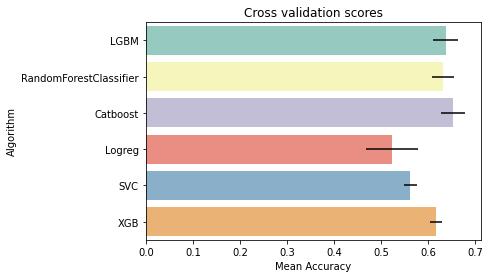

In [332]:
random_state = 42
kfold = StratifiedKFold(n_splits=5)
classifiers = []
classifiers.append(LGBMClassifier(random_state=random_state))
classifiers.append(RandomForestClassifier(max_features=3,random_state=random_state))
classifiers.append(CatBoostClassifier(random_state = random_state))
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(SVC(random_state = random_state))
classifiers.append(xgb.XGBClassifier(random_state = random_state))
cv_results = []
for classifier in classifiers :
    print(classifier)
    cv_results.append(cross_val_score(classifier, x_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

    
cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["LGBM","RandomForestClassifier","Catboost","Logreg","SVC","XGB"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [333]:
best_params_rf=gsRFC.best_params_
best_params_cb=gsCB.best_params_
best_params_lgbm=gsLGBM.best_params_
best_params_xgb=gsXGB.best_params_
print(best_params_rf)
print(best_params_cb)
print(best_params_lgbm)
print(best_params_xgb)

{'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 500, 'random_state': 42}
{'iterations': 1000, 'loss_function': 'CrossEntropy', 'random_state': 42}
{'boosting_type': 'gbdt', 'colsample_bytree': 0.64, 'learning_rate': 0.01, 'max_bin': 255, 'n_estimators': 500, 'num_leaves': 12, 'objective': 'binary', 'random_state': 42, 'reg_alpha': 1.2, 'reg_lambda': 1.5, 'subsample': 0.7}
{'colsample_bytree': 1.0, 'gamma': 5, 'learning_rate': 0.01, 'max_depth': 8, 'min_child_weight': 1, 'n_estimators': 500, 'random_state': 42, 'subsample': 1.0}


In [334]:
NFOLDS = 10
rs=42
kf = StratifiedKFold(n_splits= NFOLDS)
RFC = RandomForestClassifier()
rf_param_grid = {"max_depth": [None],"max_features": [3], "min_samples_split": [10], "min_samples_leaf": [ 3],
                "bootstrap": [False],
                "n_estimators" :[500],
                "criterion": ["gini"],
                'random_state':[rs]}
gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kf.split(x_train,y_train), scoring="accuracy", n_jobs= 4, verbose = 1)
gsRFC.fit(x_train,y_train)
RFC_best = gsRFC.best_estimator_
print("RF",gsRFC.best_score_)

clf = CatBoostClassifier()
params = {'iterations': [1000],
            'loss_function': ['CrossEntropy'],
         'random_state':[rs]}
gsCB = GridSearchCV(estimator=clf, param_grid=params, scoring="accuracy", cv=kf.split(x_train,y_train))
gsCB.fit(x_train,y_train)
CB_best = gsCB.best_estimator_
print('CB',gsCB.best_score_)

lgbm=LGBMClassifier()
gridParams = {
    'learning_rate': [0.01],
    'n_estimators': [500],
    'num_leaves': [12], # large num_leaves helps improve accuracy but might lead to over-fitting
    'boosting_type' : ['gbdt'], # for better accuracy -> try dart
    'objective' : ['binary'],
    'max_bin':[255], # large max_bin helps improve accuracy but might slow down training progress
    'colsample_bytree' : [0.64],
    'subsample' : [0.7],
    'reg_alpha' : [1.2],
    'reg_lambda' : [1.5],
    'random_state':[rs]
    }

gsLGBM = GridSearchCV(lgbm, gridParams, verbose=1, cv=kf.split(x_train,y_train), n_jobs=-1,scoring="accuracy")
# Run the grid
gsLGBM.fit(x_train,y_train)
LGBM_best = gsLGBM.best_estimator_
print('LGBM',gsLGBM.best_score_)
params = {
        'max_depth': [8,12],
        'n_estimators': [500,1000],
        'min_child_weight': [1],
        'gamma': [5],
        'subsample': [1.0],
        'colsample_bytree': [1.0],
        'learning_rate': [0.01],
        'random_state':[rs]
        }
xgboost = xgb.XGBClassifier()
gsXGB = GridSearchCV(xgboost, params, verbose=1, cv=kf.split(x_train,y_train), n_jobs=-1,scoring="accuracy")
# Run the grid
gsXGB.fit(x_train,y_train)
XGB_best = gsXGB.best_estimator_
print('XGB',gsXGB.best_score_)


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    5.7s finished


RF 0.6343391902215433
0:	learn: 0.6887329	total: 4.09ms	remaining: 4.08s
1:	learn: 0.6836539	total: 7.31ms	remaining: 3.65s
2:	learn: 0.6802947	total: 9.97ms	remaining: 3.31s
3:	learn: 0.6768266	total: 11.8ms	remaining: 2.93s
4:	learn: 0.6725019	total: 13.5ms	remaining: 2.69s
5:	learn: 0.6681069	total: 15.3ms	remaining: 2.53s
6:	learn: 0.6641953	total: 17ms	remaining: 2.42s
7:	learn: 0.6606279	total: 18.7ms	remaining: 2.32s
8:	learn: 0.6564454	total: 20.5ms	remaining: 2.25s
9:	learn: 0.6535697	total: 22.2ms	remaining: 2.19s
10:	learn: 0.6505807	total: 23.8ms	remaining: 2.14s
11:	learn: 0.6477376	total: 25.5ms	remaining: 2.1s
12:	learn: 0.6450586	total: 27.2ms	remaining: 2.06s
13:	learn: 0.6414748	total: 28.8ms	remaining: 2.03s
14:	learn: 0.6387554	total: 31.3ms	remaining: 2.05s
15:	learn: 0.6355021	total: 33.4ms	remaining: 2.05s
16:	learn: 0.6325285	total: 35.3ms	remaining: 2.04s
17:	learn: 0.6299070	total: 37.2ms	remaining: 2.03s
18:	learn: 0.6275129	total: 39.2ms	remaining: 2.02s
19:

160:	learn: 0.4664140	total: 310ms	remaining: 1.61s
161:	learn: 0.4653039	total: 313ms	remaining: 1.62s
162:	learn: 0.4645474	total: 315ms	remaining: 1.62s
163:	learn: 0.4638652	total: 317ms	remaining: 1.62s
164:	learn: 0.4629561	total: 320ms	remaining: 1.62s
165:	learn: 0.4615979	total: 322ms	remaining: 1.62s
166:	learn: 0.4610926	total: 325ms	remaining: 1.62s
167:	learn: 0.4606318	total: 327ms	remaining: 1.62s
168:	learn: 0.4597700	total: 329ms	remaining: 1.62s
169:	learn: 0.4586679	total: 332ms	remaining: 1.62s
170:	learn: 0.4575580	total: 335ms	remaining: 1.62s
171:	learn: 0.4569692	total: 337ms	remaining: 1.62s
172:	learn: 0.4564553	total: 345ms	remaining: 1.65s
173:	learn: 0.4556353	total: 347ms	remaining: 1.65s
174:	learn: 0.4545882	total: 349ms	remaining: 1.65s
175:	learn: 0.4539287	total: 351ms	remaining: 1.64s
176:	learn: 0.4531420	total: 357ms	remaining: 1.66s
177:	learn: 0.4527199	total: 360ms	remaining: 1.66s
178:	learn: 0.4523286	total: 362ms	remaining: 1.66s
179:	learn: 

353:	learn: 0.3433942	total: 695ms	remaining: 1.27s
354:	learn: 0.3428896	total: 704ms	remaining: 1.28s
355:	learn: 0.3417701	total: 706ms	remaining: 1.28s
356:	learn: 0.3414026	total: 708ms	remaining: 1.27s
357:	learn: 0.3412912	total: 711ms	remaining: 1.27s
358:	learn: 0.3409901	total: 713ms	remaining: 1.27s
359:	learn: 0.3404056	total: 715ms	remaining: 1.27s
360:	learn: 0.3395871	total: 717ms	remaining: 1.27s
361:	learn: 0.3386804	total: 718ms	remaining: 1.27s
362:	learn: 0.3379761	total: 720ms	remaining: 1.26s
363:	learn: 0.3375286	total: 722ms	remaining: 1.26s
364:	learn: 0.3370157	total: 723ms	remaining: 1.26s
365:	learn: 0.3366156	total: 725ms	remaining: 1.26s
366:	learn: 0.3357671	total: 727ms	remaining: 1.25s
367:	learn: 0.3352377	total: 729ms	remaining: 1.25s
368:	learn: 0.3345992	total: 730ms	remaining: 1.25s
369:	learn: 0.3341810	total: 732ms	remaining: 1.25s
370:	learn: 0.3334123	total: 734ms	remaining: 1.24s
371:	learn: 0.3327008	total: 735ms	remaining: 1.24s
372:	learn: 

553:	learn: 0.2372548	total: 1.08s	remaining: 870ms
554:	learn: 0.2368394	total: 1.08s	remaining: 868ms
555:	learn: 0.2365859	total: 1.08s	remaining: 867ms
556:	learn: 0.2363033	total: 1.09s	remaining: 865ms
557:	learn: 0.2360553	total: 1.09s	remaining: 864ms
558:	learn: 0.2354970	total: 1.09s	remaining: 862ms
559:	learn: 0.2354444	total: 1.09s	remaining: 861ms
560:	learn: 0.2351560	total: 1.1s	remaining: 860ms
561:	learn: 0.2345893	total: 1.1s	remaining: 858ms
562:	learn: 0.2341868	total: 1.1s	remaining: 856ms
563:	learn: 0.2334782	total: 1.1s	remaining: 854ms
564:	learn: 0.2334296	total: 1.11s	remaining: 852ms
565:	learn: 0.2329292	total: 1.11s	remaining: 850ms
566:	learn: 0.2325505	total: 1.11s	remaining: 848ms
567:	learn: 0.2320064	total: 1.11s	remaining: 846ms
568:	learn: 0.2316287	total: 1.11s	remaining: 844ms
569:	learn: 0.2313463	total: 1.12s	remaining: 842ms
570:	learn: 0.2313071	total: 1.12s	remaining: 840ms
571:	learn: 0.2308161	total: 1.12s	remaining: 838ms
572:	learn: 0.23

756:	learn: 0.1649851	total: 1.46s	remaining: 470ms
757:	learn: 0.1646770	total: 1.47s	remaining: 469ms
758:	learn: 0.1645556	total: 1.47s	remaining: 467ms
759:	learn: 0.1641074	total: 1.47s	remaining: 465ms
760:	learn: 0.1635649	total: 1.48s	remaining: 463ms
761:	learn: 0.1632891	total: 1.48s	remaining: 462ms
762:	learn: 0.1631997	total: 1.48s	remaining: 460ms
763:	learn: 0.1629202	total: 1.48s	remaining: 458ms
764:	learn: 0.1625921	total: 1.48s	remaining: 456ms
765:	learn: 0.1623452	total: 1.49s	remaining: 454ms
766:	learn: 0.1621376	total: 1.49s	remaining: 452ms
767:	learn: 0.1619962	total: 1.49s	remaining: 450ms
768:	learn: 0.1619521	total: 1.49s	remaining: 448ms
769:	learn: 0.1614108	total: 1.49s	remaining: 446ms
770:	learn: 0.1611422	total: 1.5s	remaining: 444ms
771:	learn: 0.1608272	total: 1.5s	remaining: 442ms
772:	learn: 0.1606186	total: 1.5s	remaining: 440ms
773:	learn: 0.1602517	total: 1.5s	remaining: 438ms
774:	learn: 0.1599741	total: 1.5s	remaining: 436ms
775:	learn: 0.159

961:	learn: 0.1195134	total: 1.85s	remaining: 73.1ms
962:	learn: 0.1191799	total: 1.85s	remaining: 71.3ms
963:	learn: 0.1189964	total: 1.86s	remaining: 69.4ms
964:	learn: 0.1188415	total: 1.86s	remaining: 67.5ms
965:	learn: 0.1186110	total: 1.86s	remaining: 65.5ms
966:	learn: 0.1184631	total: 1.86s	remaining: 63.6ms
967:	learn: 0.1183530	total: 1.87s	remaining: 61.8ms
968:	learn: 0.1180223	total: 1.87s	remaining: 59.9ms
969:	learn: 0.1177549	total: 1.87s	remaining: 57.9ms
970:	learn: 0.1175996	total: 1.87s	remaining: 56ms
971:	learn: 0.1174364	total: 1.88s	remaining: 54.1ms
972:	learn: 0.1172927	total: 1.88s	remaining: 52.1ms
973:	learn: 0.1171110	total: 1.88s	remaining: 50.2ms
974:	learn: 0.1169591	total: 1.88s	remaining: 48.3ms
975:	learn: 0.1167174	total: 1.88s	remaining: 46.3ms
976:	learn: 0.1166299	total: 1.89s	remaining: 44.4ms
977:	learn: 0.1165447	total: 1.89s	remaining: 42.4ms
978:	learn: 0.1165077	total: 1.89s	remaining: 40.5ms
979:	learn: 0.1163441	total: 1.89s	remaining: 38

158:	learn: 0.4667921	total: 385ms	remaining: 2.04s
159:	learn: 0.4661418	total: 387ms	remaining: 2.03s
160:	learn: 0.4657013	total: 390ms	remaining: 2.03s
161:	learn: 0.4647793	total: 392ms	remaining: 2.03s
162:	learn: 0.4642730	total: 394ms	remaining: 2.02s
163:	learn: 0.4638678	total: 397ms	remaining: 2.02s
164:	learn: 0.4633921	total: 399ms	remaining: 2.02s
165:	learn: 0.4623282	total: 403ms	remaining: 2.02s
166:	learn: 0.4615658	total: 406ms	remaining: 2.02s
167:	learn: 0.4605057	total: 408ms	remaining: 2.02s
168:	learn: 0.4601389	total: 410ms	remaining: 2.01s
169:	learn: 0.4596062	total: 411ms	remaining: 2.01s
170:	learn: 0.4588591	total: 413ms	remaining: 2s
171:	learn: 0.4577235	total: 415ms	remaining: 2s
172:	learn: 0.4573774	total: 416ms	remaining: 1.99s
173:	learn: 0.4568230	total: 418ms	remaining: 1.99s
174:	learn: 0.4557577	total: 420ms	remaining: 1.98s
175:	learn: 0.4551050	total: 422ms	remaining: 1.98s
176:	learn: 0.4543413	total: 424ms	remaining: 1.97s
177:	learn: 0.4536

353:	learn: 0.3404168	total: 768ms	remaining: 1.4s
354:	learn: 0.3397448	total: 771ms	remaining: 1.4s
355:	learn: 0.3392778	total: 774ms	remaining: 1.4s
356:	learn: 0.3390421	total: 776ms	remaining: 1.4s
357:	learn: 0.3387236	total: 779ms	remaining: 1.4s
358:	learn: 0.3377688	total: 781ms	remaining: 1.4s
359:	learn: 0.3369875	total: 785ms	remaining: 1.4s
360:	learn: 0.3363946	total: 788ms	remaining: 1.39s
361:	learn: 0.3357921	total: 799ms	remaining: 1.41s
362:	learn: 0.3352144	total: 807ms	remaining: 1.42s
363:	learn: 0.3346492	total: 809ms	remaining: 1.41s
364:	learn: 0.3339515	total: 814ms	remaining: 1.42s
365:	learn: 0.3334776	total: 819ms	remaining: 1.42s
366:	learn: 0.3328511	total: 823ms	remaining: 1.42s
367:	learn: 0.3319052	total: 824ms	remaining: 1.42s
368:	learn: 0.3306946	total: 826ms	remaining: 1.41s
369:	learn: 0.3300592	total: 830ms	remaining: 1.41s
370:	learn: 0.3289565	total: 832ms	remaining: 1.41s
371:	learn: 0.3283416	total: 837ms	remaining: 1.41s
372:	learn: 0.32772

552:	learn: 0.2306947	total: 1.35s	remaining: 1.09s
553:	learn: 0.2301901	total: 1.36s	remaining: 1.09s
554:	learn: 0.2298039	total: 1.36s	remaining: 1.09s
555:	learn: 0.2296714	total: 1.36s	remaining: 1.09s
556:	learn: 0.2292474	total: 1.36s	remaining: 1.08s
557:	learn: 0.2287818	total: 1.37s	remaining: 1.08s
558:	learn: 0.2283586	total: 1.37s	remaining: 1.08s
559:	learn: 0.2279695	total: 1.37s	remaining: 1.08s
560:	learn: 0.2275114	total: 1.38s	remaining: 1.08s
561:	learn: 0.2272601	total: 1.38s	remaining: 1.07s
562:	learn: 0.2266809	total: 1.38s	remaining: 1.07s
563:	learn: 0.2264043	total: 1.39s	remaining: 1.07s
564:	learn: 0.2256916	total: 1.39s	remaining: 1.07s
565:	learn: 0.2251561	total: 1.39s	remaining: 1.06s
566:	learn: 0.2247883	total: 1.39s	remaining: 1.06s
567:	learn: 0.2245212	total: 1.39s	remaining: 1.06s
568:	learn: 0.2239287	total: 1.39s	remaining: 1.06s
569:	learn: 0.2236694	total: 1.4s	remaining: 1.05s
570:	learn: 0.2231920	total: 1.4s	remaining: 1.05s
571:	learn: 0.

752:	learn: 0.1603595	total: 1.93s	remaining: 633ms
753:	learn: 0.1601486	total: 1.93s	remaining: 631ms
754:	learn: 0.1597993	total: 1.93s	remaining: 628ms
755:	learn: 0.1595076	total: 1.94s	remaining: 625ms
756:	learn: 0.1594193	total: 1.94s	remaining: 622ms
757:	learn: 0.1591794	total: 1.94s	remaining: 620ms
758:	learn: 0.1587278	total: 1.94s	remaining: 617ms
759:	learn: 0.1582840	total: 1.95s	remaining: 615ms
760:	learn: 0.1578842	total: 1.95s	remaining: 612ms
761:	learn: 0.1574882	total: 1.95s	remaining: 610ms
762:	learn: 0.1573615	total: 1.96s	remaining: 608ms
763:	learn: 0.1569860	total: 1.96s	remaining: 605ms
764:	learn: 0.1568146	total: 1.96s	remaining: 602ms
765:	learn: 0.1566657	total: 1.96s	remaining: 599ms
766:	learn: 0.1563845	total: 1.96s	remaining: 597ms
767:	learn: 0.1563442	total: 1.97s	remaining: 594ms
768:	learn: 0.1560127	total: 1.97s	remaining: 592ms
769:	learn: 0.1555462	total: 1.97s	remaining: 590ms
770:	learn: 0.1552651	total: 1.98s	remaining: 588ms
771:	learn: 

945:	learn: 0.1162721	total: 2.32s	remaining: 132ms
946:	learn: 0.1159988	total: 2.32s	remaining: 130ms
947:	learn: 0.1158630	total: 2.32s	remaining: 128ms
948:	learn: 0.1156552	total: 2.33s	remaining: 125ms
949:	learn: 0.1154145	total: 2.33s	remaining: 123ms
950:	learn: 0.1151869	total: 2.34s	remaining: 121ms
951:	learn: 0.1148990	total: 2.35s	remaining: 118ms
952:	learn: 0.1147659	total: 2.35s	remaining: 116ms
953:	learn: 0.1145858	total: 2.35s	remaining: 113ms
954:	learn: 0.1144191	total: 2.36s	remaining: 111ms
955:	learn: 0.1141887	total: 2.36s	remaining: 109ms
956:	learn: 0.1140693	total: 2.36s	remaining: 106ms
957:	learn: 0.1139262	total: 2.36s	remaining: 104ms
958:	learn: 0.1139053	total: 2.37s	remaining: 101ms
959:	learn: 0.1136400	total: 2.37s	remaining: 98.7ms
960:	learn: 0.1133781	total: 2.37s	remaining: 96.3ms
961:	learn: 0.1131579	total: 2.37s	remaining: 93.8ms
962:	learn: 0.1130780	total: 2.38s	remaining: 91.3ms
963:	learn: 0.1128979	total: 2.38s	remaining: 88.9ms
964:	le

165:	learn: 0.4650899	total: 389ms	remaining: 1.95s
166:	learn: 0.4638597	total: 392ms	remaining: 1.95s
167:	learn: 0.4634763	total: 394ms	remaining: 1.95s
168:	learn: 0.4631231	total: 396ms	remaining: 1.95s
169:	learn: 0.4621386	total: 399ms	remaining: 1.95s
170:	learn: 0.4617676	total: 401ms	remaining: 1.94s
171:	learn: 0.4612478	total: 403ms	remaining: 1.94s
172:	learn: 0.4607467	total: 409ms	remaining: 1.95s
173:	learn: 0.4597145	total: 412ms	remaining: 1.95s
174:	learn: 0.4588672	total: 420ms	remaining: 1.98s
175:	learn: 0.4582131	total: 422ms	remaining: 1.97s
176:	learn: 0.4575612	total: 424ms	remaining: 1.97s
177:	learn: 0.4571111	total: 427ms	remaining: 1.97s
178:	learn: 0.4563624	total: 429ms	remaining: 1.97s
179:	learn: 0.4557306	total: 431ms	remaining: 1.97s
180:	learn: 0.4552159	total: 433ms	remaining: 1.96s
181:	learn: 0.4544191	total: 435ms	remaining: 1.95s
182:	learn: 0.4538221	total: 436ms	remaining: 1.95s
183:	learn: 0.4533707	total: 438ms	remaining: 1.94s
184:	learn: 

341:	learn: 0.3489272	total: 780ms	remaining: 1.5s
342:	learn: 0.3483155	total: 793ms	remaining: 1.52s
343:	learn: 0.3478041	total: 796ms	remaining: 1.52s
344:	learn: 0.3473243	total: 798ms	remaining: 1.51s
345:	learn: 0.3466065	total: 802ms	remaining: 1.51s
346:	learn: 0.3460305	total: 805ms	remaining: 1.51s
347:	learn: 0.3454785	total: 807ms	remaining: 1.51s
348:	learn: 0.3450003	total: 810ms	remaining: 1.51s
349:	learn: 0.3439462	total: 816ms	remaining: 1.51s
350:	learn: 0.3431925	total: 817ms	remaining: 1.51s
351:	learn: 0.3428744	total: 824ms	remaining: 1.52s
352:	learn: 0.3425301	total: 829ms	remaining: 1.52s
353:	learn: 0.3417181	total: 831ms	remaining: 1.52s
354:	learn: 0.3410198	total: 833ms	remaining: 1.51s
355:	learn: 0.3405342	total: 834ms	remaining: 1.51s
356:	learn: 0.3397406	total: 838ms	remaining: 1.51s
357:	learn: 0.3393424	total: 840ms	remaining: 1.51s
358:	learn: 0.3391847	total: 842ms	remaining: 1.5s
359:	learn: 0.3384502	total: 844ms	remaining: 1.5s
360:	learn: 0.3

526:	learn: 0.2463619	total: 1.17s	remaining: 1.05s
527:	learn: 0.2458603	total: 1.17s	remaining: 1.05s
528:	learn: 0.2452884	total: 1.17s	remaining: 1.05s
529:	learn: 0.2450903	total: 1.18s	remaining: 1.04s
530:	learn: 0.2448080	total: 1.18s	remaining: 1.04s
531:	learn: 0.2443968	total: 1.19s	remaining: 1.04s
532:	learn: 0.2439413	total: 1.19s	remaining: 1.04s
533:	learn: 0.2438532	total: 1.19s	remaining: 1.04s
534:	learn: 0.2437680	total: 1.19s	remaining: 1.03s
535:	learn: 0.2431597	total: 1.19s	remaining: 1.03s
536:	learn: 0.2427075	total: 1.2s	remaining: 1.03s
537:	learn: 0.2424573	total: 1.2s	remaining: 1.03s
538:	learn: 0.2421357	total: 1.2s	remaining: 1.02s
539:	learn: 0.2417611	total: 1.2s	remaining: 1.02s
540:	learn: 0.2413346	total: 1.2s	remaining: 1.02s
541:	learn: 0.2408975	total: 1.21s	remaining: 1.02s
542:	learn: 0.2404005	total: 1.21s	remaining: 1.01s
543:	learn: 0.2403296	total: 1.21s	remaining: 1.01s
544:	learn: 0.2397923	total: 1.21s	remaining: 1.01s
545:	learn: 0.239

723:	learn: 0.1720564	total: 1.55s	remaining: 592ms
724:	learn: 0.1717406	total: 1.56s	remaining: 590ms
725:	learn: 0.1714525	total: 1.56s	remaining: 588ms
726:	learn: 0.1709535	total: 1.56s	remaining: 586ms
727:	learn: 0.1706504	total: 1.56s	remaining: 584ms
728:	learn: 0.1703290	total: 1.56s	remaining: 582ms
729:	learn: 0.1702175	total: 1.57s	remaining: 580ms
730:	learn: 0.1700233	total: 1.57s	remaining: 578ms
731:	learn: 0.1696998	total: 1.57s	remaining: 576ms
732:	learn: 0.1693111	total: 1.57s	remaining: 574ms
733:	learn: 0.1690373	total: 1.58s	remaining: 572ms
734:	learn: 0.1686748	total: 1.58s	remaining: 569ms
735:	learn: 0.1683925	total: 1.58s	remaining: 567ms
736:	learn: 0.1680438	total: 1.58s	remaining: 565ms
737:	learn: 0.1677551	total: 1.59s	remaining: 564ms
738:	learn: 0.1673596	total: 1.59s	remaining: 561ms
739:	learn: 0.1670731	total: 1.59s	remaining: 560ms
740:	learn: 0.1666741	total: 1.59s	remaining: 558ms
741:	learn: 0.1662814	total: 1.6s	remaining: 556ms
742:	learn: 0

944:	learn: 0.1178159	total: 2.13s	remaining: 124ms
945:	learn: 0.1177212	total: 2.13s	remaining: 122ms
946:	learn: 0.1176157	total: 2.14s	remaining: 120ms
947:	learn: 0.1172706	total: 2.14s	remaining: 117ms
948:	learn: 0.1171458	total: 2.14s	remaining: 115ms
949:	learn: 0.1169220	total: 2.15s	remaining: 113ms
950:	learn: 0.1166430	total: 2.15s	remaining: 111ms
951:	learn: 0.1163515	total: 2.15s	remaining: 108ms
952:	learn: 0.1160870	total: 2.15s	remaining: 106ms
953:	learn: 0.1158044	total: 2.15s	remaining: 104ms
954:	learn: 0.1155605	total: 2.16s	remaining: 102ms
955:	learn: 0.1153923	total: 2.16s	remaining: 99.4ms
956:	learn: 0.1152653	total: 2.16s	remaining: 97.1ms
957:	learn: 0.1150528	total: 2.16s	remaining: 94.9ms
958:	learn: 0.1149239	total: 2.17s	remaining: 92.6ms
959:	learn: 0.1149091	total: 2.17s	remaining: 90.4ms
960:	learn: 0.1148387	total: 2.17s	remaining: 88.1ms
961:	learn: 0.1147299	total: 2.17s	remaining: 85.8ms
962:	learn: 0.1145368	total: 2.17s	remaining: 83.6ms
963:

135:	learn: 0.4909851	total: 394ms	remaining: 2.5s
136:	learn: 0.4900823	total: 395ms	remaining: 2.49s
137:	learn: 0.4892824	total: 397ms	remaining: 2.48s
138:	learn: 0.4884868	total: 399ms	remaining: 2.47s
139:	learn: 0.4874269	total: 407ms	remaining: 2.5s
140:	learn: 0.4868549	total: 410ms	remaining: 2.5s
141:	learn: 0.4864118	total: 413ms	remaining: 2.5s
142:	learn: 0.4856991	total: 416ms	remaining: 2.49s
143:	learn: 0.4853489	total: 418ms	remaining: 2.49s
144:	learn: 0.4845905	total: 420ms	remaining: 2.48s
145:	learn: 0.4840076	total: 422ms	remaining: 2.47s
146:	learn: 0.4832527	total: 424ms	remaining: 2.46s
147:	learn: 0.4823223	total: 426ms	remaining: 2.45s
148:	learn: 0.4815616	total: 427ms	remaining: 2.44s
149:	learn: 0.4804150	total: 429ms	remaining: 2.43s
150:	learn: 0.4795959	total: 432ms	remaining: 2.43s
151:	learn: 0.4786916	total: 434ms	remaining: 2.42s
152:	learn: 0.4782822	total: 436ms	remaining: 2.41s
153:	learn: 0.4780018	total: 437ms	remaining: 2.4s
154:	learn: 0.477

331:	learn: 0.3624498	total: 776ms	remaining: 1.56s
332:	learn: 0.3613285	total: 790ms	remaining: 1.58s
333:	learn: 0.3609934	total: 793ms	remaining: 1.58s
334:	learn: 0.3604729	total: 795ms	remaining: 1.58s
335:	learn: 0.3591615	total: 797ms	remaining: 1.57s
336:	learn: 0.3583815	total: 799ms	remaining: 1.57s
337:	learn: 0.3575701	total: 801ms	remaining: 1.57s
338:	learn: 0.3570480	total: 802ms	remaining: 1.56s
339:	learn: 0.3565211	total: 804ms	remaining: 1.56s
340:	learn: 0.3558162	total: 806ms	remaining: 1.56s
341:	learn: 0.3550710	total: 807ms	remaining: 1.55s
342:	learn: 0.3544892	total: 809ms	remaining: 1.55s
343:	learn: 0.3542218	total: 811ms	remaining: 1.55s
344:	learn: 0.3538976	total: 813ms	remaining: 1.54s
345:	learn: 0.3535491	total: 814ms	remaining: 1.54s
346:	learn: 0.3528685	total: 816ms	remaining: 1.53s
347:	learn: 0.3525393	total: 818ms	remaining: 1.53s
348:	learn: 0.3522180	total: 820ms	remaining: 1.53s
349:	learn: 0.3510975	total: 821ms	remaining: 1.52s
350:	learn: 

511:	learn: 0.2561368	total: 1.16s	remaining: 1.1s
512:	learn: 0.2557726	total: 1.16s	remaining: 1.1s
513:	learn: 0.2548686	total: 1.17s	remaining: 1.1s
514:	learn: 0.2544720	total: 1.17s	remaining: 1.1s
515:	learn: 0.2539377	total: 1.17s	remaining: 1.09s
516:	learn: 0.2538614	total: 1.17s	remaining: 1.09s
517:	learn: 0.2532259	total: 1.18s	remaining: 1.09s
518:	learn: 0.2527533	total: 1.18s	remaining: 1.09s
519:	learn: 0.2524012	total: 1.18s	remaining: 1.09s
520:	learn: 0.2518032	total: 1.18s	remaining: 1.09s
521:	learn: 0.2517338	total: 1.19s	remaining: 1.08s
522:	learn: 0.2511612	total: 1.19s	remaining: 1.08s
523:	learn: 0.2503601	total: 1.19s	remaining: 1.08s
524:	learn: 0.2493961	total: 1.19s	remaining: 1.08s
525:	learn: 0.2486326	total: 1.2s	remaining: 1.08s
526:	learn: 0.2483523	total: 1.2s	remaining: 1.07s
527:	learn: 0.2478309	total: 1.2s	remaining: 1.07s
528:	learn: 0.2470974	total: 1.2s	remaining: 1.07s
529:	learn: 0.2465973	total: 1.21s	remaining: 1.07s
530:	learn: 0.246215

694:	learn: 0.1831982	total: 1.54s	remaining: 678ms
695:	learn: 0.1828357	total: 1.55s	remaining: 676ms
696:	learn: 0.1826802	total: 1.55s	remaining: 673ms
697:	learn: 0.1823348	total: 1.55s	remaining: 671ms
698:	learn: 0.1819938	total: 1.55s	remaining: 669ms
699:	learn: 0.1814426	total: 1.56s	remaining: 667ms
700:	learn: 0.1810151	total: 1.56s	remaining: 665ms
701:	learn: 0.1806433	total: 1.56s	remaining: 663ms
702:	learn: 0.1802243	total: 1.56s	remaining: 660ms
703:	learn: 0.1800171	total: 1.56s	remaining: 658ms
704:	learn: 0.1796887	total: 1.57s	remaining: 656ms
705:	learn: 0.1794398	total: 1.57s	remaining: 654ms
706:	learn: 0.1792519	total: 1.57s	remaining: 651ms
707:	learn: 0.1790644	total: 1.57s	remaining: 649ms
708:	learn: 0.1788408	total: 1.57s	remaining: 647ms
709:	learn: 0.1785284	total: 1.58s	remaining: 644ms
710:	learn: 0.1781167	total: 1.58s	remaining: 642ms
711:	learn: 0.1778795	total: 1.58s	remaining: 640ms
712:	learn: 0.1777303	total: 1.58s	remaining: 637ms
713:	learn: 

853:	learn: 0.1386652	total: 1.93s	remaining: 330ms
854:	learn: 0.1383949	total: 1.93s	remaining: 328ms
855:	learn: 0.1381740	total: 1.93s	remaining: 325ms
856:	learn: 0.1379284	total: 1.94s	remaining: 323ms
857:	learn: 0.1377328	total: 1.94s	remaining: 321ms
858:	learn: 0.1375247	total: 1.94s	remaining: 319ms
859:	learn: 0.1373226	total: 1.95s	remaining: 317ms
860:	learn: 0.1371367	total: 1.95s	remaining: 315ms
861:	learn: 0.1368938	total: 1.95s	remaining: 313ms
862:	learn: 0.1366927	total: 1.96s	remaining: 310ms
863:	learn: 0.1365361	total: 1.96s	remaining: 308ms
864:	learn: 0.1363331	total: 1.96s	remaining: 306ms
865:	learn: 0.1361836	total: 1.96s	remaining: 304ms
866:	learn: 0.1358495	total: 1.96s	remaining: 301ms
867:	learn: 0.1355363	total: 1.97s	remaining: 299ms
868:	learn: 0.1354192	total: 1.97s	remaining: 296ms
869:	learn: 0.1351184	total: 1.97s	remaining: 294ms
870:	learn: 0.1348242	total: 1.97s	remaining: 292ms
871:	learn: 0.1348005	total: 1.97s	remaining: 290ms
872:	learn: 

53:	learn: 0.5734679	total: 197ms	remaining: 3.44s
54:	learn: 0.5722193	total: 199ms	remaining: 3.42s
55:	learn: 0.5713389	total: 201ms	remaining: 3.39s
56:	learn: 0.5706043	total: 203ms	remaining: 3.36s
57:	learn: 0.5693479	total: 205ms	remaining: 3.33s
58:	learn: 0.5677541	total: 208ms	remaining: 3.32s
59:	learn: 0.5665432	total: 210ms	remaining: 3.3s
60:	learn: 0.5660606	total: 213ms	remaining: 3.27s
61:	learn: 0.5652106	total: 215ms	remaining: 3.25s
62:	learn: 0.5642607	total: 217ms	remaining: 3.23s
63:	learn: 0.5628417	total: 219ms	remaining: 3.21s
64:	learn: 0.5616274	total: 222ms	remaining: 3.2s
65:	learn: 0.5600804	total: 228ms	remaining: 3.22s
66:	learn: 0.5581249	total: 230ms	remaining: 3.2s
67:	learn: 0.5564669	total: 231ms	remaining: 3.17s
68:	learn: 0.5554194	total: 233ms	remaining: 3.14s
69:	learn: 0.5546973	total: 235ms	remaining: 3.12s
70:	learn: 0.5532677	total: 237ms	remaining: 3.09s
71:	learn: 0.5520416	total: 238ms	remaining: 3.07s
72:	learn: 0.5505014	total: 241ms	

243:	learn: 0.4180077	total: 579ms	remaining: 1.79s
244:	learn: 0.4169980	total: 581ms	remaining: 1.79s
245:	learn: 0.4167487	total: 583ms	remaining: 1.79s
246:	learn: 0.4160217	total: 586ms	remaining: 1.78s
247:	learn: 0.4150695	total: 588ms	remaining: 1.78s
248:	learn: 0.4144681	total: 590ms	remaining: 1.78s
249:	learn: 0.4139439	total: 592ms	remaining: 1.78s
250:	learn: 0.4136025	total: 595ms	remaining: 1.77s
251:	learn: 0.4129058	total: 597ms	remaining: 1.77s
252:	learn: 0.4125102	total: 601ms	remaining: 1.77s
253:	learn: 0.4116110	total: 603ms	remaining: 1.77s
254:	learn: 0.4107593	total: 605ms	remaining: 1.77s
255:	learn: 0.4100434	total: 606ms	remaining: 1.76s
256:	learn: 0.4094061	total: 608ms	remaining: 1.76s
257:	learn: 0.4089776	total: 610ms	remaining: 1.75s
258:	learn: 0.4078351	total: 611ms	remaining: 1.75s
259:	learn: 0.4071833	total: 613ms	remaining: 1.75s
260:	learn: 0.4065024	total: 615ms	remaining: 1.74s
261:	learn: 0.4058130	total: 617ms	remaining: 1.74s
262:	learn: 

438:	learn: 0.2937024	total: 962ms	remaining: 1.23s
439:	learn: 0.2928820	total: 971ms	remaining: 1.24s
440:	learn: 0.2923563	total: 973ms	remaining: 1.23s
441:	learn: 0.2922757	total: 975ms	remaining: 1.23s
442:	learn: 0.2916736	total: 978ms	remaining: 1.23s
443:	learn: 0.2909594	total: 981ms	remaining: 1.23s
444:	learn: 0.2903442	total: 983ms	remaining: 1.23s
445:	learn: 0.2895456	total: 985ms	remaining: 1.22s
446:	learn: 0.2890161	total: 987ms	remaining: 1.22s
447:	learn: 0.2886008	total: 988ms	remaining: 1.22s
448:	learn: 0.2879821	total: 990ms	remaining: 1.22s
449:	learn: 0.2879626	total: 994ms	remaining: 1.22s
450:	learn: 0.2875337	total: 996ms	remaining: 1.21s
451:	learn: 0.2864077	total: 998ms	remaining: 1.21s
452:	learn: 0.2855404	total: 999ms	remaining: 1.21s
453:	learn: 0.2851818	total: 1s	remaining: 1.2s
454:	learn: 0.2844767	total: 1s	remaining: 1.2s
455:	learn: 0.2838769	total: 1s	remaining: 1.2s
456:	learn: 0.2829963	total: 1.01s	remaining: 1.2s
457:	learn: 0.2819444	tot

628:	learn: 0.2060877	total: 1.35s	remaining: 795ms
629:	learn: 0.2057024	total: 1.35s	remaining: 793ms
630:	learn: 0.2051766	total: 1.35s	remaining: 790ms
631:	learn: 0.2048111	total: 1.35s	remaining: 788ms
632:	learn: 0.2044034	total: 1.36s	remaining: 789ms
633:	learn: 0.2040443	total: 1.36s	remaining: 787ms
634:	learn: 0.2035417	total: 1.36s	remaining: 785ms
635:	learn: 0.2030934	total: 1.37s	remaining: 783ms
636:	learn: 0.2027005	total: 1.37s	remaining: 782ms
637:	learn: 0.2023137	total: 1.37s	remaining: 780ms
638:	learn: 0.2019740	total: 1.38s	remaining: 779ms
639:	learn: 0.2016187	total: 1.38s	remaining: 777ms
640:	learn: 0.2012678	total: 1.38s	remaining: 775ms
641:	learn: 0.2010935	total: 1.39s	remaining: 777ms
642:	learn: 0.2009531	total: 1.4s	remaining: 775ms
643:	learn: 0.2008183	total: 1.4s	remaining: 774ms
644:	learn: 0.2005424	total: 1.41s	remaining: 776ms
645:	learn: 0.2002979	total: 1.41s	remaining: 774ms
646:	learn: 0.1998012	total: 1.41s	remaining: 772ms
647:	learn: 0.

789:	learn: 0.1535131	total: 1.73s	remaining: 461ms
790:	learn: 0.1531831	total: 1.74s	remaining: 459ms
791:	learn: 0.1528940	total: 1.74s	remaining: 457ms
792:	learn: 0.1525405	total: 1.74s	remaining: 455ms
793:	learn: 0.1522310	total: 1.75s	remaining: 453ms
794:	learn: 0.1519698	total: 1.75s	remaining: 452ms
795:	learn: 0.1516896	total: 1.75s	remaining: 450ms
796:	learn: 0.1515217	total: 1.76s	remaining: 448ms
797:	learn: 0.1512873	total: 1.76s	remaining: 446ms
798:	learn: 0.1510751	total: 1.77s	remaining: 445ms
799:	learn: 0.1508248	total: 1.77s	remaining: 443ms
800:	learn: 0.1505510	total: 1.77s	remaining: 441ms
801:	learn: 0.1502894	total: 1.77s	remaining: 438ms
802:	learn: 0.1500008	total: 1.78s	remaining: 436ms
803:	learn: 0.1497737	total: 1.78s	remaining: 434ms
804:	learn: 0.1494813	total: 1.78s	remaining: 432ms
805:	learn: 0.1490341	total: 1.78s	remaining: 429ms
806:	learn: 0.1488189	total: 1.79s	remaining: 427ms
807:	learn: 0.1485573	total: 1.79s	remaining: 425ms
808:	learn: 

971:	learn: 0.1143222	total: 2.12s	remaining: 61ms
972:	learn: 0.1142697	total: 2.13s	remaining: 59.1ms
973:	learn: 0.1140481	total: 2.13s	remaining: 56.9ms
974:	learn: 0.1138468	total: 2.13s	remaining: 54.7ms
975:	learn: 0.1137348	total: 2.14s	remaining: 52.5ms
976:	learn: 0.1135524	total: 2.14s	remaining: 50.3ms
977:	learn: 0.1133286	total: 2.14s	remaining: 48.1ms
978:	learn: 0.1131874	total: 2.14s	remaining: 45.9ms
979:	learn: 0.1130983	total: 2.14s	remaining: 43.7ms
980:	learn: 0.1129523	total: 2.14s	remaining: 41.5ms
981:	learn: 0.1127003	total: 2.15s	remaining: 39.3ms
982:	learn: 0.1125516	total: 2.15s	remaining: 37.2ms
983:	learn: 0.1124912	total: 2.15s	remaining: 35ms
984:	learn: 0.1123640	total: 2.15s	remaining: 32.8ms
985:	learn: 0.1122720	total: 2.15s	remaining: 30.6ms
986:	learn: 0.1121560	total: 2.15s	remaining: 28.4ms
987:	learn: 0.1120845	total: 2.16s	remaining: 26.2ms
988:	learn: 0.1118357	total: 2.16s	remaining: 24ms
989:	learn: 0.1117254	total: 2.16s	remaining: 21.8ms

182:	learn: 0.4511803	total: 390ms	remaining: 1.74s
183:	learn: 0.4501961	total: 392ms	remaining: 1.74s
184:	learn: 0.4499525	total: 396ms	remaining: 1.75s
185:	learn: 0.4496442	total: 399ms	remaining: 1.74s
186:	learn: 0.4490754	total: 401ms	remaining: 1.74s
187:	learn: 0.4483305	total: 403ms	remaining: 1.74s
188:	learn: 0.4472203	total: 406ms	remaining: 1.74s
189:	learn: 0.4470490	total: 408ms	remaining: 1.74s
190:	learn: 0.4466279	total: 410ms	remaining: 1.74s
191:	learn: 0.4456508	total: 413ms	remaining: 1.74s
192:	learn: 0.4449300	total: 415ms	remaining: 1.74s
193:	learn: 0.4443135	total: 419ms	remaining: 1.74s
194:	learn: 0.4433331	total: 421ms	remaining: 1.74s
195:	learn: 0.4428596	total: 423ms	remaining: 1.74s
196:	learn: 0.4423810	total: 425ms	remaining: 1.73s
197:	learn: 0.4416200	total: 426ms	remaining: 1.73s
198:	learn: 0.4407244	total: 428ms	remaining: 1.72s
199:	learn: 0.4401121	total: 430ms	remaining: 1.72s
200:	learn: 0.4395346	total: 431ms	remaining: 1.72s
201:	learn: 

372:	learn: 0.3273937	total: 773ms	remaining: 1.3s
373:	learn: 0.3264875	total: 779ms	remaining: 1.3s
374:	learn: 0.3259588	total: 782ms	remaining: 1.3s
375:	learn: 0.3250617	total: 784ms	remaining: 1.3s
376:	learn: 0.3249352	total: 787ms	remaining: 1.3s
377:	learn: 0.3243664	total: 789ms	remaining: 1.3s
378:	learn: 0.3233020	total: 793ms	remaining: 1.3s
379:	learn: 0.3223080	total: 795ms	remaining: 1.3s
380:	learn: 0.3216560	total: 797ms	remaining: 1.29s
381:	learn: 0.3208310	total: 799ms	remaining: 1.29s
382:	learn: 0.3201985	total: 802ms	remaining: 1.29s
383:	learn: 0.3191991	total: 803ms	remaining: 1.29s
384:	learn: 0.3187584	total: 805ms	remaining: 1.28s
385:	learn: 0.3181417	total: 807ms	remaining: 1.28s
386:	learn: 0.3174527	total: 808ms	remaining: 1.28s
387:	learn: 0.3167402	total: 810ms	remaining: 1.28s
388:	learn: 0.3160592	total: 812ms	remaining: 1.27s
389:	learn: 0.3151643	total: 814ms	remaining: 1.27s
390:	learn: 0.3147864	total: 815ms	remaining: 1.27s
391:	learn: 0.314127

570:	learn: 0.2186154	total: 1.16s	remaining: 869ms
571:	learn: 0.2183096	total: 1.16s	remaining: 870ms
572:	learn: 0.2176928	total: 1.17s	remaining: 869ms
573:	learn: 0.2173663	total: 1.17s	remaining: 867ms
574:	learn: 0.2170043	total: 1.17s	remaining: 865ms
575:	learn: 0.2164280	total: 1.17s	remaining: 863ms
576:	learn: 0.2161730	total: 1.18s	remaining: 862ms
577:	learn: 0.2160668	total: 1.18s	remaining: 861ms
578:	learn: 0.2157565	total: 1.19s	remaining: 862ms
579:	learn: 0.2152152	total: 1.19s	remaining: 860ms
580:	learn: 0.2146391	total: 1.19s	remaining: 858ms
581:	learn: 0.2140043	total: 1.19s	remaining: 856ms
582:	learn: 0.2135908	total: 1.2s	remaining: 855ms
583:	learn: 0.2131166	total: 1.2s	remaining: 854ms
584:	learn: 0.2127237	total: 1.2s	remaining: 851ms
585:	learn: 0.2125171	total: 1.21s	remaining: 852ms
586:	learn: 0.2121023	total: 1.21s	remaining: 851ms
587:	learn: 0.2117326	total: 1.21s	remaining: 850ms
588:	learn: 0.2115049	total: 1.22s	remaining: 848ms
589:	learn: 0.2

777:	learn: 0.1468968	total: 1.75s	remaining: 500ms
778:	learn: 0.1464877	total: 1.75s	remaining: 498ms
779:	learn: 0.1462903	total: 1.76s	remaining: 495ms
780:	learn: 0.1460966	total: 1.76s	remaining: 493ms
781:	learn: 0.1458769	total: 1.76s	remaining: 491ms
782:	learn: 0.1457595	total: 1.76s	remaining: 489ms
783:	learn: 0.1455192	total: 1.77s	remaining: 487ms
784:	learn: 0.1453621	total: 1.77s	remaining: 485ms
785:	learn: 0.1453111	total: 1.77s	remaining: 483ms
786:	learn: 0.1450527	total: 1.77s	remaining: 480ms
787:	learn: 0.1447331	total: 1.78s	remaining: 479ms
788:	learn: 0.1443587	total: 1.78s	remaining: 477ms
789:	learn: 0.1440697	total: 1.78s	remaining: 474ms
790:	learn: 0.1438618	total: 1.79s	remaining: 472ms
791:	learn: 0.1436483	total: 1.79s	remaining: 470ms
792:	learn: 0.1433828	total: 1.79s	remaining: 467ms
793:	learn: 0.1430737	total: 1.79s	remaining: 465ms
794:	learn: 0.1427652	total: 1.79s	remaining: 463ms
795:	learn: 0.1424924	total: 1.8s	remaining: 460ms
796:	learn: 0

963:	learn: 0.1087384	total: 2.14s	remaining: 79.9ms
964:	learn: 0.1085698	total: 2.14s	remaining: 77.7ms
965:	learn: 0.1084144	total: 2.14s	remaining: 75.4ms
966:	learn: 0.1083131	total: 2.15s	remaining: 73.2ms
967:	learn: 0.1082147	total: 2.15s	remaining: 71ms
968:	learn: 0.1081996	total: 2.15s	remaining: 68.7ms
969:	learn: 0.1079995	total: 2.15s	remaining: 66.5ms
970:	learn: 0.1078570	total: 2.15s	remaining: 64.3ms
971:	learn: 0.1076049	total: 2.16s	remaining: 62.2ms
972:	learn: 0.1075254	total: 2.16s	remaining: 60ms
973:	learn: 0.1073713	total: 2.17s	remaining: 57.8ms
974:	learn: 0.1071984	total: 2.17s	remaining: 55.6ms
975:	learn: 0.1070530	total: 2.17s	remaining: 53.4ms
976:	learn: 0.1067446	total: 2.17s	remaining: 51.2ms
977:	learn: 0.1063913	total: 2.17s	remaining: 48.9ms
978:	learn: 0.1062196	total: 2.18s	remaining: 46.7ms
979:	learn: 0.1061169	total: 2.18s	remaining: 44.5ms
980:	learn: 0.1058683	total: 2.18s	remaining: 42.2ms
981:	learn: 0.1057406	total: 2.18s	remaining: 40ms

178:	learn: 0.4541503	total: 389ms	remaining: 1.78s
179:	learn: 0.4528387	total: 391ms	remaining: 1.78s
180:	learn: 0.4523832	total: 393ms	remaining: 1.78s
181:	learn: 0.4514588	total: 395ms	remaining: 1.77s
182:	learn: 0.4509659	total: 397ms	remaining: 1.77s
183:	learn: 0.4505920	total: 400ms	remaining: 1.77s
184:	learn: 0.4500293	total: 403ms	remaining: 1.77s
185:	learn: 0.4494863	total: 405ms	remaining: 1.77s
186:	learn: 0.4484162	total: 407ms	remaining: 1.77s
187:	learn: 0.4477277	total: 410ms	remaining: 1.77s
188:	learn: 0.4472046	total: 412ms	remaining: 1.77s
189:	learn: 0.4462846	total: 414ms	remaining: 1.77s
190:	learn: 0.4457543	total: 417ms	remaining: 1.76s
191:	learn: 0.4448618	total: 419ms	remaining: 1.76s
192:	learn: 0.4440164	total: 421ms	remaining: 1.76s
193:	learn: 0.4435475	total: 424ms	remaining: 1.76s
194:	learn: 0.4425191	total: 426ms	remaining: 1.76s
195:	learn: 0.4420052	total: 429ms	remaining: 1.76s
196:	learn: 0.4414491	total: 431ms	remaining: 1.76s
197:	learn: 

355:	learn: 0.3403595	total: 770ms	remaining: 1.39s
356:	learn: 0.3396090	total: 777ms	remaining: 1.4s
357:	learn: 0.3388987	total: 780ms	remaining: 1.4s
358:	learn: 0.3384733	total: 782ms	remaining: 1.4s
359:	learn: 0.3376387	total: 785ms	remaining: 1.4s
360:	learn: 0.3371536	total: 789ms	remaining: 1.4s
361:	learn: 0.3365507	total: 792ms	remaining: 1.4s
362:	learn: 0.3360860	total: 794ms	remaining: 1.39s
363:	learn: 0.3351871	total: 796ms	remaining: 1.39s
364:	learn: 0.3348520	total: 798ms	remaining: 1.39s
365:	learn: 0.3343339	total: 800ms	remaining: 1.39s
366:	learn: 0.3336058	total: 802ms	remaining: 1.38s
367:	learn: 0.3328458	total: 804ms	remaining: 1.38s
368:	learn: 0.3320020	total: 806ms	remaining: 1.38s
369:	learn: 0.3318070	total: 807ms	remaining: 1.37s
370:	learn: 0.3315324	total: 809ms	remaining: 1.37s
371:	learn: 0.3305326	total: 811ms	remaining: 1.37s
372:	learn: 0.3301012	total: 812ms	remaining: 1.36s
373:	learn: 0.3294468	total: 814ms	remaining: 1.36s
374:	learn: 0.3286

520:	learn: 0.2465064	total: 1.15s	remaining: 1.06s
521:	learn: 0.2463029	total: 1.16s	remaining: 1.06s
522:	learn: 0.2459608	total: 1.16s	remaining: 1.06s
523:	learn: 0.2455304	total: 1.16s	remaining: 1.05s
524:	learn: 0.2449532	total: 1.16s	remaining: 1.05s
525:	learn: 0.2446737	total: 1.16s	remaining: 1.05s
526:	learn: 0.2443457	total: 1.17s	remaining: 1.05s
527:	learn: 0.2440561	total: 1.17s	remaining: 1.04s
528:	learn: 0.2432752	total: 1.17s	remaining: 1.04s
529:	learn: 0.2426628	total: 1.17s	remaining: 1.04s
530:	learn: 0.2420693	total: 1.18s	remaining: 1.04s
531:	learn: 0.2415207	total: 1.18s	remaining: 1.04s
532:	learn: 0.2412061	total: 1.19s	remaining: 1.04s
533:	learn: 0.2408510	total: 1.19s	remaining: 1.03s
534:	learn: 0.2401827	total: 1.19s	remaining: 1.03s
535:	learn: 0.2395064	total: 1.19s	remaining: 1.03s
536:	learn: 0.2387160	total: 1.19s	remaining: 1.03s
537:	learn: 0.2382808	total: 1.2s	remaining: 1.03s
538:	learn: 0.2381856	total: 1.2s	remaining: 1.02s
539:	learn: 0.

702:	learn: 0.1762633	total: 1.54s	remaining: 651ms
703:	learn: 0.1760223	total: 1.54s	remaining: 649ms
704:	learn: 0.1757442	total: 1.54s	remaining: 647ms
705:	learn: 0.1753992	total: 1.55s	remaining: 645ms
706:	learn: 0.1752665	total: 1.55s	remaining: 643ms
707:	learn: 0.1749192	total: 1.55s	remaining: 641ms
708:	learn: 0.1747085	total: 1.55s	remaining: 638ms
709:	learn: 0.1745282	total: 1.56s	remaining: 636ms
710:	learn: 0.1741717	total: 1.56s	remaining: 635ms
711:	learn: 0.1739194	total: 1.56s	remaining: 633ms
712:	learn: 0.1736227	total: 1.57s	remaining: 630ms
713:	learn: 0.1732144	total: 1.57s	remaining: 628ms
714:	learn: 0.1730243	total: 1.57s	remaining: 626ms
715:	learn: 0.1726994	total: 1.57s	remaining: 623ms
716:	learn: 0.1722881	total: 1.57s	remaining: 621ms
717:	learn: 0.1720746	total: 1.58s	remaining: 619ms
718:	learn: 0.1718537	total: 1.58s	remaining: 617ms
719:	learn: 0.1717341	total: 1.58s	remaining: 615ms
720:	learn: 0.1714342	total: 1.58s	remaining: 612ms
721:	learn: 

946:	learn: 0.1182853	total: 2.12s	remaining: 118ms
947:	learn: 0.1180665	total: 2.12s	remaining: 116ms
948:	learn: 0.1180331	total: 2.12s	remaining: 114ms
949:	learn: 0.1179141	total: 2.12s	remaining: 112ms
950:	learn: 0.1178946	total: 2.13s	remaining: 110ms
951:	learn: 0.1175859	total: 2.13s	remaining: 107ms
952:	learn: 0.1174472	total: 2.13s	remaining: 105ms
953:	learn: 0.1171853	total: 2.13s	remaining: 103ms
954:	learn: 0.1169303	total: 2.13s	remaining: 101ms
955:	learn: 0.1167483	total: 2.14s	remaining: 98.4ms
956:	learn: 0.1165657	total: 2.14s	remaining: 96.2ms
957:	learn: 0.1162589	total: 2.14s	remaining: 94ms
958:	learn: 0.1160582	total: 2.15s	remaining: 91.8ms
959:	learn: 0.1158468	total: 2.15s	remaining: 89.6ms
960:	learn: 0.1156241	total: 2.15s	remaining: 87.3ms
961:	learn: 0.1154893	total: 2.15s	remaining: 85.1ms
962:	learn: 0.1151630	total: 2.15s	remaining: 82.8ms
963:	learn: 0.1150319	total: 2.16s	remaining: 80.6ms
964:	learn: 0.1148411	total: 2.16s	remaining: 78.4ms
965:

159:	learn: 0.4601259	total: 393ms	remaining: 2.06s
160:	learn: 0.4591507	total: 395ms	remaining: 2.06s
161:	learn: 0.4581587	total: 397ms	remaining: 2.05s
162:	learn: 0.4573716	total: 399ms	remaining: 2.05s
163:	learn: 0.4566820	total: 404ms	remaining: 2.06s
164:	learn: 0.4560840	total: 407ms	remaining: 2.06s
165:	learn: 0.4554193	total: 409ms	remaining: 2.06s
166:	learn: 0.4546789	total: 411ms	remaining: 2.05s
167:	learn: 0.4539702	total: 414ms	remaining: 2.05s
168:	learn: 0.4536321	total: 418ms	remaining: 2.05s
169:	learn: 0.4530160	total: 420ms	remaining: 2.05s
170:	learn: 0.4519460	total: 422ms	remaining: 2.05s
171:	learn: 0.4512065	total: 424ms	remaining: 2.04s
172:	learn: 0.4506993	total: 426ms	remaining: 2.03s
173:	learn: 0.4500800	total: 427ms	remaining: 2.03s
174:	learn: 0.4491581	total: 429ms	remaining: 2.02s
175:	learn: 0.4482651	total: 431ms	remaining: 2.02s
176:	learn: 0.4469673	total: 432ms	remaining: 2.01s
177:	learn: 0.4466388	total: 434ms	remaining: 2s
178:	learn: 0.4

343:	learn: 0.3343371	total: 778ms	remaining: 1.48s
344:	learn: 0.3333234	total: 782ms	remaining: 1.48s
345:	learn: 0.3323991	total: 784ms	remaining: 1.48s
346:	learn: 0.3313094	total: 786ms	remaining: 1.48s
347:	learn: 0.3304509	total: 789ms	remaining: 1.48s
348:	learn: 0.3298043	total: 791ms	remaining: 1.48s
349:	learn: 0.3291659	total: 794ms	remaining: 1.47s
350:	learn: 0.3278843	total: 796ms	remaining: 1.47s
351:	learn: 0.3271179	total: 803ms	remaining: 1.48s
352:	learn: 0.3266241	total: 805ms	remaining: 1.48s
353:	learn: 0.3257580	total: 808ms	remaining: 1.47s
354:	learn: 0.3248300	total: 814ms	remaining: 1.48s
355:	learn: 0.3241028	total: 816ms	remaining: 1.48s
356:	learn: 0.3240309	total: 821ms	remaining: 1.48s
357:	learn: 0.3231236	total: 823ms	remaining: 1.48s
358:	learn: 0.3226167	total: 824ms	remaining: 1.47s
359:	learn: 0.3219716	total: 827ms	remaining: 1.47s
360:	learn: 0.3218712	total: 829ms	remaining: 1.47s
361:	learn: 0.3216430	total: 832ms	remaining: 1.47s
362:	learn: 

578:	learn: 0.2084839	total: 1.36s	remaining: 986ms
579:	learn: 0.2081000	total: 1.36s	remaining: 983ms
580:	learn: 0.2078175	total: 1.36s	remaining: 981ms
581:	learn: 0.2076432	total: 1.37s	remaining: 983ms
582:	learn: 0.2075379	total: 1.37s	remaining: 980ms
583:	learn: 0.2070480	total: 1.37s	remaining: 978ms
584:	learn: 0.2067150	total: 1.38s	remaining: 977ms
585:	learn: 0.2064379	total: 1.38s	remaining: 975ms
586:	learn: 0.2059203	total: 1.38s	remaining: 972ms
587:	learn: 0.2053486	total: 1.38s	remaining: 970ms
588:	learn: 0.2048956	total: 1.39s	remaining: 969ms
589:	learn: 0.2043559	total: 1.39s	remaining: 967ms
590:	learn: 0.2037925	total: 1.39s	remaining: 965ms
591:	learn: 0.2029705	total: 1.4s	remaining: 963ms
592:	learn: 0.2025727	total: 1.4s	remaining: 960ms
593:	learn: 0.2023053	total: 1.4s	remaining: 957ms
594:	learn: 0.2017383	total: 1.4s	remaining: 954ms
595:	learn: 0.2013546	total: 1.4s	remaining: 952ms
596:	learn: 0.2008743	total: 1.41s	remaining: 949ms
597:	learn: 0.200

771:	learn: 0.1472898	total: 1.74s	remaining: 514ms
772:	learn: 0.1470911	total: 1.75s	remaining: 513ms
773:	learn: 0.1465412	total: 1.75s	remaining: 511ms
774:	learn: 0.1461459	total: 1.75s	remaining: 509ms
775:	learn: 0.1458649	total: 1.76s	remaining: 507ms
776:	learn: 0.1455663	total: 1.76s	remaining: 505ms
777:	learn: 0.1453034	total: 1.76s	remaining: 503ms
778:	learn: 0.1449787	total: 1.77s	remaining: 501ms
779:	learn: 0.1446466	total: 1.77s	remaining: 499ms
780:	learn: 0.1442720	total: 1.77s	remaining: 497ms
781:	learn: 0.1440847	total: 1.77s	remaining: 495ms
782:	learn: 0.1437370	total: 1.78s	remaining: 492ms
783:	learn: 0.1433670	total: 1.78s	remaining: 490ms
784:	learn: 0.1430173	total: 1.78s	remaining: 487ms
785:	learn: 0.1426996	total: 1.78s	remaining: 485ms
786:	learn: 0.1425196	total: 1.78s	remaining: 483ms
787:	learn: 0.1423023	total: 1.78s	remaining: 480ms
788:	learn: 0.1420966	total: 1.79s	remaining: 478ms
789:	learn: 0.1419798	total: 1.79s	remaining: 475ms
790:	learn: 

965:	learn: 0.1055230	total: 2.12s	remaining: 74.8ms
966:	learn: 0.1053335	total: 2.13s	remaining: 72.8ms
967:	learn: 0.1052167	total: 2.13s	remaining: 70.6ms
968:	learn: 0.1050542	total: 2.14s	remaining: 68.4ms
969:	learn: 0.1049814	total: 2.14s	remaining: 66.2ms
970:	learn: 0.1048170	total: 2.14s	remaining: 64.1ms
971:	learn: 0.1046506	total: 2.15s	remaining: 61.9ms
972:	learn: 0.1044938	total: 2.15s	remaining: 59.7ms
973:	learn: 0.1043568	total: 2.15s	remaining: 57.5ms
974:	learn: 0.1041312	total: 2.15s	remaining: 55.3ms
975:	learn: 0.1039823	total: 2.16s	remaining: 53.1ms
976:	learn: 0.1039131	total: 2.16s	remaining: 50.8ms
977:	learn: 0.1036389	total: 2.16s	remaining: 48.6ms
978:	learn: 0.1035593	total: 2.16s	remaining: 46.4ms
979:	learn: 0.1034564	total: 2.16s	remaining: 44.2ms
980:	learn: 0.1032235	total: 2.17s	remaining: 42ms
981:	learn: 0.1029971	total: 2.17s	remaining: 39.8ms
982:	learn: 0.1028700	total: 2.17s	remaining: 37.5ms
983:	learn: 0.1026995	total: 2.17s	remaining: 35

174:	learn: 0.4632534	total: 388ms	remaining: 1.83s
175:	learn: 0.4630223	total: 391ms	remaining: 1.83s
176:	learn: 0.4618833	total: 394ms	remaining: 1.83s
177:	learn: 0.4613452	total: 396ms	remaining: 1.83s
178:	learn: 0.4603865	total: 398ms	remaining: 1.83s
179:	learn: 0.4599253	total: 401ms	remaining: 1.83s
180:	learn: 0.4584234	total: 404ms	remaining: 1.83s
181:	learn: 0.4573365	total: 406ms	remaining: 1.82s
182:	learn: 0.4570972	total: 409ms	remaining: 1.82s
183:	learn: 0.4564734	total: 414ms	remaining: 1.84s
184:	learn: 0.4555819	total: 416ms	remaining: 1.83s
185:	learn: 0.4550346	total: 418ms	remaining: 1.83s
186:	learn: 0.4544378	total: 419ms	remaining: 1.82s
187:	learn: 0.4535795	total: 421ms	remaining: 1.82s
188:	learn: 0.4525969	total: 423ms	remaining: 1.81s
189:	learn: 0.4521118	total: 425ms	remaining: 1.81s
190:	learn: 0.4514297	total: 427ms	remaining: 1.81s
191:	learn: 0.4507568	total: 432ms	remaining: 1.82s
192:	learn: 0.4501975	total: 434ms	remaining: 1.81s
193:	learn: 

373:	learn: 0.3328010	total: 775ms	remaining: 1.3s
374:	learn: 0.3323024	total: 778ms	remaining: 1.3s
375:	learn: 0.3312666	total: 780ms	remaining: 1.29s
376:	learn: 0.3308756	total: 781ms	remaining: 1.29s
377:	learn: 0.3303588	total: 783ms	remaining: 1.29s
378:	learn: 0.3296589	total: 785ms	remaining: 1.29s
379:	learn: 0.3289017	total: 788ms	remaining: 1.29s
380:	learn: 0.3280273	total: 791ms	remaining: 1.28s
381:	learn: 0.3271439	total: 794ms	remaining: 1.28s
382:	learn: 0.3261400	total: 796ms	remaining: 1.28s
383:	learn: 0.3255966	total: 799ms	remaining: 1.28s
384:	learn: 0.3252295	total: 801ms	remaining: 1.28s
385:	learn: 0.3247278	total: 811ms	remaining: 1.29s
386:	learn: 0.3241993	total: 813ms	remaining: 1.29s
387:	learn: 0.3232868	total: 815ms	remaining: 1.28s
388:	learn: 0.3228568	total: 817ms	remaining: 1.28s
389:	learn: 0.3219150	total: 819ms	remaining: 1.28s
390:	learn: 0.3210408	total: 822ms	remaining: 1.28s
391:	learn: 0.3202585	total: 823ms	remaining: 1.28s
392:	learn: 0.

571:	learn: 0.2272285	total: 1.16s	remaining: 868ms
572:	learn: 0.2266468	total: 1.16s	remaining: 866ms
573:	learn: 0.2260150	total: 1.16s	remaining: 864ms
574:	learn: 0.2255952	total: 1.17s	remaining: 863ms
575:	learn: 0.2249310	total: 1.17s	remaining: 861ms
576:	learn: 0.2242811	total: 1.17s	remaining: 859ms
577:	learn: 0.2236794	total: 1.17s	remaining: 858ms
578:	learn: 0.2233470	total: 1.18s	remaining: 856ms
579:	learn: 0.2227992	total: 1.18s	remaining: 854ms
580:	learn: 0.2227211	total: 1.18s	remaining: 853ms
581:	learn: 0.2224085	total: 1.19s	remaining: 851ms
582:	learn: 0.2217350	total: 1.19s	remaining: 849ms
583:	learn: 0.2212933	total: 1.19s	remaining: 847ms
584:	learn: 0.2207864	total: 1.19s	remaining: 845ms
585:	learn: 0.2203190	total: 1.19s	remaining: 843ms
586:	learn: 0.2198137	total: 1.2s	remaining: 841ms
587:	learn: 0.2191130	total: 1.2s	remaining: 840ms
588:	learn: 0.2184447	total: 1.2s	remaining: 838ms
589:	learn: 0.2181216	total: 1.21s	remaining: 839ms
590:	learn: 0.2

764:	learn: 0.1585224	total: 1.54s	remaining: 475ms
765:	learn: 0.1583295	total: 1.55s	remaining: 473ms
766:	learn: 0.1580379	total: 1.56s	remaining: 473ms
767:	learn: 0.1577540	total: 1.56s	remaining: 471ms
768:	learn: 0.1575061	total: 1.56s	remaining: 470ms
769:	learn: 0.1572164	total: 1.57s	remaining: 469ms
770:	learn: 0.1568712	total: 1.57s	remaining: 467ms
771:	learn: 0.1565373	total: 1.57s	remaining: 465ms
772:	learn: 0.1562543	total: 1.58s	remaining: 463ms
773:	learn: 0.1559385	total: 1.58s	remaining: 461ms
774:	learn: 0.1556824	total: 1.58s	remaining: 459ms
775:	learn: 0.1552743	total: 1.58s	remaining: 457ms
776:	learn: 0.1550095	total: 1.58s	remaining: 455ms
777:	learn: 0.1547233	total: 1.59s	remaining: 453ms
778:	learn: 0.1543209	total: 1.59s	remaining: 451ms
779:	learn: 0.1539456	total: 1.59s	remaining: 449ms
780:	learn: 0.1537002	total: 1.59s	remaining: 447ms
781:	learn: 0.1535403	total: 1.59s	remaining: 444ms
782:	learn: 0.1534979	total: 1.59s	remaining: 442ms
783:	learn: 

950:	learn: 0.1156465	total: 1.93s	remaining: 99.3ms
951:	learn: 0.1156201	total: 1.93s	remaining: 97.3ms
952:	learn: 0.1155961	total: 1.93s	remaining: 95.3ms
953:	learn: 0.1155588	total: 1.93s	remaining: 93.3ms
954:	learn: 0.1154039	total: 1.94s	remaining: 91.3ms
955:	learn: 0.1151620	total: 1.94s	remaining: 89.3ms
956:	learn: 0.1149323	total: 1.94s	remaining: 87.3ms
957:	learn: 0.1147656	total: 1.95s	remaining: 85.4ms
958:	learn: 0.1145536	total: 1.95s	remaining: 83.3ms
959:	learn: 0.1142596	total: 1.95s	remaining: 81.3ms
960:	learn: 0.1140768	total: 1.96s	remaining: 79.4ms
961:	learn: 0.1137983	total: 1.96s	remaining: 77.4ms
962:	learn: 0.1135395	total: 1.96s	remaining: 75.3ms
963:	learn: 0.1133612	total: 1.96s	remaining: 73.3ms
964:	learn: 0.1131706	total: 1.96s	remaining: 71.2ms
965:	learn: 0.1129866	total: 1.97s	remaining: 69.2ms
966:	learn: 0.1127658	total: 1.97s	remaining: 67.2ms
967:	learn: 0.1126915	total: 1.97s	remaining: 65.1ms
968:	learn: 0.1125199	total: 1.97s	remaining: 

177:	learn: 0.4601198	total: 389ms	remaining: 1.8s
178:	learn: 0.4593096	total: 396ms	remaining: 1.82s
179:	learn: 0.4586276	total: 398ms	remaining: 1.81s
180:	learn: 0.4582587	total: 401ms	remaining: 1.81s
181:	learn: 0.4570495	total: 403ms	remaining: 1.81s
182:	learn: 0.4567116	total: 410ms	remaining: 1.83s
183:	learn: 0.4559294	total: 412ms	remaining: 1.83s
184:	learn: 0.4553057	total: 414ms	remaining: 1.82s
185:	learn: 0.4546752	total: 415ms	remaining: 1.82s
186:	learn: 0.4538852	total: 417ms	remaining: 1.81s
187:	learn: 0.4533866	total: 420ms	remaining: 1.81s
188:	learn: 0.4521874	total: 422ms	remaining: 1.81s
189:	learn: 0.4513682	total: 423ms	remaining: 1.8s
190:	learn: 0.4505985	total: 425ms	remaining: 1.8s
191:	learn: 0.4498257	total: 427ms	remaining: 1.79s
192:	learn: 0.4488860	total: 429ms	remaining: 1.79s
193:	learn: 0.4480908	total: 430ms	remaining: 1.79s
194:	learn: 0.4473384	total: 432ms	remaining: 1.78s
195:	learn: 0.4464614	total: 434ms	remaining: 1.78s
196:	learn: 0.4

376:	learn: 0.3217243	total: 774ms	remaining: 1.28s
377:	learn: 0.3210772	total: 776ms	remaining: 1.28s
378:	learn: 0.3204589	total: 778ms	remaining: 1.27s
379:	learn: 0.3198953	total: 781ms	remaining: 1.27s
380:	learn: 0.3192476	total: 783ms	remaining: 1.27s
381:	learn: 0.3187732	total: 785ms	remaining: 1.27s
382:	learn: 0.3179326	total: 787ms	remaining: 1.27s
383:	learn: 0.3173239	total: 789ms	remaining: 1.27s
384:	learn: 0.3168046	total: 792ms	remaining: 1.26s
385:	learn: 0.3161701	total: 794ms	remaining: 1.26s
386:	learn: 0.3152649	total: 800ms	remaining: 1.27s
387:	learn: 0.3151556	total: 803ms	remaining: 1.27s
388:	learn: 0.3145890	total: 805ms	remaining: 1.26s
389:	learn: 0.3138035	total: 806ms	remaining: 1.26s
390:	learn: 0.3136796	total: 808ms	remaining: 1.26s
391:	learn: 0.3128854	total: 810ms	remaining: 1.25s
392:	learn: 0.3119957	total: 812ms	remaining: 1.25s
393:	learn: 0.3110982	total: 814ms	remaining: 1.25s
394:	learn: 0.3107019	total: 819ms	remaining: 1.25s
395:	learn: 

576:	learn: 0.2233957	total: 1.16s	remaining: 848ms
577:	learn: 0.2228916	total: 1.16s	remaining: 849ms
578:	learn: 0.2226139	total: 1.17s	remaining: 848ms
579:	learn: 0.2225074	total: 1.17s	remaining: 846ms
580:	learn: 0.2220072	total: 1.17s	remaining: 844ms
581:	learn: 0.2212518	total: 1.17s	remaining: 843ms
582:	learn: 0.2211406	total: 1.18s	remaining: 841ms
583:	learn: 0.2206795	total: 1.18s	remaining: 842ms
584:	learn: 0.2203118	total: 1.19s	remaining: 841ms
585:	learn: 0.2199316	total: 1.19s	remaining: 839ms
586:	learn: 0.2194416	total: 1.19s	remaining: 837ms
587:	learn: 0.2189428	total: 1.19s	remaining: 835ms
588:	learn: 0.2189036	total: 1.19s	remaining: 833ms
589:	learn: 0.2184278	total: 1.2s	remaining: 831ms
590:	learn: 0.2178930	total: 1.2s	remaining: 829ms
591:	learn: 0.2174292	total: 1.2s	remaining: 826ms
592:	learn: 0.2170635	total: 1.2s	remaining: 824ms
593:	learn: 0.2167503	total: 1.2s	remaining: 822ms
594:	learn: 0.2163646	total: 1.2s	remaining: 820ms
595:	learn: 0.2162

769:	learn: 0.1568706	total: 1.55s	remaining: 462ms
770:	learn: 0.1565683	total: 1.55s	remaining: 460ms
771:	learn: 0.1562133	total: 1.55s	remaining: 459ms
772:	learn: 0.1559180	total: 1.56s	remaining: 458ms
773:	learn: 0.1558645	total: 1.56s	remaining: 457ms
774:	learn: 0.1555489	total: 1.57s	remaining: 455ms
775:	learn: 0.1552448	total: 1.57s	remaining: 453ms
776:	learn: 0.1548890	total: 1.57s	remaining: 451ms
777:	learn: 0.1546084	total: 1.57s	remaining: 449ms
778:	learn: 0.1544975	total: 1.57s	remaining: 447ms
779:	learn: 0.1544838	total: 1.58s	remaining: 445ms
780:	learn: 0.1539143	total: 1.58s	remaining: 443ms
781:	learn: 0.1535823	total: 1.58s	remaining: 441ms
782:	learn: 0.1531718	total: 1.58s	remaining: 439ms
783:	learn: 0.1529497	total: 1.58s	remaining: 436ms
784:	learn: 0.1526011	total: 1.59s	remaining: 435ms
785:	learn: 0.1522291	total: 1.59s	remaining: 433ms
786:	learn: 0.1519137	total: 1.59s	remaining: 430ms
787:	learn: 0.1517897	total: 1.59s	remaining: 428ms
788:	learn: 

967:	learn: 0.1143097	total: 1.93s	remaining: 63.9ms
968:	learn: 0.1141097	total: 1.93s	remaining: 61.9ms
969:	learn: 0.1139281	total: 1.94s	remaining: 59.9ms
970:	learn: 0.1137128	total: 1.94s	remaining: 57.9ms
971:	learn: 0.1134740	total: 1.94s	remaining: 55.9ms
972:	learn: 0.1132618	total: 1.94s	remaining: 54ms
973:	learn: 0.1130986	total: 1.95s	remaining: 52ms
974:	learn: 0.1129406	total: 1.95s	remaining: 50ms
975:	learn: 0.1127370	total: 1.95s	remaining: 48.1ms
976:	learn: 0.1124694	total: 1.96s	remaining: 46.1ms
977:	learn: 0.1122267	total: 1.96s	remaining: 44ms
978:	learn: 0.1119774	total: 1.96s	remaining: 42ms
979:	learn: 0.1116960	total: 1.96s	remaining: 40ms
980:	learn: 0.1115268	total: 1.96s	remaining: 38.1ms
981:	learn: 0.1114147	total: 1.97s	remaining: 36ms
982:	learn: 0.1111097	total: 1.97s	remaining: 34ms
983:	learn: 0.1108871	total: 1.97s	remaining: 32ms
984:	learn: 0.1107144	total: 1.97s	remaining: 30ms
985:	learn: 0.1105991	total: 1.97s	remaining: 28ms
986:	learn: 0.1

158:	learn: 0.4843650	total: 393ms	remaining: 2.08s
159:	learn: 0.4838262	total: 395ms	remaining: 2.07s
160:	learn: 0.4833369	total: 397ms	remaining: 2.07s
161:	learn: 0.4825087	total: 399ms	remaining: 2.06s
162:	learn: 0.4821494	total: 404ms	remaining: 2.07s
163:	learn: 0.4813390	total: 406ms	remaining: 2.07s
164:	learn: 0.4806949	total: 409ms	remaining: 2.07s
165:	learn: 0.4797545	total: 411ms	remaining: 2.06s
166:	learn: 0.4790494	total: 413ms	remaining: 2.06s
167:	learn: 0.4783129	total: 416ms	remaining: 2.06s
168:	learn: 0.4775190	total: 419ms	remaining: 2.06s
169:	learn: 0.4769770	total: 421ms	remaining: 2.06s
170:	learn: 0.4763125	total: 424ms	remaining: 2.06s
171:	learn: 0.4756643	total: 427ms	remaining: 2.06s
172:	learn: 0.4750769	total: 429ms	remaining: 2.05s
173:	learn: 0.4742230	total: 432ms	remaining: 2.05s
174:	learn: 0.4735600	total: 436ms	remaining: 2.05s
175:	learn: 0.4731543	total: 437ms	remaining: 2.05s
176:	learn: 0.4723695	total: 439ms	remaining: 2.04s
177:	learn: 

345:	learn: 0.3622475	total: 777ms	remaining: 1.47s
346:	learn: 0.3613008	total: 787ms	remaining: 1.48s
347:	learn: 0.3605609	total: 789ms	remaining: 1.48s
348:	learn: 0.3601375	total: 791ms	remaining: 1.48s
349:	learn: 0.3596140	total: 794ms	remaining: 1.47s
350:	learn: 0.3588168	total: 798ms	remaining: 1.47s
351:	learn: 0.3582419	total: 800ms	remaining: 1.47s
352:	learn: 0.3574093	total: 802ms	remaining: 1.47s
353:	learn: 0.3564987	total: 804ms	remaining: 1.47s
354:	learn: 0.3561893	total: 806ms	remaining: 1.47s
355:	learn: 0.3558080	total: 808ms	remaining: 1.46s
356:	learn: 0.3551086	total: 812ms	remaining: 1.46s
357:	learn: 0.3544161	total: 814ms	remaining: 1.46s
358:	learn: 0.3539388	total: 819ms	remaining: 1.46s
359:	learn: 0.3529982	total: 821ms	remaining: 1.46s
360:	learn: 0.3527830	total: 823ms	remaining: 1.46s
361:	learn: 0.3523249	total: 825ms	remaining: 1.45s
362:	learn: 0.3518071	total: 827ms	remaining: 1.45s
363:	learn: 0.3510885	total: 829ms	remaining: 1.45s
364:	learn: 

531:	learn: 0.2622961	total: 1.16s	remaining: 1.02s
532:	learn: 0.2613656	total: 1.16s	remaining: 1.02s
533:	learn: 0.2611532	total: 1.17s	remaining: 1.02s
534:	learn: 0.2607406	total: 1.17s	remaining: 1.01s
535:	learn: 0.2606842	total: 1.17s	remaining: 1.01s
536:	learn: 0.2602677	total: 1.17s	remaining: 1.01s
537:	learn: 0.2598228	total: 1.17s	remaining: 1.01s
538:	learn: 0.2592081	total: 1.18s	remaining: 1.01s
539:	learn: 0.2586873	total: 1.18s	remaining: 1.01s
540:	learn: 0.2586098	total: 1.18s	remaining: 1s
541:	learn: 0.2582519	total: 1.19s	remaining: 1s
542:	learn: 0.2578426	total: 1.19s	remaining: 1s
543:	learn: 0.2571341	total: 1.19s	remaining: 999ms
544:	learn: 0.2567967	total: 1.19s	remaining: 996ms
545:	learn: 0.2564868	total: 1.2s	remaining: 994ms
546:	learn: 0.2559094	total: 1.2s	remaining: 991ms
547:	learn: 0.2554504	total: 1.2s	remaining: 989ms
548:	learn: 0.2550420	total: 1.2s	remaining: 986ms
549:	learn: 0.2546880	total: 1.2s	remaining: 984ms
550:	learn: 0.2542759	tota

731:	learn: 0.1855681	total: 1.54s	remaining: 566ms
732:	learn: 0.1853105	total: 1.55s	remaining: 564ms
733:	learn: 0.1850170	total: 1.55s	remaining: 562ms
734:	learn: 0.1846756	total: 1.55s	remaining: 560ms
735:	learn: 0.1844070	total: 1.55s	remaining: 558ms
736:	learn: 0.1839880	total: 1.56s	remaining: 556ms
737:	learn: 0.1837857	total: 1.56s	remaining: 554ms
738:	learn: 0.1835129	total: 1.56s	remaining: 552ms
739:	learn: 0.1830832	total: 1.56s	remaining: 550ms
740:	learn: 0.1827460	total: 1.57s	remaining: 548ms
741:	learn: 0.1825175	total: 1.57s	remaining: 546ms
742:	learn: 0.1822753	total: 1.57s	remaining: 544ms
743:	learn: 0.1818873	total: 1.57s	remaining: 542ms
744:	learn: 0.1817571	total: 1.58s	remaining: 540ms
745:	learn: 0.1815338	total: 1.58s	remaining: 537ms
746:	learn: 0.1813370	total: 1.58s	remaining: 535ms
747:	learn: 0.1809972	total: 1.58s	remaining: 533ms
748:	learn: 0.1807627	total: 1.58s	remaining: 531ms
749:	learn: 0.1804753	total: 1.58s	remaining: 529ms
750:	learn: 

926:	learn: 0.1365209	total: 1.93s	remaining: 152ms
927:	learn: 0.1364350	total: 1.93s	remaining: 150ms
928:	learn: 0.1363066	total: 1.93s	remaining: 148ms
929:	learn: 0.1360359	total: 1.94s	remaining: 146ms
930:	learn: 0.1357874	total: 1.94s	remaining: 144ms
931:	learn: 0.1356267	total: 1.94s	remaining: 142ms
932:	learn: 0.1353324	total: 1.95s	remaining: 140ms
933:	learn: 0.1351385	total: 1.95s	remaining: 138ms
934:	learn: 0.1348626	total: 1.95s	remaining: 136ms
935:	learn: 0.1346000	total: 1.95s	remaining: 134ms
936:	learn: 0.1344051	total: 1.95s	remaining: 131ms
937:	learn: 0.1342347	total: 1.96s	remaining: 129ms
938:	learn: 0.1340142	total: 1.96s	remaining: 127ms
939:	learn: 0.1339212	total: 1.96s	remaining: 125ms
940:	learn: 0.1336016	total: 1.96s	remaining: 123ms
941:	learn: 0.1332961	total: 1.97s	remaining: 121ms
942:	learn: 0.1331500	total: 1.97s	remaining: 119ms
943:	learn: 0.1329274	total: 1.97s	remaining: 117ms
944:	learn: 0.1327841	total: 1.97s	remaining: 115ms
945:	learn: 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.4s finished


LGBM 0.6538409303115186
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   58.6s finished


XGB 0.6492954757660641


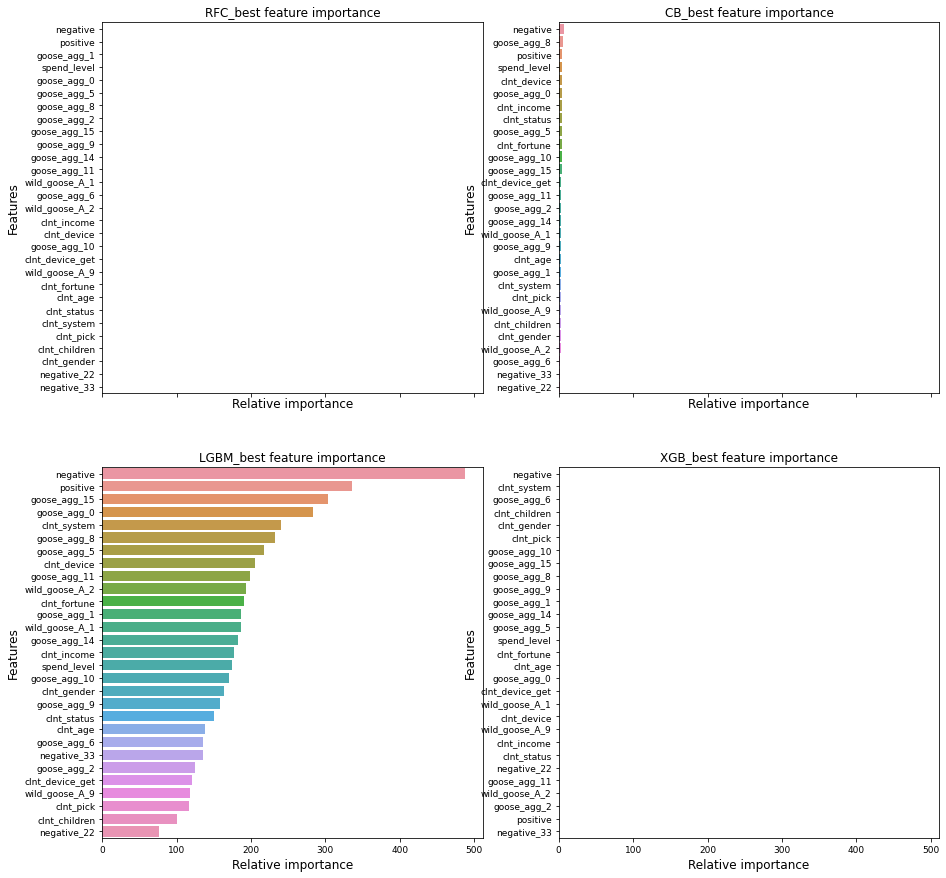

In [335]:
nrows = ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(15,15))

names_classifiers = [("RFC_best", RFC_best),("CB_best",CB_best),("LGBM_best",LGBM_best),("XGB_best",XGB_best)]

nclassifier = 0
for row in range(nrows):
    for col in range(ncols):
        name = names_classifiers[nclassifier][0]
        classifier = names_classifiers[nclassifier][1]
        indices = np.argsort(classifier.feature_importances_)[::-1][:40]
        g = sns.barplot(y=X_train.columns[indices][:40],x = classifier.feature_importances_[indices][:40] , orient='h',ax=axes[row][col])
        g.set_xlabel("Relative importance",fontsize=12)
        g.set_ylabel("Features",fontsize=12)
        g.tick_params(labelsize=9)
        g.set_title(name + " feature importance")
        nclassifier += 1

In [323]:
indices = np.argsort(LGBM_best.feature_importances_)[::-1][:29]
las_columns=X_train.columns[indices][:29]

In [324]:
las_columns

Index(['negative', 'positive', 'goose_agg_15', 'goose_agg_0', 'clnt_system',
       'goose_agg_8', 'goose_agg_1', 'goose_agg_5', 'clnt_device',
       'wild_goose_A_2', 'clnt_fortune', 'wild_goose_A_1', 'spend_level',
       'goose_agg_11', 'goose_agg_10', 'clnt_income', 'goose_agg_14',
       'clnt_gender', 'wild_goose_A_9', 'goose_agg_9', 'clnt_status',
       'negative_33', 'goose_agg_6', 'clnt_children', 'clnt_device_get',
       'goose_agg_2', 'clnt_pick', 'clnt_age', 'negative_22'],
      dtype='object')

In [ ]:
final_columns=[spend_points,]

In [172]:
votingC = VotingClassifier(estimators=[('rfc', RFC_best),('lgbm',LGBM_best),('cb',CB_best),("xgb",XGB_best)],
                           voting='soft', n_jobs=4)
votingC = votingC.fit(x_train, y_train)
predict=votingC.predict(x_valid)
print(accuracy_score(y_valid,predict))

0.6655844155844156


In [319]:
subm_rf['is_premium'].value_counts()

0    1159
1     202
Name: is_premium, dtype: int64

In [311]:
subm_lgbm['is_premium'].value_counts()

1    1361
Name: is_premium, dtype: int64

In [340]:
votingC = VotingClassifier(estimators=[('rfc', RFC_best),('cb',CB_best),('lgbm',LGBM_best),('xgb', XGB_best)],
                           voting='soft', n_jobs=4)
votingC = votingC.fit(x_train, y_train)

ss=ss.sort_values(by=['clnt_id'])
subm=pd.DataFrame({'clnt_id':ss['clnt_id'],'is_premium':(votingC.predict_proba(X_test)[:,1] >= 0.4).astype(bool)})
subm=subm.astype({'is_premium': 'int64'})

In [337]:
subm.is_premium.value_counts()

0    871
1    490
Name: is_premium, dtype: int64

In [177]:
import gc

In [224]:
gc.collect()

812493